# Universidade Federal do Maranhão (UFMA)
## Processamento Digital de Sinais
### Prof. Allan Kardec
### Aluno: Antonio Leitão Filho

**Livro-texto:** Sinais e Sistemas por Alan V. Oppenheim e Alan S. Willsky, Pearson Universidades; 2ª edição (3 junho 2010)

## Introdução

Este notebook contém a resolução dos exercícios do livro "Sinais e Sistemas" de Oppenheim e Willsky. Cada exercício é acompanhado por uma análise matemática detalhada e implementação em Python para visualização dos resultados. Os exercícios exploram conceitos fundamentais de sinais e sistemas, como transformações de sinais no domínio do tempo, propriedades de sistemas lineares invariantes no tempo (LIT), convolução, e análise no domínio da frequência.

A abordagem adotada combina a teoria matemática com implementação computacional, permitindo uma compreensão mais profunda dos conceitos apresentados no curso de Processamento Digital de Sinais.

## Exercício 1.21

Um sinal de tempo contínuo $x(t)$ é mostrado na Figura P1.21. Esboce e coloque a escala cuidadosamente para cada um dos seguintes sinais:

(a) $x(t-1)$  
(b) $x(2-t)$  
(c) $x(2t+1)$  
(d) $x(4-\frac{t}{2})$  
(e) $[x(t) + x(-t)]u(t)$  
(f) $x(t)[\delta(t+\frac{2}{2})-\delta(t-\frac{3}{2})]$

Primeiramente, vamos implementar o sinal original $x(t)$ em Python e visualizá-lo:

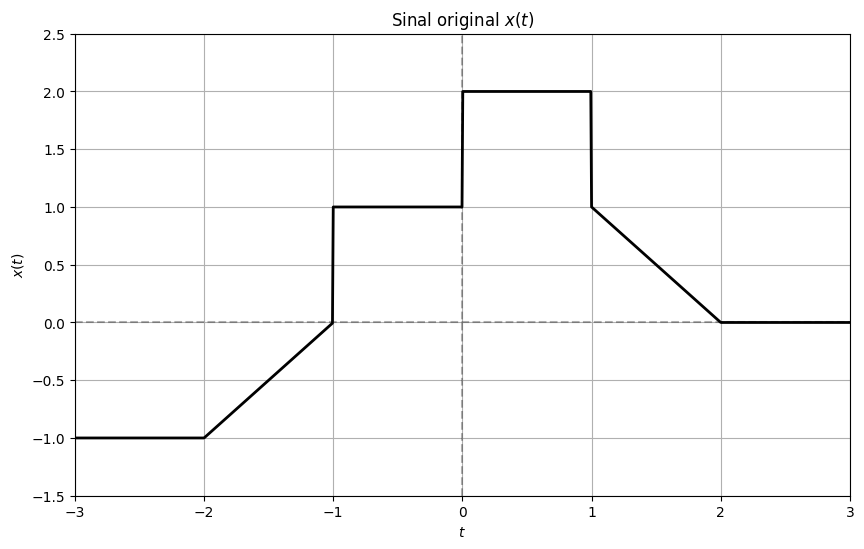

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sinal original x(t)
def x(t):
    result = np.zeros_like(t, dtype=float)
    
    # t < -2: valor = -1
    mask1 = t < -2
    result[mask1] = -1
    
    # -2 <= t < -1: rampa linear de -1 a 0
    mask2 = np.logical_and(t >= -2, t < -1)
    result[mask2] = t[mask2] + 1
    
    # -1 <= t < 0: valor = 1
    mask3 = np.logical_and(t >= -1, t < 0)
    result[mask3] = 1
    
    # 0 <= t < 1: valor = 2
    mask4 = np.logical_and(t >= 0, t < 1)
    result[mask4] = 2
    
    # 1 <= t < 2: rampa linear de 1 a 0
    mask5 = np.logical_and(t >= 1, t < 2)
    result[mask5] = -t[mask5] + 2
    
    # t >= 2: valor = 0 (já está como padrão)
    
    return result

# Função degrau unitário
def u(t):
    return np.heaviside(t, 0.5)

# Função delta de Dirac (aproximada)
def delta(t, t0, epsilon=0.02):
    return np.exp(-((t - t0) / epsilon) ** 2) / (epsilon * np.sqrt(np.pi))

# Gerar pontos para plotar
t = np.linspace(-3, 3, 1000)

# Plotar o sinal original x(t)
plt.figure(figsize=(10, 6))
plt.plot(t, x(t), 'k-', linewidth=2)
plt.grid(True)
plt.title('Sinal original $x(t)$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.ylim(-1.5, 2.5)
plt.xlim(-3, 3)
plt.show()

O sinal original $x(t)$ pode ser descrito matematicamente como:

$$
x(t) = 
\begin{cases}
-1, & t < -2 \\
t + 1, & -2 \leq t < -1 \\
1, & -1 \leq t < 0 \\
2, & 0 \leq t < 1 \\
-t + 2, & 1 \leq t < 2 \\
0, & t \geq 2
\end{cases}
$$

(a) $x(t-1)$

Esta transformação representa um deslocamento do sinal original para a direita em 1 unidade. Para encontrar $x(t-1)$, substituímos $t$ por $t-1$ na definição de $x(t)$:

$$
x(t-1) = 
\begin{cases}
-1, & t-1 < -2 \Rightarrow t < -1 \\
(t-1) + 1 = t, & -2 \leq t-1 < -1 \Rightarrow -1 \leq t < 0 \\
1, & -1 \leq t-1 < 0 \Rightarrow 0 \leq t < 1 \\
2, & 0 \leq t-1 < 1 \Rightarrow 1 \leq t < 2 \\
-(t-1) + 2 = -t + 3, & 1 \leq t-1 < 2 \Rightarrow 2 \leq t < 3 \\
0, & t-1 \geq 2 \Rightarrow t \geq 3
\end{cases}
$$

Vamos implementar e visualizar esta transformação:

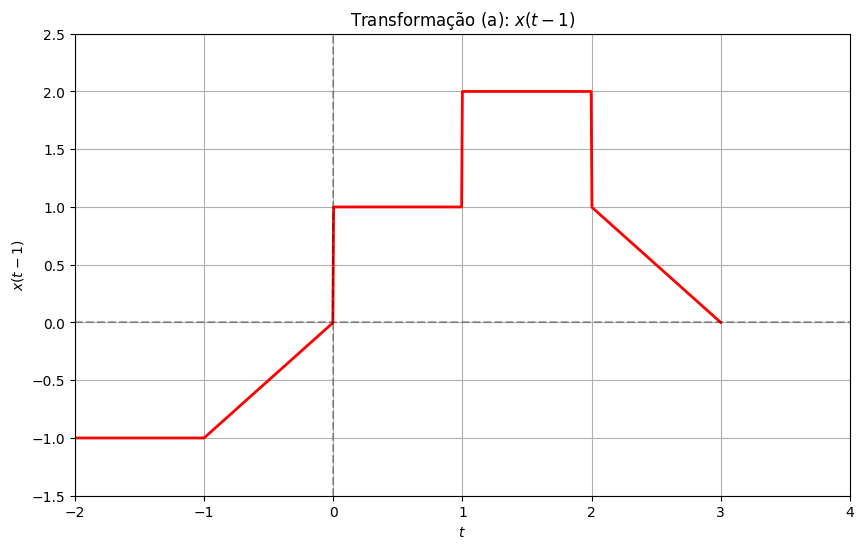

In [2]:
# (a) x(t-1)
def xa(t):
    return x(t - 1)

plt.figure(figsize=(10, 6))
plt.plot(t, xa(t), 'r-', linewidth=2)
plt.grid(True)
plt.title('Transformação (a): $x(t-1)$')
plt.xlabel('$t$')
plt.ylabel('$x(t-1)$')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.ylim(-1.5, 2.5)
plt.xlim(-2, 4)
plt.show()

Observa-se que o sinal $x(t-1)$ é idêntico ao sinal original $x(t)$, mas deslocado 1 unidade para a direita. Este é um exemplo clássico de deslocamento no tempo, onde todos os eventos ocorrem 1 unidade de tempo mais tarde.

(b) $x(2-t)$

Esta transformação representa uma inversão temporal (reflexão em torno do eixo y) seguida de um deslocamento. Para encontrar $x(2-t)$, substituímos $t$ por $2-t$ na definição de $x(t)$:

$$
x(2-t) = 
\begin{cases}
-1, & 2-t < -2 \Rightarrow t > 4 \\
(2-t) + 1 = 3-t, & -2 \leq 2-t < -1 \Rightarrow 3 < t \leq 4 \\
1, & -1 \leq 2-t < 0 \Rightarrow 2 < t \leq 3 \\
2, & 0 \leq 2-t < 1 \Rightarrow 1 < t \leq 2 \\
-(2-t) + 2 = t, & 1 \leq 2-t < 2 \Rightarrow 0 < t \leq 1 \\
0, & 2-t \geq 2 \Rightarrow t \leq 0
\end{cases}
$$

Vamos implementar e visualizar esta transformação:

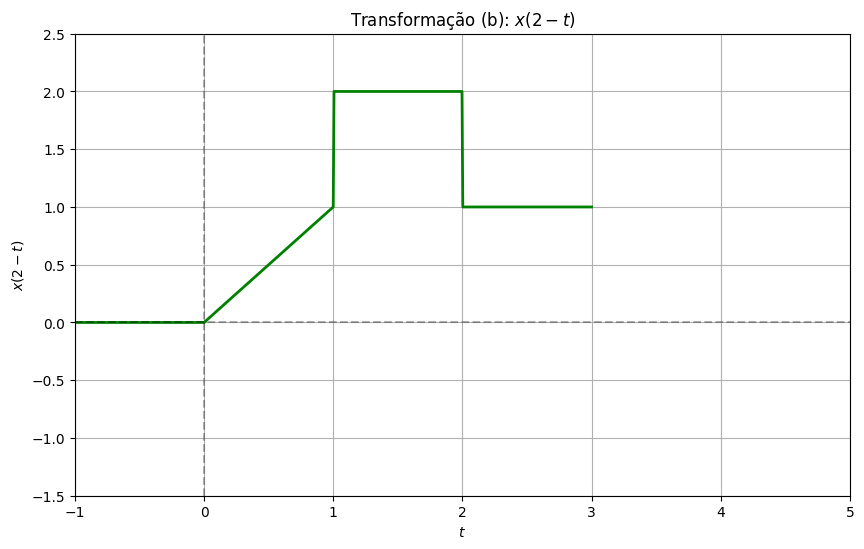

In [3]:
# (b) x(2-t)
def xb(t):
    return x(2 - t)

plt.figure(figsize=(10, 6))
plt.plot(t, xb(t), 'g-', linewidth=2)
plt.grid(True)
plt.title('Transformação (b): $x(2-t)$')
plt.xlabel('$t$')
plt.ylabel('$x(2-t)$')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.ylim(-1.5, 2.5)
plt.xlim(-1, 5)
plt.show()

O sinal $x(2-t)$ é uma versão espelhada de $x(t)$ em torno da linha vertical $t=1$. Esta transformação inverte a ordem dos eventos no tempo, fazendo com que o sinal "corra ao contrário" a partir do ponto de referência $t=1$.

(c) $x(2t+1)$

Esta transformação representa uma compressão no tempo (fator 1/2) seguida de um deslocamento para a esquerda em 1/2 unidade. Para encontrar $x(2t+1)$, substituímos $t$ por $2t+1$ na definição de $x(t)$:

$$
x(2t+1) = 
\begin{cases}
-1, & 2t+1 < -2 \Rightarrow t < -3/2 \\
(2t+1) + 1 = 2t+2, & -2 \leq 2t+1 < -1 \Rightarrow -3/2 \leq t < -1 \\
1, & -1 \leq 2t+1 < 0 \Rightarrow -1 \leq t < -1/2 \\
2, & 0 \leq 2t+1 < 1 \Rightarrow -1/2 \leq t < 0 \\
-(2t+1) + 2 = -2t+1, & 1 \leq 2t+1 < 2 \Rightarrow 0 \leq t < 1/2 \\
0, & 2t+1 \geq 2 \Rightarrow t \geq 1/2
\end{cases}
$$

Vamos implementar e visualizar esta transformação:

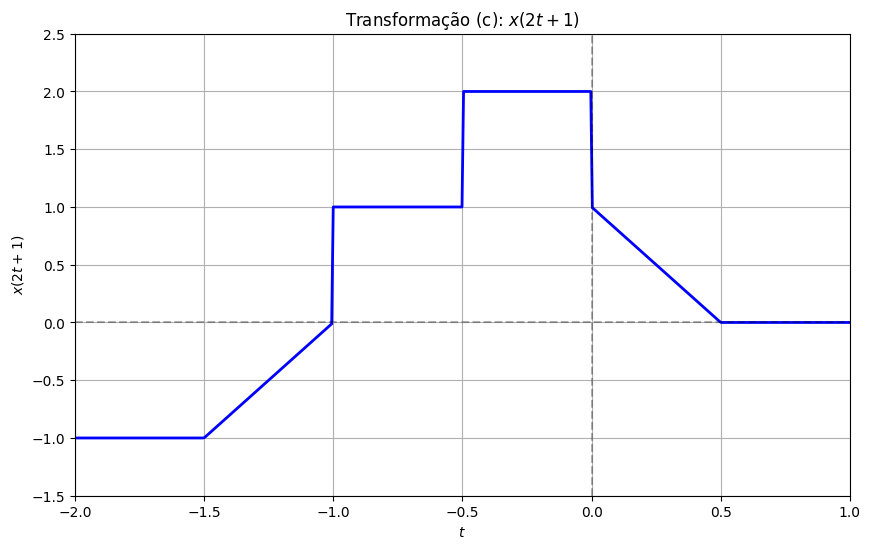

In [4]:
# (c) x(2t+1)
def xc(t):
    return x(2 * t + 1)

plt.figure(figsize=(10, 6))
plt.plot(t, xc(t), 'b-', linewidth=2)
plt.grid(True)
plt.title('Transformação (c): $x(2t+1)$')
plt.xlabel('$t$')
plt.ylabel('$x(2t+1)$')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.ylim(-1.5, 2.5)
plt.xlim(-2, 1)
plt.show()

O sinal $x(2t+1)$ é uma versão comprimida no tempo do sinal original $x(t)$, com os eventos ocorrendo duas vezes mais rápido, e deslocado 1/2 unidade para a esquerda. A compressão no tempo por um fator de 2 significa que a duração dos eventos é reduzida pela metade.

(d) $x(4-\frac{t}{2})$

Esta transformação combina uma expansão no tempo (fator 2), uma inversão (reflexão em torno do eixo y) e um deslocamento. Para encontrar $x(4-\frac{t}{2})$, substituímos $t$ por $4-\frac{t}{2}$ na definição de $x(t)$:

$$
x(4-\frac{t}{2}) = 
\begin{cases}
-1, & 4-\frac{t}{2} < -2 \Rightarrow t > 12 \\
(4-\frac{t}{2}) + 1 = 5-\frac{t}{2}, & -2 \leq 4-\frac{t}{2} < -1 \Rightarrow 10 < t \leq 12 \\
1, & -1 \leq 4-\frac{t}{2} < 0 \Rightarrow 8 < t \leq 10 \\
2, & 0 \leq 4-\frac{t}{2} < 1 \Rightarrow 6 < t \leq 8 \\
-(4-\frac{t}{2}) + 2 = \frac{t}{2}-2, & 1 \leq 4-\frac{t}{2} < 2 \Rightarrow 4 < t \leq 6 \\
0, & 4-\frac{t}{2} \geq 2 \Rightarrow t \leq 4
\end{cases}
$$

Vamos implementar e visualizar esta transformação:

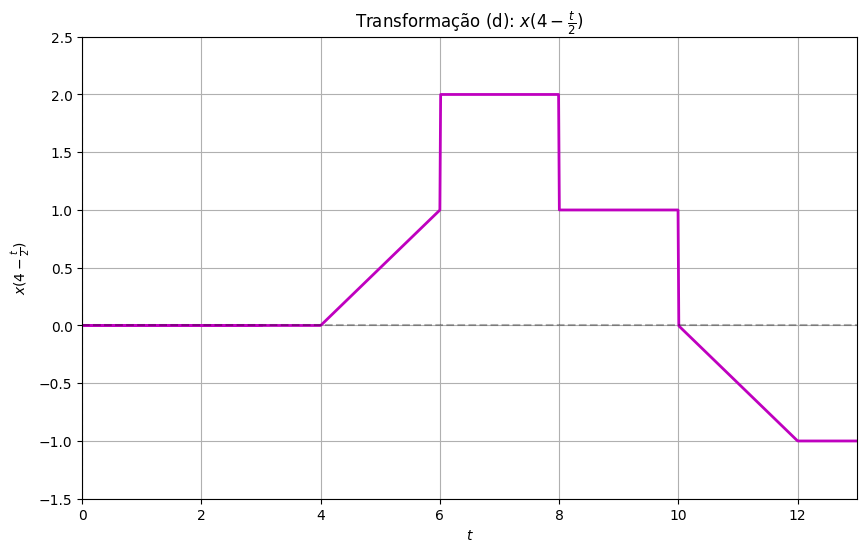

In [5]:
# (d) x(4-t/2)
def xd(t):
    return x(4 - t/2)

plt.figure(figsize=(10, 6))
plt.plot(t, xd(t), 'm-', linewidth=2)
plt.grid(True)
t_expanded = np.linspace(0, 13, 1000)  # Expandir o intervalo para ver todo o sinal
plt.plot(t_expanded, xd(t_expanded), 'm-', linewidth=2)
plt.grid(True)
plt.title('Transformação (d): $x(4-\\frac{t}{2})$')
plt.xlabel('$t$')
plt.ylabel('$x(4-\\frac{t}{2})$')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.ylim(-1.5, 2.5)
plt.xlim(0, 13)
plt.show()

O sinal $x(4-\frac{t}{2})$ é uma versão expandida no tempo, invertida e deslocada do sinal original. A expansão no tempo por um fator de 2 significa que os eventos ocorrem duas vezes mais lentamente, enquanto a inversão faz com que eles ocorram em ordem inversa. O deslocamento de 4 unidades move o sinal ao longo do eixo do tempo.

(e) $[x(t) + x(-t)]u(t)$

Esta transformação combina a soma do sinal original com sua versão refletida em torno do eixo y, e multiplica o resultado pela função degrau unitário $u(t)$.

Primeiro, calculamos $x(-t)$:

$$
x(-t) = 
\begin{cases}
-1, & -t < -2 \Rightarrow t > 2 \\
(-t) + 1 = -t+1, & -2 \leq -t < -1 \Rightarrow 1 < t \leq 2 \\
1, & -1 \leq -t < 0 \Rightarrow 0 < t \leq 1 \\
2, & 0 \leq -t < 1 \Rightarrow -1 < t \leq 0 \\
-(-t) + 2 = t+2, & 1 \leq -t < 2 \Rightarrow -2 < t \leq -1 \\
0, & -t \geq 2 \Rightarrow t \leq -2
\end{cases}
$$

Agora, calculando $x(t) + x(-t)$ e multiplicando por $u(t)$ (que é 1 para $t \geq 0$ e 0 para $t < 0$):

Para $t < 0$: $[x(t) + x(-t)]u(t) = 0$

Para $t \geq 0$, precisamos analisar por regiões:

- Para $0 \leq t < 1$: $x(t) = 2$ e $x(-t) = 1$, portanto $[x(t) + x(-t)]u(t) = (2 + 1) \cdot 1 = 3$
- Para $1 \leq t < 2$: $x(t) = -t+2$ e $x(-t) = -t+1$, portanto $[x(t) + x(-t)]u(t) = (-t+2 + (-t+1)) \cdot 1 = -2t+3$
- Para $t \geq 2$: $x(t) = 0$ e $x(-t) = -1$, portanto $[x(t) + x(-t)]u(t) = (0 + (-1)) \cdot 1 = -1$

Assim:

$$
[x(t) + x(-t)]u(t) = 
\begin{cases}
0, & t < 0 \\
3, & 0 \leq t < 1 \\
-2t+3, & 1 \leq t < 2 \\
-1, & t \geq 2
\end{cases}
$$

Vamos implementar e visualizar esta transformação:

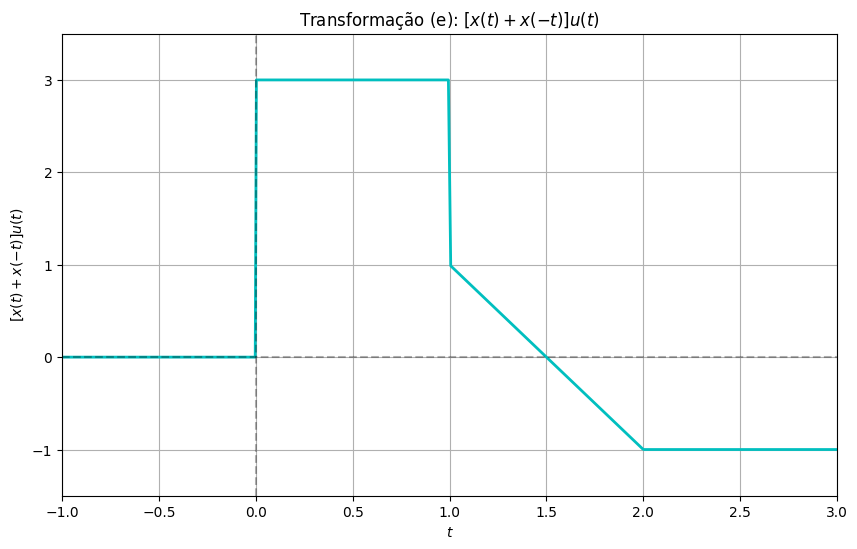

In [6]:
# (e) [x(t) + x(-t)]u(t)
def xe(t):
    return (x(t) + x(-t)) * u(t)

plt.figure(figsize=(10, 6))
plt.plot(t, xe(t), 'c-', linewidth=2)
plt.grid(True)
plt.title('Transformação (e): $[x(t) + x(-t)]u(t)$')
plt.xlabel('$t$')
plt.ylabel('$[x(t) + x(-t)]u(t)$')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.ylim(-1.5, 3.5)
plt.xlim(-1, 3)
plt.show()

Esta transformação cria um sinal que combina características de $x(t)$ e $x(-t)$, mas apenas para valores positivos de $t$ devido à multiplicação pelo degrau unitário $u(t)$. O resultado é um sinal causal que preserva certas simetrias do sinal original.

(f) $x(t)[\delta(t+\frac{2}{2})-\delta(t-\frac{3}{2})]$

Esta transformação multiplica o sinal original por uma diferença de funções delta de Dirac deslocadas. Simplificando, temos $x(t)[\delta(t+1)-\delta(t-\frac{3}{2})]$.

A função delta de Dirac $\delta(t-t_0)$ tem a propriedade que, quando multiplicada por uma função $f(t)$ e integrada, resulta em $f(t_0)$. Assim, quando multiplicamos $x(t)$ por $\delta(t+1)$, obtemos impulsos no ponto $t = -1$ com amplitude $x(-1) = 1$. Da mesma forma, quando multiplicamos $x(t)$ por $\delta(t-\frac{3}{2})$, obtemos impulsos no ponto $t = \frac{3}{2}$ com amplitude $x(\frac{3}{2}) = -\frac{3}{2}+2 = \frac{1}{2}$.

Assim, o sinal $x(t)[\delta(t+1)-\delta(t-\frac{3}{2})]$ terá dois impulsos:
- Um impulso positivo em $t = -1$ com amplitude $1$
- Um impulso negativo em $t = \frac{3}{2}$ com amplitude $-\frac{1}{2}$

Matematicamente:
$$
x(t)[\delta(t+1)-\delta(t-\frac{3}{2})] = x(-1)\delta(t+1) - x(\frac{3}{2})\delta(t-\frac{3}{2}) = 1 \cdot \delta(t+1) - \frac{1}{2} \cdot \delta(t-\frac{3}{2})
$$

Vamos implementar e visualizar esta transformação:

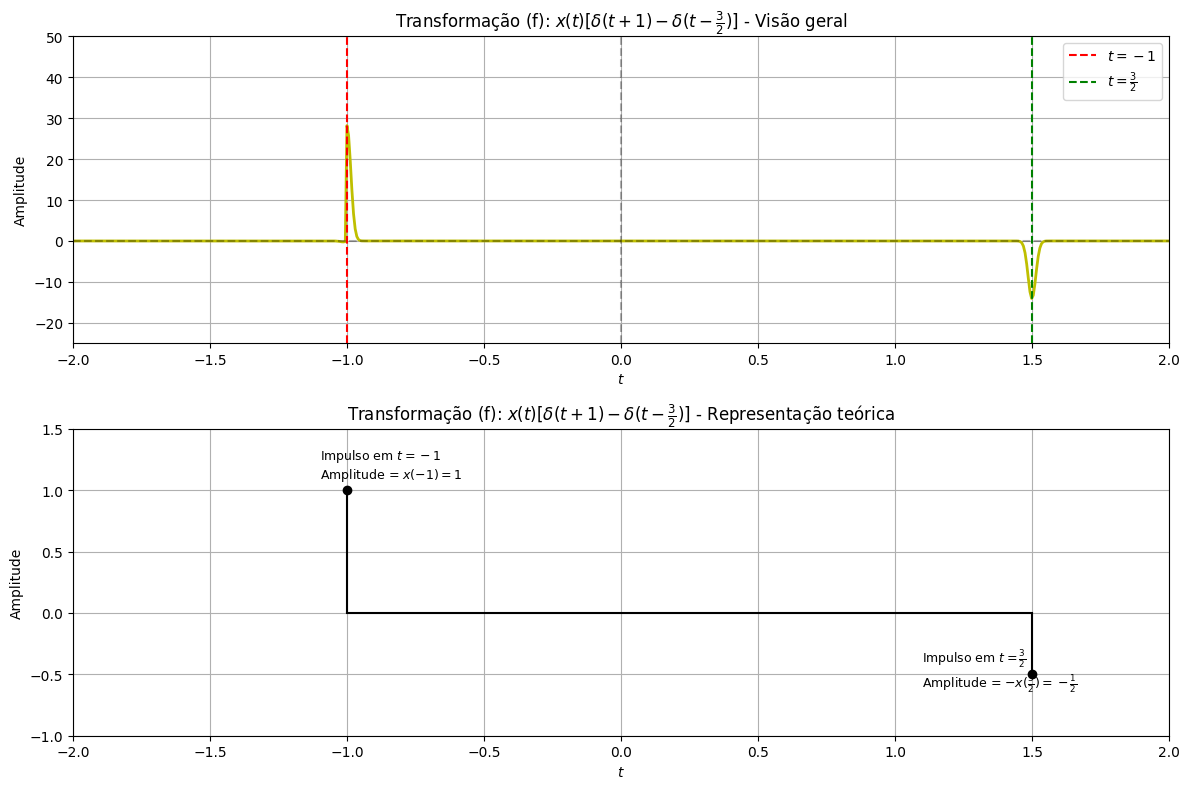

In [7]:
# (f) x(t)[δ(t+1)-δ(t-3/2)]
def xf(t):
    # Para visualização, usamos aproximações de delta
    return x(t) * (delta(t, -1, 0.02) - delta(t, 1.5, 0.02))

plt.figure(figsize=(12, 8))

# Visão geral
plt.subplot(2, 1, 1)
plt.plot(t, xf(t), 'y-', linewidth=2)
plt.grid(True)
plt.title('Transformação (f): $x(t)[\\delta(t+1)-\\delta(t-\\frac{3}{2})]$ - Visão geral')
plt.xlabel('$t$')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=-1, color='r', linestyle='--', label='$t=-1$')
plt.axvline(x=1.5, color='g', linestyle='--', label='$t=\\frac{3}{2}$')
plt.ylim(-25, 50)
plt.xlim(-2, 2)
plt.legend()

# Representação teórica com impulsos
plt.subplot(2, 1, 2)
plt.stem([-1, 1.5], [1, -0.5], linefmt='k-', markerfmt='ko', basefmt='k-')
plt.grid(True)
plt.title('Transformação (f): $x(t)[\\delta(t+1)-\\delta(t-\\frac{3}{2})]$ - Representação teórica')
plt.xlabel('$t$')
plt.ylabel('Amplitude')
plt.xlim(-2, 2)
plt.ylim(-1, 1.5)
plt.text(-1.1, 1.1, 'Impulso em $t=-1$\nAmplitude = $x(-1) = 1$', fontsize=9)
plt.text(1.1, -0.6, 'Impulso em $t=\\frac{3}{2}$\nAmplitude = $-x(\\frac{3}{2}) = -\\frac{1}{2}$', fontsize=9)

plt.tight_layout()
plt.show()

Esta transformação resulta em um sinal que consiste apenas em dois impulsos pontuais, um positivo em $t = -1$ e um negativo em $t = \frac{3}{2}$. Os impulsos representam amostras instantâneas do sinal original $x(t)$ nos pontos $t = -1$ e $t = \frac{3}{2}$, multiplicadas por 1 e -1, respectivamente.

## Exercício 1.22

Um sinal de tempo discreto é mostrado na Figura P1.22. Esboce e coloque a escala cuidadosamente para cada um dos seguintes sinais:

(a) $x[n - 4]$  
(b) $x[3 - n]$  
(c) $x[3n]$  
(d) $x[3n + 1]$  
(e) $x[n]u[3 - n]$  
(f) $x[n - 2]\delta[n - 2]$  
(g) $\frac{1}{2}x[n]+\frac{1}{2}(-1)^n x[n]$  
(h) $x[(n - 1)^2]$

Primeiramente, vamos implementar o sinal original $x[n]$ em Python e visualizá-lo:

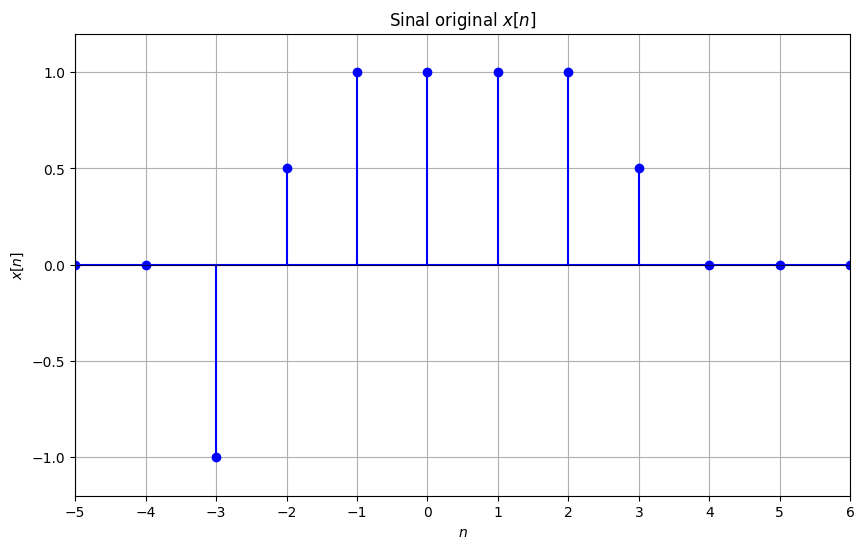

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sinal original x[n]
def x(n):
    # Valores do sinal conforme a figura P1.22
    signal_dict = {
        -4: 0,
        -3: -1,
        -2: 0.5,
        -1: 1,
        0: 1,
        1: 1,
        2: 1,
        3: 0.5,
        4: 0,
        5: 0
    }
    
    # Para valores fora do intervalo, retornamos 0
    if isinstance(n, (int, np.integer)):
        return signal_dict.get(n, 0)
    else:  # Se n for um array
        result = np.zeros_like(n, dtype=float)
        for i, val in enumerate(n):
            result[i] = signal_dict.get(val, 0)
        return result

# Função degrau unitário
def u(n):
    result = np.zeros_like(n, dtype=float)
    result[n >= 0] = 1
    return result

# Função delta discreto
def delta(n):
    result = np.zeros_like(n, dtype=float)
    result[n == 0] = 1
    return result

# Gerar pontos para plotar
n_values = np.arange(-5, 7)

# Valores do sinal
x_values = x(n_values)

# Plotar o sinal original x[n]
plt.figure(figsize=(10, 6))
plt.stem(n_values, x_values, 'b', markerfmt='bo', basefmt='b-')
plt.grid(True)
plt.title('Sinal original $x[n]$')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.xticks(n_values)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.xlim(-5, 6)
plt.show()

O sinal original $x[n]$ pode ser descrito matematicamente como:

$$
x[n] = 
\begin{cases}
-1, & n = -3 \\
-\frac{1}{2}, & n = -3 \\
\frac{1}{2}, & n = -2 \text{ ou } n = 3 \\
1, & n = -1, 0, 1, 2 \\
0, & \text{caso contrário}
\end{cases}
$$

(a) $x[n - 4]$

Esta transformação representa um deslocamento do sinal original para a direita em 4 unidades. Para encontrar $x[n - 4]$, substituímos $n$ por $n - 4$ na definição de $x[n]$.

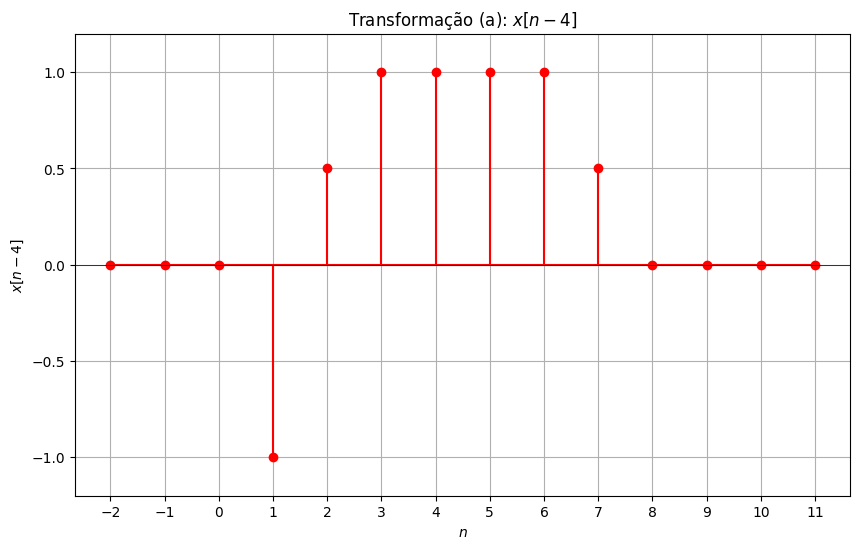

In [9]:
# (a) x[n-4]
def xa(n):
    return x(n - 4)

plt.figure(figsize=(10, 6))
n_values_a = np.arange(-2, 12)
plt.stem(n_values_a, xa(n_values_a), 'r', markerfmt='ro', basefmt='r-')
plt.grid(True)
plt.title('Transformação (a): $x[n-4]$')
plt.xlabel('$n$')
plt.ylabel('$x[n-4]$')
plt.xticks(n_values_a)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.show()

O sinal $x[n-4]$ é simplesmente o sinal original $x[n]$ deslocado 4 unidades para a direita. Os pontos são mapeados da seguinte forma:
- O valor em $n=0$ no sinal original aparece em $n=4$ no sinal transformado
- O valor em $n=-3$ no sinal original aparece em $n=1$ no sinal transformado
- E assim por diante para todos os pontos

(b) $x[3 - n]$

Esta transformação representa uma inversão (reflexão) do sinal original em torno do ponto $n=1.5$. Para encontrar $x[3 - n]$, substituímos $n$ por $3 - n$ na definição de $x[n]$.

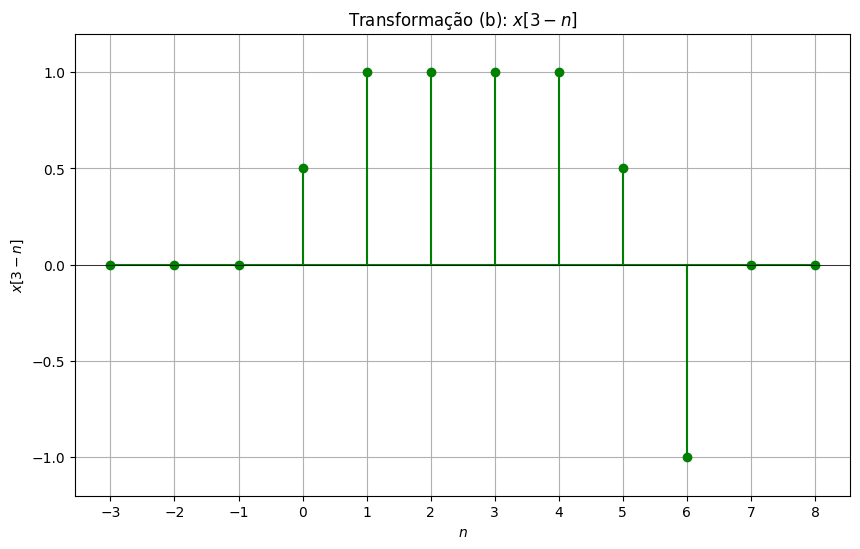

In [10]:
# (b) x[3-n]
def xb(n):
    return x(3 - n)

plt.figure(figsize=(10, 6))
n_values_b = np.arange(-3, 9)
plt.stem(n_values_b, xb(n_values_b), 'g', markerfmt='go', basefmt='g-')
plt.grid(True)
plt.title('Transformação (b): $x[3-n]$')
plt.xlabel('$n$')
plt.ylabel('$x[3-n]$')
plt.xticks(n_values_b)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.show()

O sinal $x[3-n]$ inverte a sequência dos valores de $x[n]$ em torno do ponto $n=1.5$. Os pontos são mapeados da seguinte forma:
- O valor em $n=0$ no sinal original aparece em $n=3$ no sinal transformado
- O valor em $n=1$ no sinal original aparece em $n=2$ no sinal transformado
- O valor em $n=2$ no sinal original aparece em $n=1$ no sinal transformado
- E assim por diante

(c) $x[3n]$

Esta transformação representa uma compressão do sinal original por um fator de 3. Para encontrar $x[3n]$, substituímos $n$ por $3n$ na definição de $x[n]$.

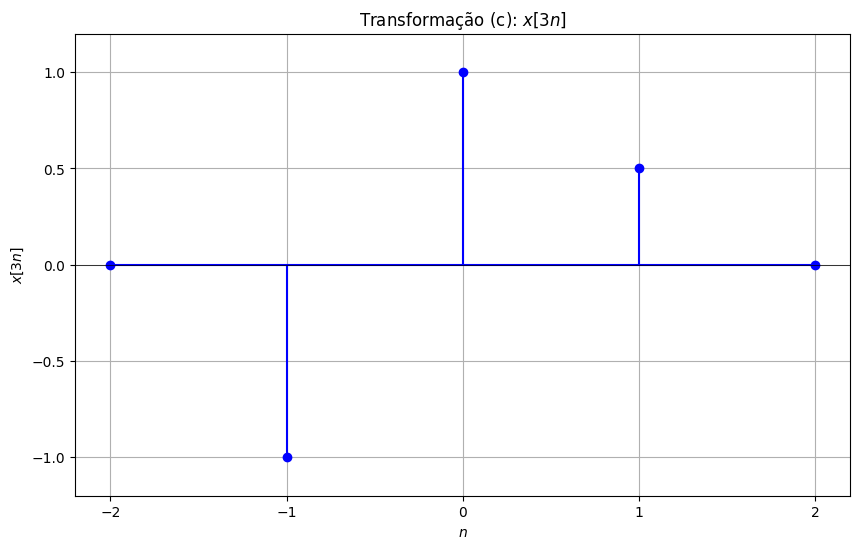

In [11]:
# (c) x[3n]
def xc(n):
    return x(3*n)

plt.figure(figsize=(10, 6))
n_values_c = np.arange(-2, 3)
plt.stem(n_values_c, xc(n_values_c), 'b', markerfmt='bo', basefmt='b-')
plt.grid(True)
plt.title('Transformação (c): $x[3n]$')
plt.xlabel('$n$')
plt.ylabel('$x[3n]$')
plt.xticks(n_values_c)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.show()

O sinal $x[3n]$ comprime o sinal original por um fator de 3, significando que apenas os valores de $n$ que são múltiplos de 3 no sinal original são preservados. Outros valores são efetivamente descartados.
- O valor em $n=0$ no sinal original aparece em $n=0$ no sinal transformado (pois $3 \times 0 = 0$)
- O valor em $n=-3$ no sinal original aparece em $n=-1$ no sinal transformado (pois $3 \times (-1) = -3$)
- O valor em $n=3$ no sinal original aparece em $n=1$ no sinal transformado (pois $3 \times 1 = 3$)
- Para outros valores de $n$, como $n=-2, -1, 2$, os valores correspondentes de $3n$ não estão definidos no sinal original, então são zero

(d) $x[3n + 1]$

Esta transformação representa uma compressão do sinal original por um fator de 3, seguida por um deslocamento de 1 unidade. Para encontrar $x[3n + 1]$, substituímos $n$ por $3n + 1$ na definição de $x[n]$.

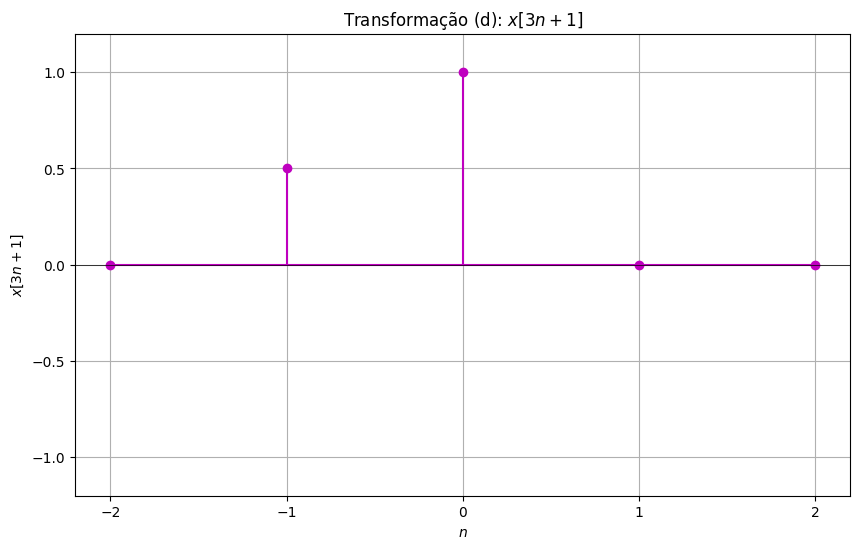

In [12]:
# (d) x[3n+1]
def xd(n):
    return x(3*n + 1)

plt.figure(figsize=(10, 6))
n_values_d = np.arange(-2, 3)
plt.stem(n_values_d, xd(n_values_d), 'm', markerfmt='mo', basefmt='m-')
plt.grid(True)
plt.title('Transformação (d): $x[3n+1]$')
plt.xlabel('$n$')
plt.ylabel('$x[3n+1]$')
plt.xticks(n_values_d)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.show()

O sinal $x[3n+1]$ comprime o sinal original por um fator de 3 e desloca-o 1 unidade para a esquerda. Isso significa que apenas valores de $n$ onde $3n+1$ corresponde a um $n$ definido no sinal original serão preservados.
- Para $n=0$, temos $3n+1 = 1$, então $x[3n+1]$ em $n=0$ é igual a $x[1] = 1$
- Para $n=-1$, temos $3n+1 = -2$, então $x[3n+1]$ em $n=-1$ é igual a $x[-2] = 0.5$
- Para $n=1$, temos $3n+1 = 4$, então $x[3n+1]$ em $n=1$ é igual a $x[4] = 0$

(e) $x[n]u[3 - n]$

Esta transformação multiplica o sinal original pelo degrau unitário $u[3 - n]$, que é 1 para $n \leq 3$ e 0 para $n > 3$.

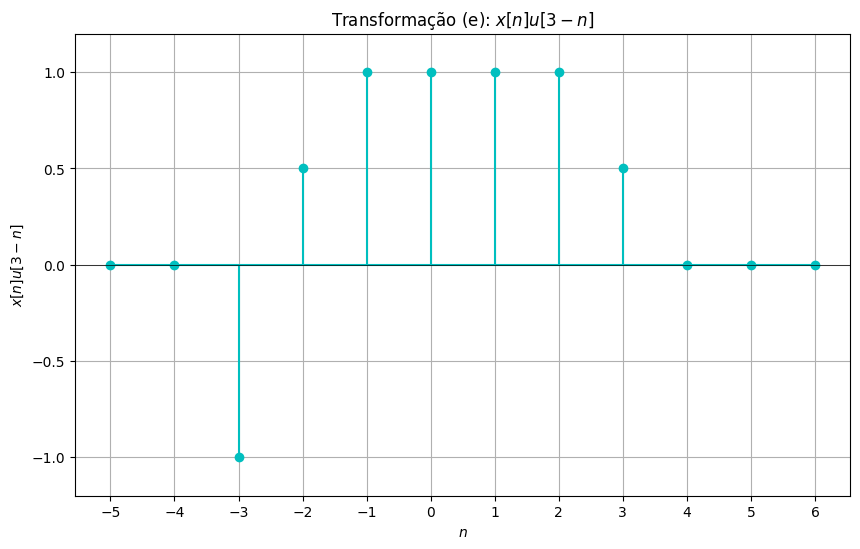

In [13]:
# (e) x[n]u[3-n]
def xe(n):
    return x(n) * u(3 - n)

plt.figure(figsize=(10, 6))
plt.stem(n_values, xe(n_values), 'c', markerfmt='co', basefmt='c-')
plt.grid(True)
plt.title('Transformação (e): $x[n]u[3-n]$')
plt.xlabel('$n$')
plt.ylabel('$x[n]u[3-n]$')
plt.xticks(n_values)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.show()

O sinal $x[n]u[3-n]$ é igual a $x[n]$ para $n \leq 3$ e 0 para $n > 3$. Isso significa que o sinal original é "cortado" a partir de $n = 4$.

(f) $x[n - 2]\delta[n - 2]$

Esta transformação amostra o sinal $x[n-2]$ no ponto $n=2$, resultando em um único impulso.

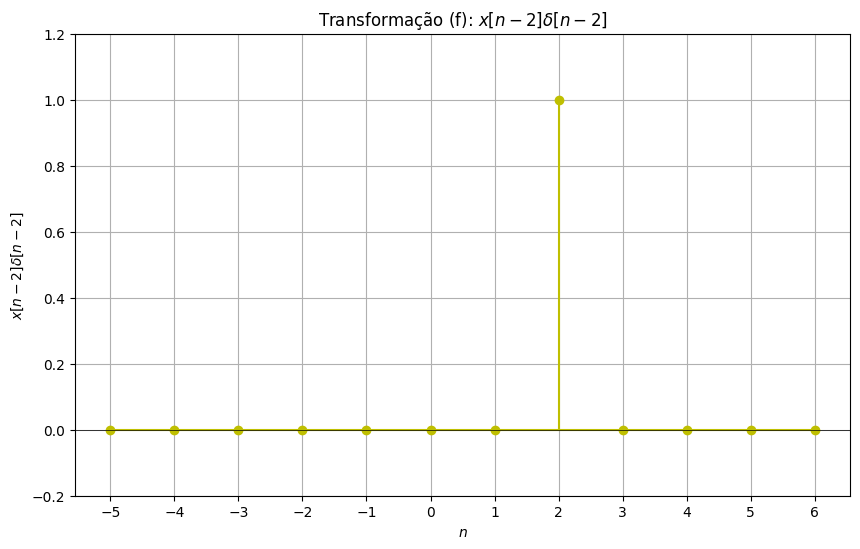

In [14]:
# (f) x[n-2]δ[n-2]
def xf(n):
    return x(n - 2) * delta(n - 2)

plt.figure(figsize=(10, 6))
plt.stem(n_values, xf(n_values), 'y', markerfmt='yo', basefmt='y-')
plt.grid(True)
plt.title('Transformação (f): $x[n-2]\\delta[n-2]$')
plt.xlabel('$n$')
plt.ylabel('$x[n-2]\\delta[n-2]$')
plt.xticks(n_values)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-0.2, 1.2)
plt.show()

O sinal $x[n-2]\delta[n-2]$ é 0 para todos os valores de $n$ exceto $n=2$, onde é igual a $x[0] = 1$. Isso ocorre porque $\delta[n-2]$ é 1 apenas para $n=2$ e 0 para todos os outros valores, e quando multiplicamos $x[n-2]$ por $\delta[n-2]$, o único valor preservado é em $n=2$.

(g) $\frac{1}{2}x[n]+\frac{1}{2}(-1)^n x[n]$

Esta transformação combina o sinal original com uma versão modulada pelo fator $(-1)^n$.

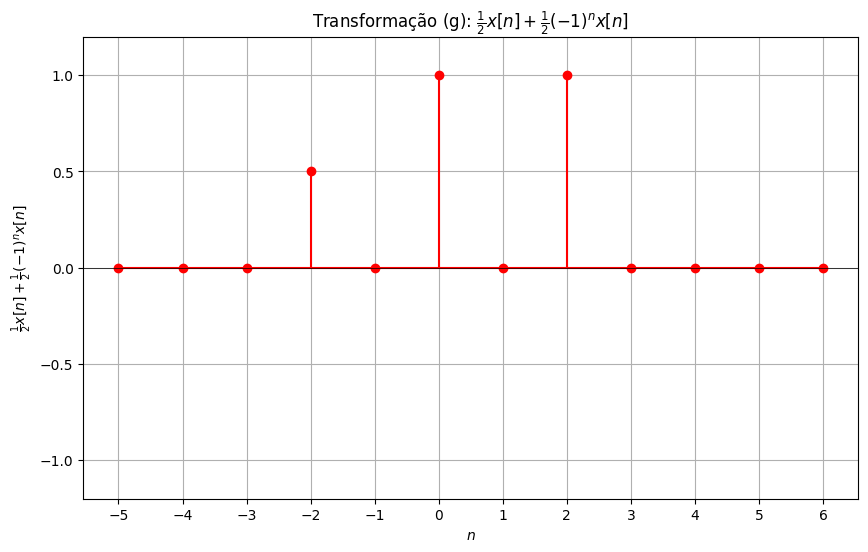

In [17]:
# (g) (1/2)x[n]+(1/2)(-1)^n x[n]
def xg(n):
    # Usando arrays para evitar o erro com potências negativas
    # Para n par, (-1)^n = 1; para n ímpar, (-1)^n = -1
    modulation = np.ones_like(n, dtype=float)
    modulation[n % 2 != 0] = -1  # Para n ímpar
    
    return 0.5 * x(n) + 0.5 * modulation * x(n)

plt.figure(figsize=(10, 6))
plt.stem(n_values, xg(n_values), 'r', markerfmt='ro', basefmt='r-')
plt.grid(True)
plt.title('Transformação (g): $\\frac{1}{2}x[n]+\\frac{1}{2}(-1)^n x[n]$')
plt.xlabel('$n$')
plt.ylabel('$\\frac{1}{2}x[n]+\\frac{1}{2}(-1)^n x[n]$')
plt.xticks(n_values)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.show()

Para $\frac{1}{2}x[n]+\frac{1}{2}(-1)^n x[n]$, podemos simplificar a expressão:

$$\frac{1}{2}x[n]+\frac{1}{2}(-1)^n x[n] = \frac{1 + (-1)^n}{2}x[n]$$

O fator $\frac{1 + (-1)^n}{2}$ é igual a 1 quando $n$ é par e 0 quando $n$ é ímpar.
Assim, esta transformação:
- Mantém os valores do sinal original nos pontos onde $n$ é par
- Zera os valores nos pontos onde $n$ é ímpar

(h) $x[(n - 1)^2]$

Esta transformação substitui o índice $n$ por $(n-1)^2$ no sinal original.

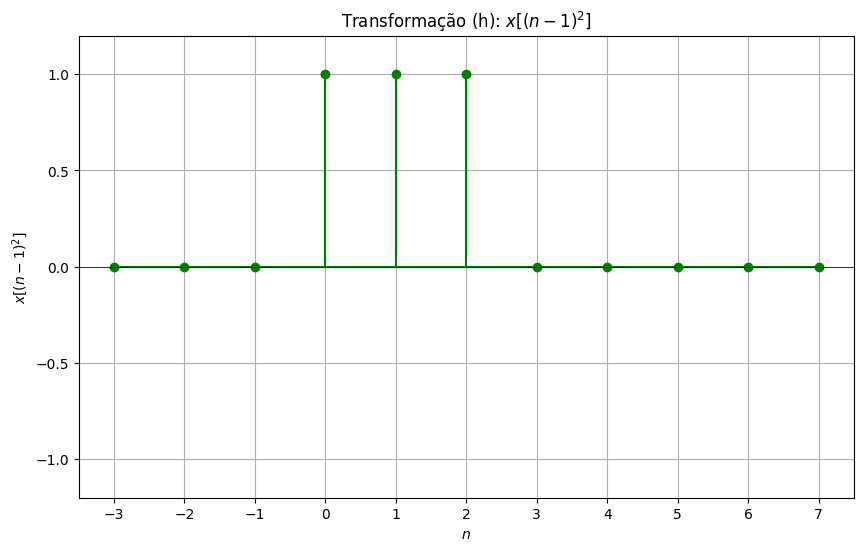

In [18]:
# (h) x[(n-1)^2]
def xh(n):
    # Calcular (n-1)^2 para cada valor de n
    indices = (n - 1)**2
    
    # Converter para inteiros e obter os valores do sinal
    result = np.zeros_like(n, dtype=float)
    for i, idx in enumerate(indices):
        int_idx = int(round(idx))
        result[i] = x(int_idx)
    
    return result

plt.figure(figsize=(10, 6))
n_values_h = np.arange(-3, 8)
plt.stem(n_values_h, xh(n_values_h), 'g', markerfmt='go', basefmt='g-')
plt.grid(True)
plt.title('Transformação (h): $x[(n-1)^2]$')
plt.xlabel('$n$')
plt.ylabel('$x[(n-1)^2]$')
plt.xticks(n_values_h)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.ylim(-1.2, 1.2)
plt.show()

Para esta transformação, precisamos calcular $(n-1)^2$ para cada valor de $n$ e obter o valor correspondente de $x[(n-1)^2]$:
- Para $n=0$, temos $(n-1)^2 = (-1)^2 = 1$, então $x[(n-1)^2] = x[1] = 1$
- Para $n=1$, temos $(n-1)^2 = 0^2 = 0$, então $x[(n-1)^2] = x[0] = 1$
- Para $n=2$, temos $(n-1)^2 = 1^2 = 1$, então $x[(n-1)^2] = x[1] = 1$
- Para $n=3$, temos $(n-1)^2 = 2^2 = 4$, então $x[(n-1)^2] = x[4] = 0$
- Para $n=4$, temos $(n-1)^2 = 3^2 = 9$, então $x[(n-1)^2] = x[9] = 0$ (fora do intervalo definido)

Esta transformação distorce significativamente o sinal original devido à natureza não linear da operação $(n-1)^2$.

## Exercício 1.23

Determine e esboce as partes par e ímpar dos sinais representados na Figura P1.23. Coloque cuidadosamente escala em seus esboços.

## Teoria da Decomposição em Componentes Par e Ímpar

Qualquer sinal $x(t)$ pode ser decomposto em uma soma de uma componente par $x_p(t)$ e uma componente ímpar $x_i(t)$:

$$x(t) = x_p(t) + x_i(t)$$

Onde:
- Componente par: $x_p(t) = \frac{x(t) + x(-t)}{2}$
- Componente ímpar: $x_i(t) = \frac{x(t) - x(-t)}{2}$

A componente par satisfaz a propriedade $x_p(-t) = x_p(t)$ (simetria em relação ao eixo vertical).
A componente ímpar satisfaz a propriedade $x_i(-t) = -x_i(t)$ (anti-simetria em relação à origem).

#### Implementação em Python

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Funções para calcular componentes par e ímpar
def componente_par(x_func, t):
    return 0.5 * (x_func(t) + x_func(-t))

def componente_impar(x_func, t):
    return 0.5 * (x_func(t) - x_func(-t))

# Função para visualizar a decomposição
def visualizar_decomposicao(x_func, t_min, t_max, titulo, num=1000):
    t = np.linspace(t_min, t_max, num)
    x_original = x_func(t)
    x_par = componente_par(x_func, t)
    x_impar = componente_impar(x_func, t)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    # Sinal original
    axs[0].plot(t, x_original, 'b-', linewidth=2)
    axs[0].grid(True)
    axs[0].set_title(f'Sinal Original: {titulo}')
    axs[0].set_ylabel('x(t)')
    axs[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    axs[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    # Componente par
    axs[1].plot(t, x_par, 'g-', linewidth=2)
    axs[1].grid(True)
    axs[1].set_title('Componente Par: $x_p(t)$')
    axs[1].set_ylabel('$x_p(t)$')
    axs[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    axs[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    # Componente ímpar
    axs[2].plot(t, x_impar, 'r-', linewidth=2)
    axs[2].grid(True)
    axs[2].set_title('Componente Ímpar: $x_i(t)$')
    axs[2].set_xlabel('t')
    axs[2].set_ylabel('$x_i(t)$')
    axs[2].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    axs[2].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Verificar que x(t) = x_p(t) + x_i(t)
    erro_max = np.max(np.abs(x_original - (x_par + x_impar)))
    print(f"Verificação: Erro máximo |x(t) - (x_p(t) + x_i(t))| = {erro_max:.10f}")
    
    return x_par, x_impar

## Sinal (a): Pulso Triangular

### Definição do Sinal

O sinal (a) da Figura P1.23 é um pulso triangular definido por:

$$x_a(t) = 
\begin{cases}
t, & 0 \leq t \leq 1 \\
2-t, & 1 < t \leq 2 \\
0, & \text{caso contrário}
\end{cases}$$

### Implementação

Decomposição do sinal (a) - Pulso Triangular:


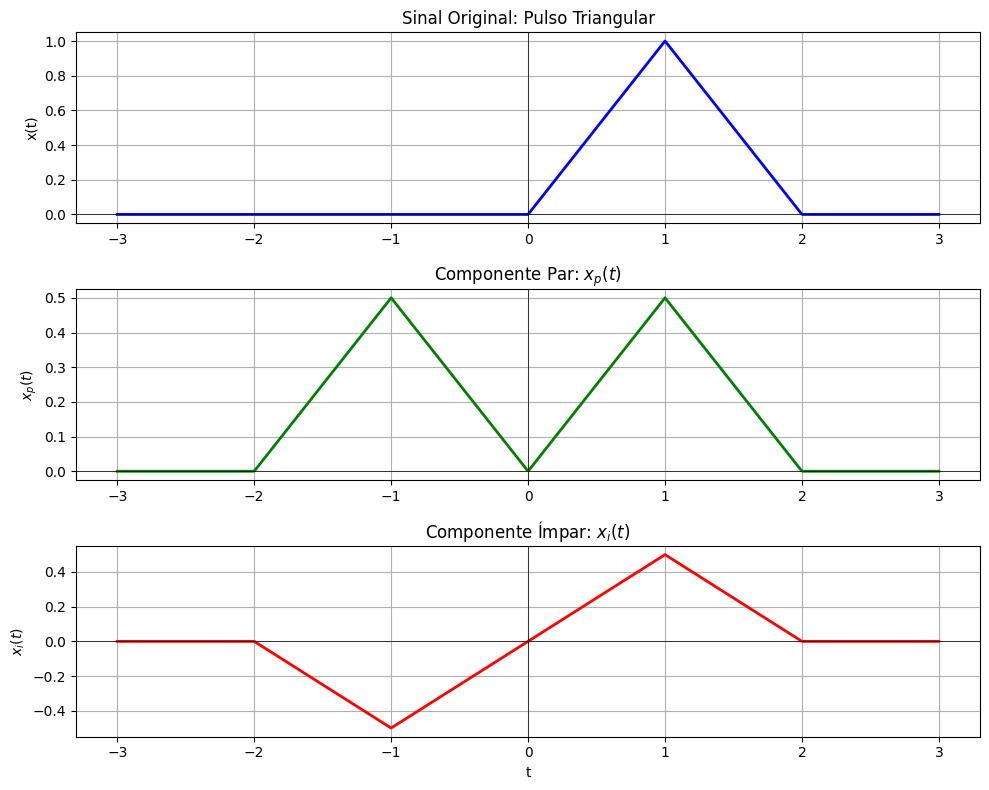

Verificação: Erro máximo |x(t) - (x_p(t) + x_i(t))| = 0.0000000000


In [20]:
# Implementação do sinal (a)
def sinal_a(t):
    result = np.zeros_like(t, dtype=float)
    
    # t em [0, 1]
    mask1 = (t >= 0) & (t <= 1)
    result[mask1] = t[mask1]
    
    # t em (1, 2]
    mask2 = (t > 1) & (t <= 2)
    result[mask2] = 2 - t[mask2]
    
    return result

# Visualizar decomposição
print("Decomposição do sinal (a) - Pulso Triangular:")
a_par, a_impar = visualizar_decomposicao(sinal_a, -3, 3, "Pulso Triangular")

### Análise Matemática

Para calcular as componentes par e ímpar, precisamos primeiro encontrar $x_a(-t)$:

$$x_a(-t) = 
\begin{cases}
-t, & 0 \leq -t \leq 1 \Rightarrow -1 \leq t \leq 0 \\
2-(-t), & 1 < -t \leq 2 \Rightarrow -2 \leq t < -1 \\
0, & \text{caso contrário}
\end{cases}$$

Simplificando:
$$x_a(-t) = 
\begin{cases}
-t, & -1 \leq t \leq 0 \\
2+t, & -2 \leq t < -1 \\
0, & \text{caso contrário}
\end{cases}$$

**Componente Par:**
$$x_{a,p}(t) = \frac{x_a(t) + x_a(-t)}{2}$$

Calculando para cada região:

$$x_{a,p}(t) = 
\begin{cases}
\frac{t + 0}{2} = \frac{t}{2}, & 0 < t \leq 1 \\
\frac{(2-t) + 0}{2} = \frac{2-t}{2}, & 1 < t \leq 2 \\
\frac{0 + (-t)}{2} = \frac{-t}{2}, & -1 \leq t < 0 \\
\frac{0 + (2+t)}{2} = \frac{2+t}{2}, & -2 \leq t < -1 \\
0, & \text{caso contrário}
\end{cases}$$

**Componente Ímpar:**
$$x_{a,i}(t) = \frac{x_a(t) - x_a(-t)}{2}$$

Calculando para cada região:

$$x_{a,i}(t) = 
\begin{cases}
\frac{t - 0}{2} = \frac{t}{2}, & 0 < t \leq 1 \\
\frac{(2-t) - 0}{2} = \frac{2-t}{2}, & 1 < t \leq 2 \\
\frac{0 - (-t)}{2} = \frac{t}{2}, & -1 \leq t < 0 \\
\frac{0 - (2+t)}{2} = \frac{-(2+t)}{2}, & -2 \leq t < -1 \\
0, & \text{caso contrário}
\end{cases}$$

## Sinal (b): Rampa com Patamar

### Definição do Sinal

O sinal (b) da Figura P1.23 pode ser definido como:

$$x_b(t) = 
\begin{cases}
-t-1, & -2 \leq t < -1 \\
t+1, & -1 \leq t < 0 \\
t, & 0 \leq t < 1 \\
1, & t \geq 1 \\
0, & t < -2
\end{cases}$$

### Implementação


Decomposição do sinal (b) - Rampa com Patamar:


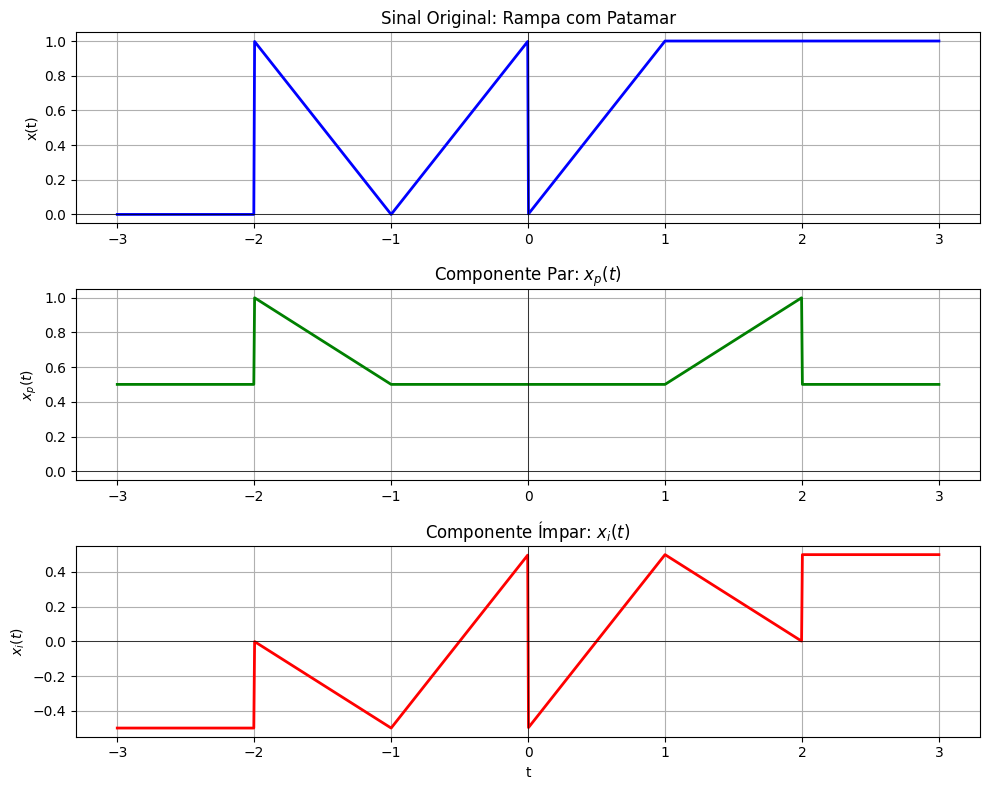

Verificação: Erro máximo |x(t) - (x_p(t) + x_i(t))| = 0.0000000000


In [21]:
# Implementação do sinal (b)
def sinal_b(t):
    result = np.zeros_like(t, dtype=float)
    
    # t em [-2, -1)
    mask1 = (t >= -2) & (t < -1)
    result[mask1] = -t[mask1] - 1
    
    # t em [-1, 0)
    mask2 = (t >= -1) & (t < 0)
    result[mask2] = t[mask2] + 1
    
    # t em [0, 1)
    mask3 = (t >= 0) & (t < 1)
    result[mask3] = t[mask3]
    
    # t >= 1
    mask4 = t >= 1
    result[mask4] = 1
    
    return result

# Visualizar decomposição
print("\nDecomposição do sinal (b) - Rampa com Patamar:")
b_par, b_impar = visualizar_decomposicao(sinal_b, -3, 3, "Rampa com Patamar")

### Análise Matemática

Para calcular as componentes, primeiro encontramos $x_b(-t)$:

$$x_b(-t) = 
\begin{cases}
-(-t)-1 = t-1, & -2 \leq -t < -1 \Rightarrow 1 < t \leq 2 \\
(-t)+1 = -t+1, & -1 \leq -t < 0 \Rightarrow 0 < t \leq 1 \\
-t, & 0 \leq -t < 1 \Rightarrow -1 < t \leq 0 \\
1, & -t \geq 1 \Rightarrow t \leq -1 \\
0, & -t < -2 \Rightarrow t > 2
\end{cases}$$

**Componente Par:**
$$x_{b,p}(t) = \frac{x_b(t) + x_b(-t)}{2}$$

Calculando para cada região:

$$x_{b,p}(t) = 
\begin{cases}
\frac{0 + 0}{2} = 0, & t > 2 \\
\frac{1 + 0}{2} = \frac{1}{2}, & 1 < t \leq 2 \\
\frac{1 + (-t+1)}{2} = \frac{2-t}{2}, & 0 < t \leq 1 \\
\frac{t + (-t)}{2} = 0, & -1 < t \leq 0 \\
\frac{(t+1) + 1}{2} = \frac{t+2}{2}, & -2 \leq t \leq -1 \\
\frac{0 + 0}{2} = 0, & t < -2
\end{cases}$$

**Componente Ímpar:**
$$x_{b,i}(t) = \frac{x_b(t) - x_b(-t)}{2}$$

Calculando para cada região:

$$x_{b,i}(t) = 
\begin{cases}
\frac{0 - 0}{2} = 0, & t > 2 \\
\frac{1 - 0}{2} = \frac{1}{2}, & 1 < t \leq 2 \\
\frac{1 - (-t+1)}{2} = \frac{t}{2}, & 0 < t \leq 1 \\
\frac{t - (-t)}{2} = t, & -1 < t \leq 0 \\
\frac{(t+1) - 1}{2} = \frac{t}{2}, & -2 \leq t \leq -1 \\
\frac{0 - 0}{2} = 0, & t < -2
\end{cases}$$

## Sinal (c): Rampas Lineares

### Definição do Sinal

O sinal (c) da Figura P1.23 é definido por:

$$x_c(t) = 
\begin{cases}
-2t, & t < 0 \\
t, & t > 0 \\
0, & t = 0
\end{cases}$$

### Implementação


Decomposição do sinal (c) - Rampas Lineares:


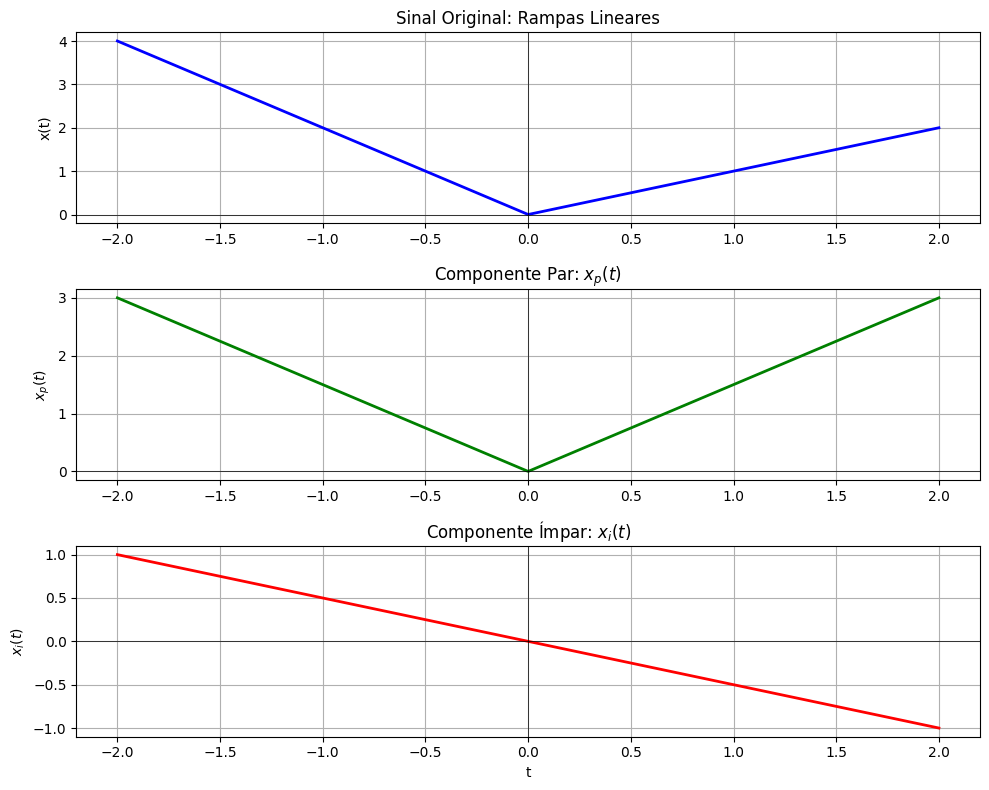

Verificação: Erro máximo |x(t) - (x_p(t) + x_i(t))| = 0.0000000000


In [22]:
# Implementação do sinal (c)
def sinal_c(t):
    result = np.zeros_like(t, dtype=float)
    
    # t < 0
    mask1 = t < 0
    result[mask1] = -2 * t[mask1]
    
    # t > 0
    mask2 = t > 0
    result[mask2] = t[mask2]
    
    return result

# Visualizar decomposição
print("\nDecomposição do sinal (c) - Rampas Lineares:")
c_par, c_impar = visualizar_decomposicao(sinal_c, -2, 2, "Rampas Lineares")

### Análise Matemática

Para calcular as componentes, primeiro encontramos $x_c(-t)$:

$$x_c(-t) = 
\begin{cases}
-2(-t) = 2t, & -t < 0 \Rightarrow t > 0 \\
-t, & -t > 0 \Rightarrow t < 0 \\
0, & t = 0
\end{cases}$$

**Componente Par:**
$$x_{c,p}(t) = \frac{x_c(t) + x_c(-t)}{2}$$

Calculando para cada região:

$$x_{c,p}(t) = 
\begin{cases}
\frac{t + 2t}{2} = \frac{3t}{2}, & t > 0 \\
\frac{-2t + (-t)}{2} = \frac{-3t}{2}, & t < 0 \\
0, & t = 0
\end{cases}$$

A componente par pode ser escrita de forma mais compacta como:
$$x_{c,p}(t) = \frac{3|t|}{2}$$

**Componente Ímpar:**
$$x_{c,i}(t) = \frac{x_c(t) - x_c(-t)}{2}$$

Calculando para cada região:

$$x_{c,i}(t) = 
\begin{cases}
\frac{t - 2t}{2} = \frac{-t}{2}, & t > 0 \\
\frac{-2t - (-t)}{2} = \frac{-t}{2}, & t < 0 \\
0, & t = 0
\end{cases}$$

Simplificando a componente ímpar:
$$x_{c,i}(t) = \frac{-t}{2}, \quad \forall t$$

## Verificação de Propriedades

Para confirmar que nossas decomposições estão corretas, vamos verificar as propriedades fundamentais das componentes par e ímpar:

In [23]:
# Função para verificar propriedades
def verificar_propriedades(sinal_func, nome, t_min, t_max, num=1000):
    t = np.linspace(t_min, t_max, num)
    
    # Calcular componentes
    par = componente_par(sinal_func, t)
    impar = componente_impar(sinal_func, t)
    
    # Verificar propriedades
    t_neg = -t
    par_neg = componente_par(sinal_func, t_neg)
    impar_neg = componente_impar(sinal_func, t_neg)
    
    # Calcular erros máximos
    erro_par = np.max(np.abs(par - par_neg))
    erro_impar = np.max(np.abs(impar + impar_neg))
    
    print(f"\nVerificação de propriedades para o sinal {nome}:")
    print(f"1. Propriedade par: x_p(-t) = x_p(t)")
    print(f"   Erro máximo: {erro_par:.10f}")
    
    print(f"2. Propriedade ímpar: x_i(-t) = -x_i(t)")
    print(f"   Erro máximo: {erro_impar:.10f}")
    
    # Verificar reconstrução
    x_orig = sinal_func(t)
    x_reconst = par + impar
    erro_reconst = np.max(np.abs(x_orig - x_reconst))
    
    print(f"3. Reconstrução: x(t) = x_p(t) + x_i(t)")
    print(f"   Erro máximo: {erro_reconst:.10f}")

# Verificar propriedades para todos os sinais
verificar_propriedades(sinal_a, "(a)", -3, 3)
verificar_propriedades(sinal_b, "(b)", -3, 3)
verificar_propriedades(sinal_c, "(c)", -2, 2)


Verificação de propriedades para o sinal (a):
1. Propriedade par: x_p(-t) = x_p(t)
   Erro máximo: 0.0000000000
2. Propriedade ímpar: x_i(-t) = -x_i(t)
   Erro máximo: 0.0000000000
3. Reconstrução: x(t) = x_p(t) + x_i(t)
   Erro máximo: 0.0000000000

Verificação de propriedades para o sinal (b):
1. Propriedade par: x_p(-t) = x_p(t)
   Erro máximo: 0.0000000000
2. Propriedade ímpar: x_i(-t) = -x_i(t)
   Erro máximo: 0.0000000000
3. Reconstrução: x(t) = x_p(t) + x_i(t)
   Erro máximo: 0.0000000000

Verificação de propriedades para o sinal (c):
1. Propriedade par: x_p(-t) = x_p(t)
   Erro máximo: 0.0000000000
2. Propriedade ímpar: x_i(-t) = -x_i(t)
   Erro máximo: 0.0000000000
3. Reconstrução: x(t) = x_p(t) + x_i(t)
   Erro máximo: 0.0000000000


## Exercício 1.24

Determine e esboce a parte par e a parte ímpar dos sinais representados na Figura P1.24. Coloque cuidadosamente escala em seus esboços.

## Teoria da Decomposição em Componentes Par e Ímpar para Sinais Discretos

Qualquer sinal discreto $x[n]$ pode ser decomposto em uma soma de uma componente par $x_p[n]$ e uma componente ímpar $x_i[n]$:

$$x[n] = x_p[n] + x_i[n]$$

Onde:
- Componente par: $x_p[n] = \frac{x[n] + x[-n]}{2}$
- Componente ímpar: $x_i[n] = \frac{x[n] - x[-n]}{2}$

A componente par satisfaz a propriedade $x_p[-n] = x_p[n]$ (simetria em relação ao eixo vertical).
A componente ímpar satisfaz a propriedade $x_i[-n] = -x_i[n]$ (anti-simetria em relação à origem).

### Implementação em Python

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Funções para calcular componentes par e ímpar
def componente_par(x_func, n):
    return 0.5 * (x_func(n) + x_func(-n))

def componente_impar(x_func, n):
    return 0.5 * (x_func(n) - x_func(-n))

# Função para visualizar a decomposição de sinais discretos
def visualizar_decomposicao(x_func, n_min, n_max, titulo):
    n = np.arange(n_min, n_max+1)
    x_original = x_func(n)
    x_par = componente_par(x_func, n)
    x_impar = componente_impar(x_func, n)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    # Sinal original
    markerline, stemlines, baseline = axs[0].stem(n, x_original, linefmt='b-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, markersize=8)
    axs[0].grid(True)
    axs[0].set_title(f'Sinal Original: {titulo}')
    axs[0].set_ylabel('x[n]')
    axs[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    axs[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    # Componente par
    markerline, stemlines, baseline = axs[1].stem(n, x_par, linefmt='g-', markerfmt='go', basefmt='k-')
    plt.setp(markerline, markersize=8)
    axs[1].grid(True)
    axs[1].set_title('Componente Par: $x_p[n]$')
    axs[1].set_ylabel('$x_p[n]$')
    axs[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    axs[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    # Componente ímpar
    markerline, stemlines, baseline = axs[2].stem(n, x_impar, linefmt='r-', markerfmt='ro', basefmt='k-')
    plt.setp(markerline, markersize=8)
    axs[2].grid(True)
    axs[2].set_title('Componente Ímpar: $x_i[n]$')
    axs[2].set_xlabel('n')
    axs[2].set_ylabel('$x_i[n]$')
    axs[2].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    axs[2].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Verificar que x[n] = x_p[n] + x_i[n]
    erro_max = np.max(np.abs(x_original - (x_par + x_impar)))
    print(f"Verificação: Erro máximo |x[n] - (x_p[n] + x_i[n])| = {erro_max:.10f}")
    
    return x_par, x_impar

## Sinal (a): Sequência Alternada

### Definição do Sinal

O sinal (a) da Figura P1.24 é uma sequência alternada definida por:

$$x_a[n] = 
\begin{cases}
1, & n \geq 0 \\
-1, & n < 0
\end{cases}$$

### Implementação

Decomposição do sinal (a) - Sequência Alternada:


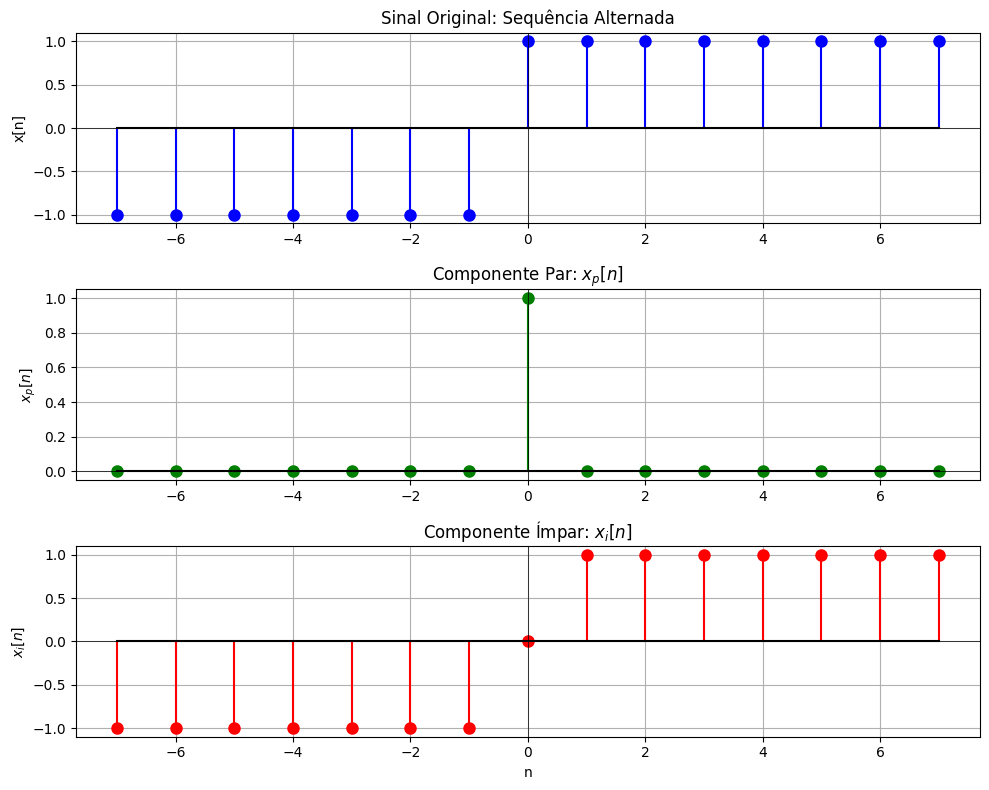

Verificação: Erro máximo |x[n] - (x_p[n] + x_i[n])| = 0.0000000000


In [25]:
# Implementação do sinal (a)
def sinal_a(n):
    result = np.zeros_like(n, dtype=float)
    
    # n >= 0
    mask1 = n >= 0
    result[mask1] = 1
    
    # n < 0
    mask2 = n < 0
    result[mask2] = -1
    
    return result

# Visualizar decomposição
print("Decomposição do sinal (a) - Sequência Alternada:")
a_par, a_impar = visualizar_decomposicao(sinal_a, -7, 7, "Sequência Alternada")

### Análise Matemática

Para calcular as componentes par e ímpar, precisamos primeiro encontrar $x_a[-n]$:

$$x_a[-n] = 
\begin{cases}
1, & -n \geq 0 \Rightarrow n \leq 0 \\
-1, & -n < 0 \Rightarrow n > 0
\end{cases}$$

Simplificando:
$$x_a[-n] = 
\begin{cases}
1, & n \leq 0 \\
-1, & n > 0
\end{cases}$$

**Componente Par:**
$$x_{a,p}[n] = \frac{x_a[n] + x_a[-n]}{2}$$

Calculando para cada região:

$$x_{a,p}[n] = 
\begin{cases}
\frac{1 + (-1)}{2} = 0, & n > 0 \\
\frac{1 + 1}{2} = 1, & n = 0 \\
\frac{(-1) + 1}{2} = 0, & n < 0
\end{cases}$$

Simplificando:
$$x_{a,p}[n] = 
\begin{cases}
1, & n = 0 \\
0, & n \neq 0
\end{cases}$$

**Componente Ímpar:**
$$x_{a,i}[n] = \frac{x_a[n] - x_a[-n]}{2}$$

Calculando para cada região:

$$x_{a,i}[n] = 
\begin{cases}
\frac{1 - (-1)}{2} = 1, & n > 0 \\
\frac{1 - 1}{2} = 0, & n = 0 \\
\frac{(-1) - 1}{2} = -1, & n < 0
\end{cases}$$

## Sinal (b): Sequência com Impulsos em Pontos Específicos

### Definição do Sinal

O sinal (b) da Figura P1.24 tem impulsos em pontos específicos:

$$x_b[n] = 
\begin{cases}
1, & n = -2 \\
2, & n = -1 \\
3, & n = 0 \\
1, & n = 7 \\
0, & \text{caso contrário}
\end{cases}$$

### Implementação


Decomposição do sinal (b) - Sequência com Impulsos em Pontos Específicos:


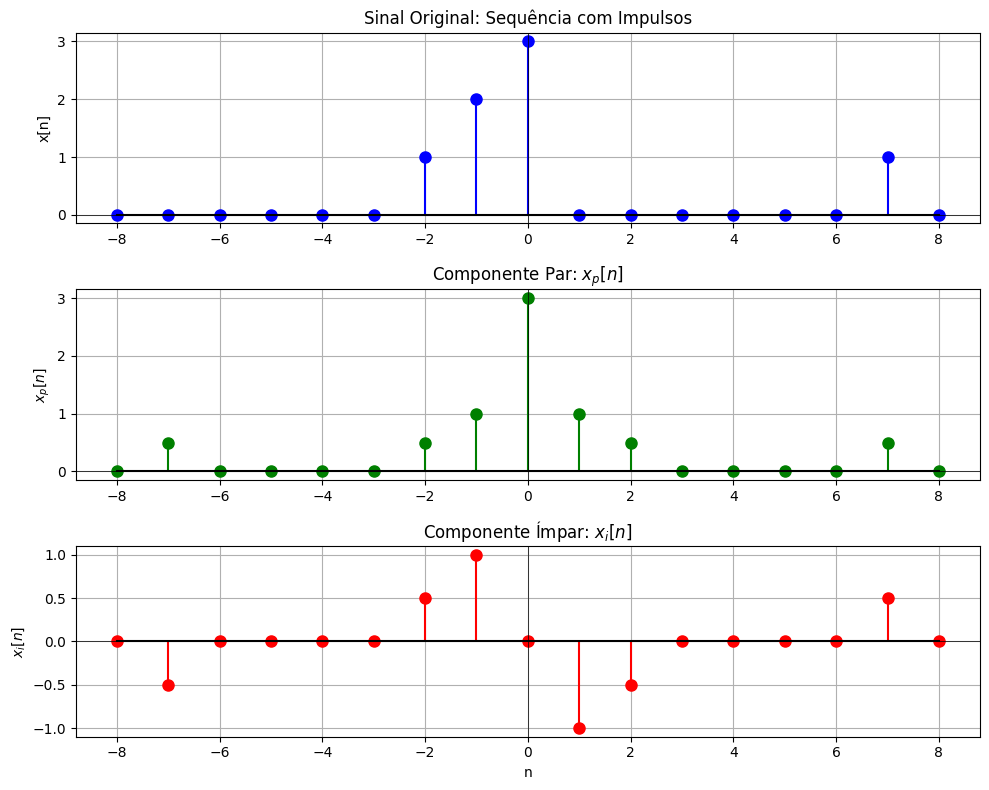

Verificação: Erro máximo |x[n] - (x_p[n] + x_i[n])| = 0.0000000000


In [26]:
# Implementação do sinal (b)
def sinal_b(n):
    result = np.zeros_like(n, dtype=float)
    
    # Impulsos nos pontos específicos
    mask_minus2 = (n == -2)
    mask_minus1 = (n == -1)
    mask_0 = (n == 0)
    mask_7 = (n == 7)
    
    result[mask_minus2] = 1
    result[mask_minus1] = 2
    result[mask_0] = 3
    result[mask_7] = 1
    
    return result

# Visualizar decomposição
print("\nDecomposição do sinal (b) - Sequência com Impulsos em Pontos Específicos:")
b_par, b_impar = visualizar_decomposicao(sinal_b, -8, 8, "Sequência com Impulsos")

### Análise Matemática

Para calcular as componentes, primeiro encontramos $x_b[-n]$:

$$x_b[-n] = 
\begin{cases}
1, & -n = -2 \Rightarrow n = 2 \\
2, & -n = -1 \Rightarrow n = 1 \\
3, & -n = 0 \Rightarrow n = 0 \\
1, & -n = 7 \Rightarrow n = -7 \\
0, & \text{caso contrário}
\end{cases}$$

**Componente Par:**
$$x_{b,p}[n] = \frac{x_b[n] + x_b[-n]}{2}$$

Calculando para cada ponto:

$$x_{b,p}[n] = 
\begin{cases}
\frac{0 + 1}{2} = \frac{1}{2}, & n = 2 \\
\frac{0 + 2}{2} = 1, & n = 1 \\
\frac{3 + 3}{2} = 3, & n = 0 \\
\frac{2 + 0}{2} = 1, & n = -1 \\
\frac{1 + 0}{2} = \frac{1}{2}, & n = -2 \\
\frac{0 + 1}{2} = \frac{1}{2}, & n = -7 \\
\frac{1 + 0}{2} = \frac{1}{2}, & n = 7 \\
0, & \text{caso contrário}
\end{cases}$$

**Componente Ímpar:**
$$x_{b,i}[n] = \frac{x_b[n] - x_b[-n]}{2}$$

Calculando para cada ponto:

$$x_{b,i}[n] = 
\begin{cases}
\frac{0 - 1}{2} = -\frac{1}{2}, & n = 2 \\
\frac{0 - 2}{2} = -1, & n = 1 \\
\frac{3 - 3}{2} = 0, & n = 0 \\
\frac{2 - 0}{2} = 1, & n = -1 \\
\frac{1 - 0}{2} = \frac{1}{2}, & n = -2 \\
\frac{0 - 1}{2} = -\frac{1}{2}, & n = -7 \\
\frac{1 - 0}{2} = \frac{1}{2}, & n = 7 \\
0, & \text{caso contrário}
\end{cases}$$

## Sinal (c): Sequência Complexa

### Definição do Sinal

O sinal (c) da Figura P1.24 pode ser definido como:

$$x_c[n] = 
\begin{cases}
-1, & n = -4 \\
2, & n = -3 \\
2, & n = -2 \\
1, & n = -1 \\
1, & n = 0 \\
2, & n = 1 \\
1, & n = 2 \\
-1, & n = 3 \\
0, & \text{caso contrário}
\end{cases}$$

### Implementação


Decomposição do sinal (c) - Sequência Complexa:


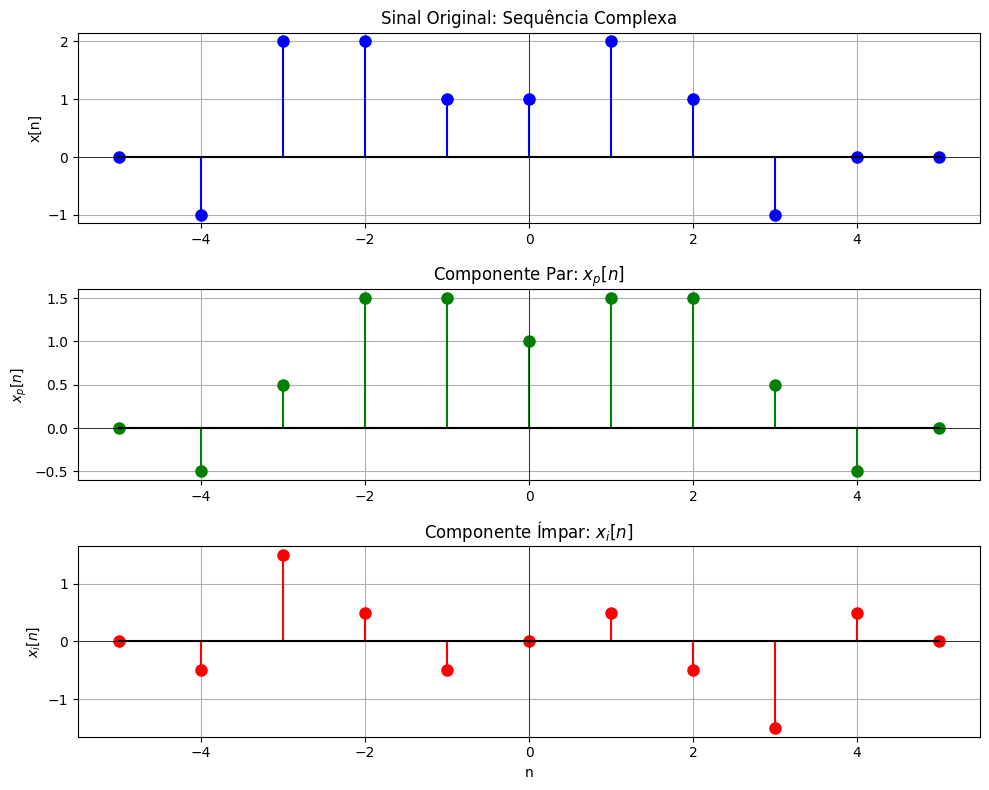

Verificação: Erro máximo |x[n] - (x_p[n] + x_i[n])| = 0.0000000000


In [27]:
# Implementação do sinal (c)
def sinal_c(n):
    result = np.zeros_like(n, dtype=float)
    
    # Define valores para pontos específicos
    valores = {-4: -1, -3: 2, -2: 2, -1: 1, 0: 1, 1: 2, 2: 1, 3: -1}
    
    for i, ni in enumerate(n):
        result[i] = valores.get(ni, 0)
    
    return result

# Visualizar decomposição
print("\nDecomposição do sinal (c) - Sequência Complexa:")
c_par, c_impar = visualizar_decomposicao(sinal_c, -5, 5, "Sequência Complexa")

### Análise Matemática

Para calcular as componentes, primeiro encontramos $x_c[-n]$:

$$x_c[-n] = 
\begin{cases}
-1, & -n = -4 \Rightarrow n = 4 \\
2, & -n = -3 \Rightarrow n = 3 \\
2, & -n = -2 \Rightarrow n = 2 \\
1, & -n = -1 \Rightarrow n = 1 \\
1, & -n = 0 \Rightarrow n = 0 \\
2, & -n = 1 \Rightarrow n = -1 \\
1, & -n = 2 \Rightarrow n = -2 \\
-1, & -n = 3 \Rightarrow n = -3 \\
0, & \text{caso contrário}
\end{cases}$$

Aqui observamos que não há valor para $n = 4$ no sinal original, então consideraremos $x_c[4] = 0$, e também não há valor para $n = -3$ no sinal refletido, então $x_c[-(-3)] = x_c[3] = -1$.

**Componente Par:**
$$x_{c,p}[n] = \frac{x_c[n] + x_c[-n]}{2}$$

Calculando para cada ponto relevante:

$$x_{c,p}[n] = 
\begin{cases}
\frac{0 + (-1)}{2} = -\frac{1}{2}, & n = 4 \\
\frac{(-1) + 2}{2} = \frac{1}{2}, & n = 3 \\
\frac{1 + 2}{2} = \frac{3}{2}, & n = 2 \\
\frac{2 + 1}{2} = \frac{3}{2}, & n = 1 \\
\frac{1 + 1}{2} = 1, & n = 0 \\
\frac{1 + 2}{2} = \frac{3}{2}, & n = -1 \\
\frac{2 + 1}{2} = \frac{3}{2}, & n = -2 \\
\frac{2 + (-1)}{2} = \frac{1}{2}, & n = -3 \\
\frac{(-1) + 0}{2} = -\frac{1}{2}, & n = -4 \\
0, & \text{caso contrário}
\end{cases}$$

**Componente Ímpar:**
$$x_{c,i}[n] = \frac{x_c[n] - x_c[-n]}{2}$$

Calculando para cada ponto relevante:

$$x_{c,i}[n] = 
\begin{cases}
\frac{0 - (-1)}{2} = \frac{1}{2}, & n = 4 \\
\frac{(-1) - 2}{2} = -\frac{3}{2}, & n = 3 \\
\frac{1 - 2}{2} = -\frac{1}{2}, & n = 2 \\
\frac{2 - 1}{2} = \frac{1}{2}, & n = 1 \\
\frac{1 - 1}{2} = 0, & n = 0 \\
\frac{1 - 2}{2} = -\frac{1}{2}, & n = -1 \\
\frac{2 - 1}{2} = \frac{1}{2}, & n = -2 \\
\frac{2 - (-1)}{2} = \frac{3}{2}, & n = -3 \\
\frac{(-1) - 0}{2} = -\frac{1}{2}, & n = -4 \\
0, & \text{caso contrário}
\end{cases}$$

## Verificação de Propriedades

Para confirmar que nossas decomposições estão corretas, vamos verificar as propriedades fundamentais das componentes par e ímpar:

In [28]:
# Função para verificar propriedades de sinais discretos
def verificar_propriedades_discretas(sinal_func, nome, n_min, n_max):
    n = np.arange(n_min, n_max+1)
    n_negativo = -n
    
    # Calcular componentes
    par = componente_par(sinal_func, n)
    impar = componente_impar(sinal_func, n)
    
    # Verificar propriedades em pontos relevantes
    pontos_teste = np.arange(-4, 5)
    
    print(f"\nVerificação de propriedades para o sinal {nome}:")
    print("1. Propriedade par: x_p[-n] = x_p[n]")
    print("   Valores em pontos de teste:")
    
    for ponto in pontos_teste:
        x_p_pos = componente_par(sinal_func, np.array([ponto]))[0]
        x_p_neg = componente_par(sinal_func, np.array([-ponto]))[0]
        print(f"   x_p[{ponto}] = {x_p_pos:.2f}, x_p[{-ponto}] = {x_p_neg:.2f}")
    
    print("\n2. Propriedade ímpar: x_i[-n] = -x_i[n]")
    print("   Valores em pontos de teste:")
    
    for ponto in pontos_teste:
        x_i_pos = componente_impar(sinal_func, np.array([ponto]))[0]
        x_i_neg = componente_impar(sinal_func, np.array([-ponto]))[0]
        print(f"   x_i[{ponto}] = {x_i_pos:.2f}, x_i[{-ponto}] = {x_i_neg:.2f}, -x_i[{ponto}] = {-x_i_pos:.2f}")
    
    # Verificar reconstrução
    x_orig = sinal_func(n)
    x_reconst = par + impar
    print("\n3. Reconstrução: x[n] = x_p[n] + x_i[n]")
    print("   Valores para pontos selecionados:")
    
    for ponto in pontos_teste:
        idx = np.where(n == ponto)[0]
        if len(idx) > 0:
            idx = idx[0]
            print(f"   n = {ponto}: x[n] = {x_orig[idx]:.2f}, x_p[n] + x_i[n] = {x_reconst[idx]:.2f}")

# Verificar propriedades para todos os sinais
verificar_propriedades_discretas(sinal_a, "(a)", -7, 7)
verificar_propriedades_discretas(sinal_b, "(b)", -8, 8)
verificar_propriedades_discretas(sinal_c, "(c)", -5, 5)


Verificação de propriedades para o sinal (a):
1. Propriedade par: x_p[-n] = x_p[n]
   Valores em pontos de teste:
   x_p[-4] = 0.00, x_p[4] = 0.00
   x_p[-3] = 0.00, x_p[3] = 0.00
   x_p[-2] = 0.00, x_p[2] = 0.00
   x_p[-1] = 0.00, x_p[1] = 0.00
   x_p[0] = 1.00, x_p[0] = 1.00
   x_p[1] = 0.00, x_p[-1] = 0.00
   x_p[2] = 0.00, x_p[-2] = 0.00
   x_p[3] = 0.00, x_p[-3] = 0.00
   x_p[4] = 0.00, x_p[-4] = 0.00

2. Propriedade ímpar: x_i[-n] = -x_i[n]
   Valores em pontos de teste:
   x_i[-4] = -1.00, x_i[4] = 1.00, -x_i[-4] = 1.00
   x_i[-3] = -1.00, x_i[3] = 1.00, -x_i[-3] = 1.00
   x_i[-2] = -1.00, x_i[2] = 1.00, -x_i[-2] = 1.00
   x_i[-1] = -1.00, x_i[1] = 1.00, -x_i[-1] = 1.00
   x_i[0] = 0.00, x_i[0] = 0.00, -x_i[0] = -0.00
   x_i[1] = 1.00, x_i[-1] = -1.00, -x_i[1] = -1.00
   x_i[2] = 1.00, x_i[-2] = -1.00, -x_i[2] = -1.00
   x_i[3] = 1.00, x_i[-3] = -1.00, -x_i[3] = -1.00
   x_i[4] = 1.00, x_i[-4] = -1.00, -x_i[4] = -1.00

3. Reconstrução: x[n] = x_p[n] + x_i[n]
   Valores para pon

# Exercício 1.25

Determine se os sinais de tempo contínuo a seguir são periódicos. Se o sinal for periódico, determine seu período fundamental.

(a) $x(t) = 3\cos(4t + \frac{\pi}{3})$
(b) $x(t) = e^{j(\pi t-1)}$
(c) $x(t) = [\cos(2t - \frac{\pi}{3})]^2$
(d) $x(t) = \mathcal{E}v[\cos(4\pi t)u(t)]$
(e) $x(t) = \mathcal{E}v[\text{sen}(4\pi t)u(t)]$
(f) $x(t) = \sum_{n=-\infty}^{\infty} e^{-(2t-n)}u(2t-n)$

## Teoria da Periodicidade

Um sinal $x(t)$ é periódico se, para algum valor positivo $T$, a seguinte condição for satisfeita:

$$x(t + T) = x(t), \quad \forall t$$

O menor valor positivo de $T$ que satisfaz esta condição é chamado de período fundamental.

Para sinais complexos exponenciais da forma $e^{j\omega t}$, o período é dado por $T = \frac{2\pi}{|\omega|}$.

Para sinais senoidais da forma $\sin(\omega t + \phi)$ ou $\cos(\omega t + \phi)$, o período é dado por $T = \frac{2\pi}{|\omega|}$.

Para sinais multiplicados por uma função degrau unitário $u(t)$, precisamos verificar se a função é periódica para $t \geq 0$.

## Análise dos Sinais

(a) $x(t) = 3\cos(4t + \frac{\pi}{3})$

Este sinal é da forma $A\cos(\omega t + \phi)$, onde:
- $A = 3$ (amplitude)
- $\omega = 4$ (frequência angular)
- $\phi = \frac{\pi}{3}$ (fase)

Para sinais cosenoidais, o período é dado por $T = \frac{2\pi}{|\omega|} = \frac{2\pi}{4} = \frac{\pi}{2}$.

Podemos verificar:
$$x(t + \frac{\pi}{2}) = 3\cos(4(t + \frac{\pi}{2}) + \frac{\pi}{3})$$
$$= 3\cos(4t + 2\pi + \frac{\pi}{3})$$
$$= 3\cos(4t + \frac{\pi}{3})$$
$$= x(t)$$

Portanto, o sinal é periódico, com período fundamental $T = \frac{\pi}{2}$.

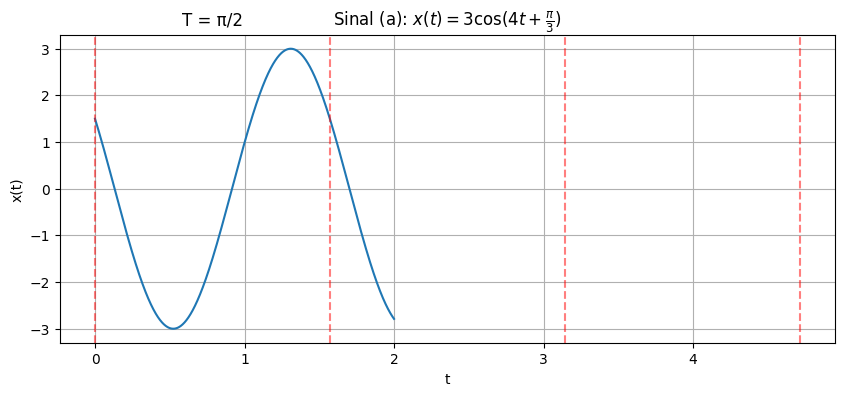

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def x_a(t):
    return 3 * np.cos(4*t + np.pi/3)

# Plotar o sinal (a)
t = np.linspace(0, 2, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t, x_a(t))
plt.grid(True)
plt.title('Sinal (a): $x(t) = 3\\cos(4t + \\frac{\\pi}{3})$')
plt.xlabel('t')
plt.ylabel('x(t)')

# Marcar o período
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=np.pi/2, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=np.pi, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=3*np.pi/2, color='r', linestyle='--', alpha=0.5)
plt.text(np.pi/4, 3.5, 'T = π/2', fontsize=12, horizontalalignment='center')

plt.show()

(b) $x(t) = e^{j(\pi t-1)}$

Este sinal pode ser reescrito como:
$$x(t) = e^{j(\pi t-1)} = e^{-j} \cdot e^{j\pi t} = e^{-j} \cdot (\cos(\pi t) + j\sin(\pi t))$$

Onde $e^{-j} = \cos(-1) + j\sin(-1)$ é apenas um fator de escala complexo constante.

O período de $e^{j\pi t}$ é $T = \frac{2\pi}{|\pi|} = 2$.

Vamos verificar:
$$x(t + 2) = e^{j(\pi(t+2)-1)} = e^{j(\pi t + 2\pi - 1)} = e^{j(\pi t-1)} \cdot e^{j2\pi} = e^{j(\pi t-1)} \cdot 1 = x(t)$$

Portanto, o sinal é periódico, com período fundamental $T = 2$.

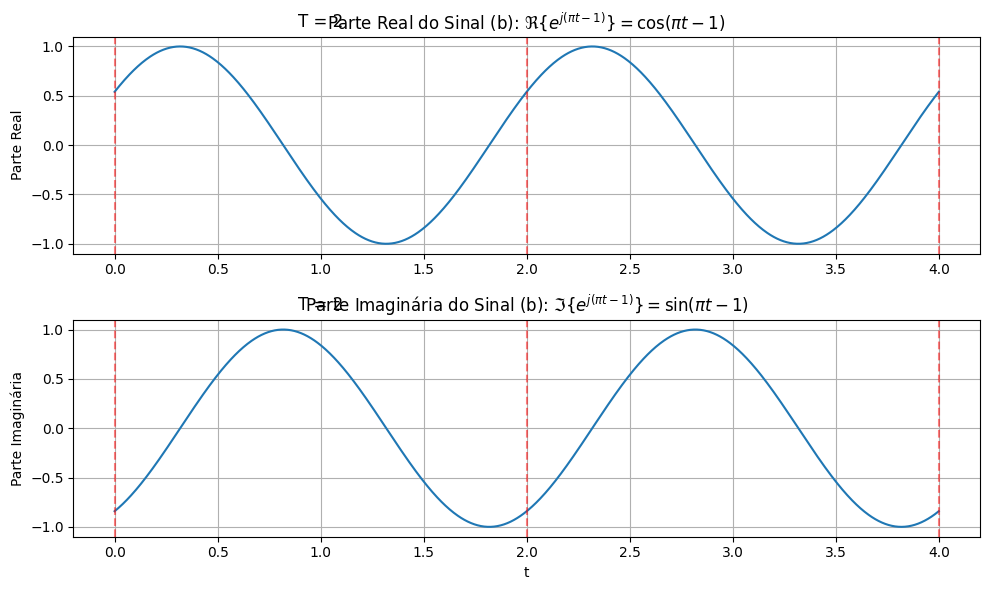

In [30]:
def x_b_real(t):
    return np.cos(np.pi*t - 1)

def x_b_imag(t):
    return np.sin(np.pi*t - 1)

# Plotar o sinal (b)
t = np.linspace(0, 4, 1000)
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x_b_real(t))
plt.grid(True)
plt.title('Parte Real do Sinal (b): $\\Re\\{e^{j(\\pi t-1)}\\} = \\cos(\\pi t - 1)$')
plt.ylabel('Parte Real')

# Marcar o período na parte real
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=4, color='r', linestyle='--', alpha=0.5)
plt.text(1, 1.2, 'T = 2', fontsize=12, horizontalalignment='center')

plt.subplot(2, 1, 2)
plt.plot(t, x_b_imag(t))
plt.grid(True)
plt.title('Parte Imaginária do Sinal (b): $\\Im\\{e^{j(\\pi t-1)}\\} = \\sin(\\pi t - 1)$')
plt.xlabel('t')
plt.ylabel('Parte Imaginária')

# Marcar o período na parte imaginária
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=4, color='r', linestyle='--', alpha=0.5)
plt.text(1, 1.2, 'T = 2', fontsize=12, horizontalalignment='center')

plt.tight_layout()
plt.show()

(c) $x(t) = [\cos(2t - \frac{\pi}{3})]^2$

Podemos utilizar a identidade trigonométrica: $\cos^2(\theta) = \frac{1 + \cos(2\theta)}{2}$

Aplicando esta identidade:
$$x(t) = [\cos(2t - \frac{\pi}{3})]^2 = \frac{1 + \cos(2(2t - \frac{\pi}{3}))}{2} = \frac{1 + \cos(4t - \frac{2\pi}{3})}{2}$$

Agora temos um sinal da forma $\frac{1 + \cos(\omega t + \phi)}{2}$, onde:
- $\omega = 4$
- $\phi = -\frac{2\pi}{3}$

O período é dado por $T = \frac{2\pi}{|\omega|} = \frac{2\pi}{4} = \frac{\pi}{2}$.

Podemos verificar:
$$x(t + \frac{\pi}{2}) = [\cos(2(t + \frac{\pi}{2}) - \frac{\pi}{3})]^2 = [\cos(2t + \pi - \frac{\pi}{3})]^2 = [\cos(2t + \frac{2\pi}{3})]^2$$

Usando a propriedade $\cos(\theta + \pi) = -\cos(\theta)$, e considerando que estamos elevando ao quadrado, temos:
$$x(t + \frac{\pi}{2}) = [\cos(2t - \frac{\pi}{3})]^2 = x(t)$$

Portanto, o sinal é periódico, com período fundamental $T = \frac{\pi}{2}$.

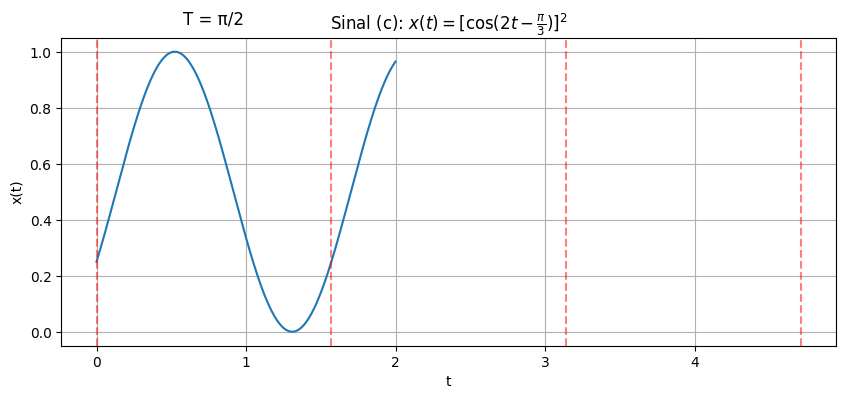

In [31]:
def x_c(t):
    return np.cos(2*t - np.pi/3)**2

# Plotar o sinal (c)
t = np.linspace(0, 2, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t, x_c(t))
plt.grid(True)
plt.title('Sinal (c): $x(t) = [\\cos(2t - \\frac{\\pi}{3})]^2$')
plt.xlabel('t')
plt.ylabel('x(t)')

# Marcar o período
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=np.pi/2, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=np.pi, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=3*np.pi/2, color='r', linestyle='--', alpha=0.5)
plt.text(np.pi/4, 1.1, 'T = π/2', fontsize=12, horizontalalignment='center')

plt.show()

(d) $x(t) = \mathcal{E}v[\cos(4\pi t)u(t)]$

O operador $\mathcal{E}v$ representa o valor da envoltória do sinal, que para $\cos(4\pi t)$ é constante e igual a 1 (amplitude do cosseno).

No entanto, a presença da função degrau unitário $u(t)$ limita o sinal apenas para $t \geq 0$. Portanto, temos:

$$x(t) = 
\begin{cases}
1, & t \geq 0 \\
0, & t < 0
\end{cases}$$

Este sinal é constante para $t \geq 0$ e zero para $t < 0$, o que significa que é um simples degrau unitário. Um sinal degrau não é periódico, pois não satisfaz a condição $x(t + T) = x(t)$ para todo $t$ e para nenhum valor finito positivo de $T$.

Portanto, o sinal não é periódico.

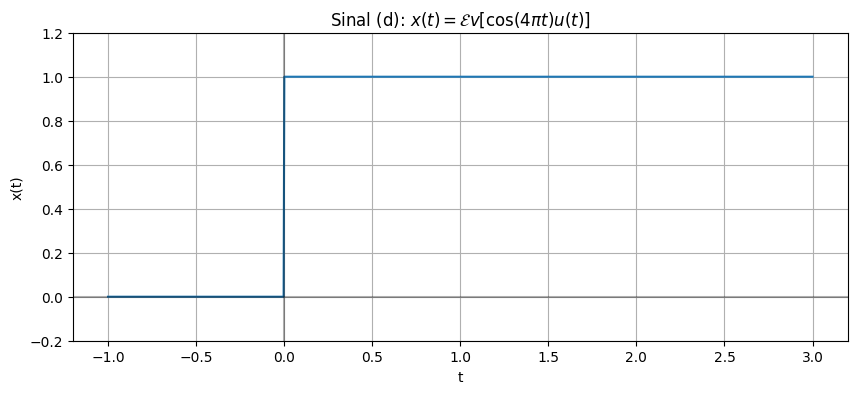

In [32]:
def x_d(t):
    result = np.zeros_like(t)
    mask = t >= 0
    result[mask] = 1
    return result

# Plotar o sinal (d)
t = np.linspace(-1, 3, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t, x_d(t))
plt.grid(True)
plt.title('Sinal (d): $x(t) = \\mathcal{E}v[\\cos(4\\pi t)u(t)]$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim(-0.2, 1.2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.show()

(e) $x(t) = \mathcal{E}v[\text{sen}(4\pi t)u(t)]$

Similar ao caso anterior, o operador $\mathcal{E}v$ representa o valor da envoltória do sinal, que para $\text{sen}(4\pi t)$ é constante e igual a 1 (amplitude do seno).

Considerando a função degrau unitário $u(t)$, temos:

$$x(t) = 
\begin{cases}
1, & t \geq 0 \\
0, & t < 0
\end{cases}$$

Este sinal é idêntico ao caso (d), sendo um degrau unitário. Portanto, o sinal não é periódico.

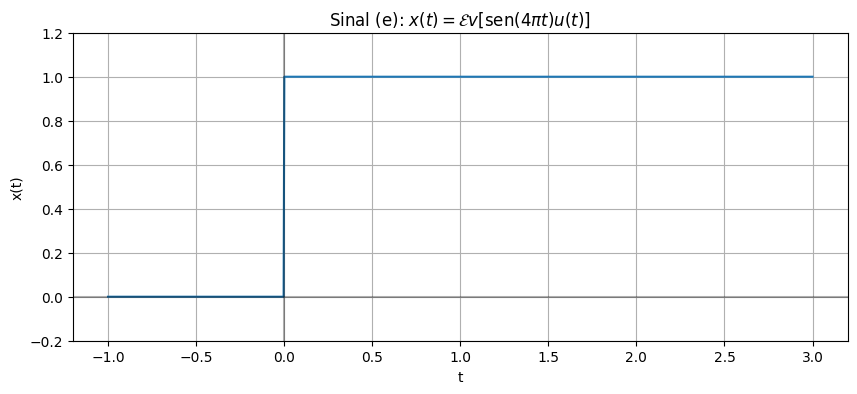

In [33]:
def x_e(t):
    result = np.zeros_like(t)
    mask = t >= 0
    result[mask] = 1
    return result

# Plotar o sinal (e)
t = np.linspace(-1, 3, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t, x_e(t))
plt.grid(True)
plt.title('Sinal (e): $x(t) = \\mathcal{E}v[\\text{sen}(4\\pi t)u(t)]$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim(-0.2, 1.2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.show()

(f) $x(t) = \sum_{n=-\infty}^{\infty} e^{-(2t-n)}u(2t-n)$

Analisemos a expressão $e^{-(2t-n)}u(2t-n)$ para um valor específico de $n$:
- A função $u(2t-n)$ é não nula apenas quando $2t-n \geq 0$, ou seja, $t \geq \frac{n}{2}$
- Para $t \geq \frac{n}{2}$, temos $e^{-(2t-n)}$, que é uma exponencial decrescente

A soma infinita desses termos cria um sinal que consiste de múltiplas exponenciais decrescentes começando em pontos igualmente espaçados $t = \frac{n}{2}$ para todos os inteiros $n$.

Vamos verificar se este sinal é periódico. Para que o sinal seja periódico com período $T$, devemos ter:

$$x(t + T) = x(t), \quad \forall t$$

Substituindo na definição do sinal:

$$\sum_{n=-\infty}^{\infty} e^{-(2(t+T)-n)}u(2(t+T)-n) = \sum_{n=-\infty}^{\infty} e^{-(2t-n)}u(2t-n)$$

Para que estas expressões sejam iguais, precisamos que a estrutura da soma se mantenha a mesma quando o tempo é deslocado por $T$. Isso ocorre se $T = \frac{1}{2}$, pois neste caso:

$$\sum_{n=-\infty}^{\infty} e^{-(2(t+\frac{1}{2})-n)}u(2(t+\frac{1}{2})-n) = \sum_{n=-\infty}^{\infty} e^{-(2t-n+1)}u(2t-n+1)$$

Fazendo uma substituição $m = n - 1$:

$$\sum_{m=-\infty}^{\infty} e^{-(2t-m)}u(2t-m) = x(t)$$

Portanto, o sinal é periódico, com período fundamental $T = \frac{1}{2}$.

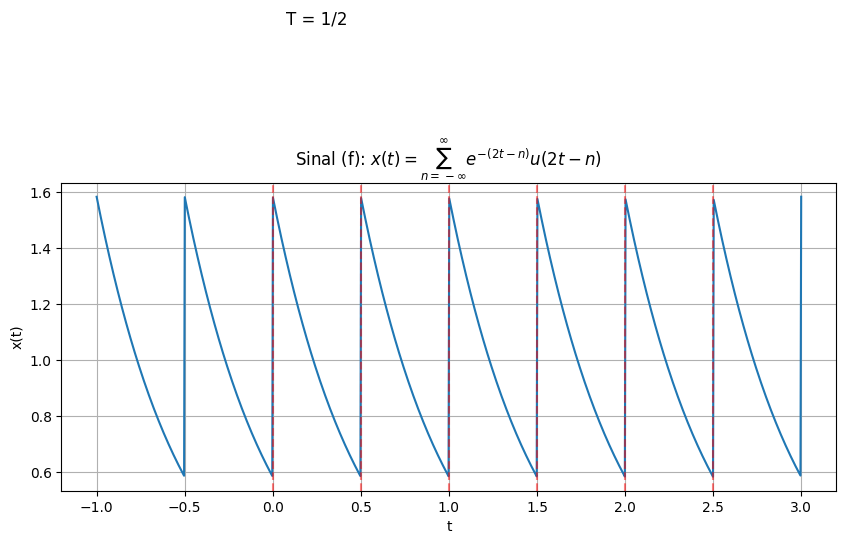

In [34]:
def x_f_component(t, n):
    result = np.zeros_like(t)
    mask = 2*t - n >= 0
    result[mask] = np.exp(-(2*t[mask] - n))
    return result

def x_f(t, n_terms=10):
    result = np.zeros_like(t)
    for n in range(-n_terms, n_terms+1):
        result += x_f_component(t, n)
    return result

# Plotar o sinal (f)
t = np.linspace(-1, 3, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t, x_f(t))
plt.grid(True)
plt.title('Sinal (f): $x(t) = \\sum_{n=-\\infty}^{\\infty} e^{-(2t-n)}u(2t-n)$')
plt.xlabel('t')
plt.ylabel('x(t)')

# Marcar o período
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=1.0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=1.5, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=2.0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=2.5, color='r', linestyle='--', alpha=0.5)
plt.text(0.25, 2.2, 'T = 1/2', fontsize=12, horizontalalignment='center')

plt.show()

## Resumo dos Resultados

| Sinal                                                     | Periódico? | Período Fundamental |
| --------------------------------------------------------- | ---------- | ------------------- |
| (a) $x(t) = 3\cos(4t + \frac{\pi}{3})$                    | Sim        | $T = \frac{\pi}{2}$ |
| (b) $x(t) = e^{j(\pi t-1)}$                               | Sim        | $T = 2$             |
| (c) $x(t) = [\cos(2t - \frac{\pi}{3})]^2$                 | Sim        | $T = \frac{\pi}{2}$ |
| (d) $x(t) = \mathcal{E}v[\cos(4\pi t)u(t)]$               | Não        | N/A                 |
| (e) $x(t) = \mathcal{E}v[\text{sen}(4\pi t)u(t)]$         | Não        | N/A                 |
| (f) $x(t) = \sum_{n=-\infty}^{\infty} e^{-(2t-n)}u(2t-n)$ | Sim        | $T = \frac{1}{2}$   |


# Exercício 1.26

## Teoria da Periodicidade em Sinais Discretos

Um sinal discreto $x[n]$ é periódico se existe um inteiro positivo $N$ tal que:

$$x[n + N] = x[n], \quad \forall n$$

O menor valor positivo inteiro $N$ que satisfaz esta condição é chamado de período fundamental.

Para sinais discretos, uma diferença importante em relação aos sinais contínuos é que **o período deve ser um número inteiro**. Isso significa que nem todo sinal que seria periódico no domínio contínuo será periódico no domínio discreto.

Para sinais senoidais discretos da forma $\sin(\omega n + \phi)$ ou $\cos(\omega n + \phi)$, o período $N$ é o menor inteiro positivo que satisfaz:

$$\frac{\omega N}{2\pi} = \frac{k}{1}$$

onde $k$ é um inteiro.

Vamos implementar funções para visualizar e analisar os sinais do exercício:

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_discrete_signal(x_func, n_range, title, period=None):
    """
    Plota um sinal discreto e marca seu período, se fornecido
    
    Parâmetros:
    - x_func: função que calcula o valor do sinal para cada n
    - n_range: intervalo de n para plotagem
    - title: título do gráfico
    - period: período do sinal (se for periódico)
    """
    n = np.array(n_range)
    x = x_func(n)
    
    plt.figure(figsize=(12, 5))
    plt.stem(n, x, 'b', markerfmt='bo', basefmt='b-')
    plt.grid(True)
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel('x[n]')
    
    # Marcar o período, se fornecido
    if period:
        for i in range(min(n_range), max(n_range), period):
            plt.axvline(x=i, color='r', linestyle='--', alpha=0.3)
        plt.text(min(n_range) + period/2, max(x) * 0.9, f'N = {period}', 
                 fontsize=12, color='r', horizontalalignment='center')
    
    plt.tight_layout()
    plt.show()

def verify_periodicity(x_func, period, n_range):
    """
    Verifica numericamente se um sinal é periódico com o período indicado
    
    Parâmetros:
    - x_func: função que calcula o valor do sinal para cada n
    - period: período a ser verificado
    - n_range: intervalo de n para verificação
    
    Retorna:
    - True se o sinal for periódico com o período dado, False caso contrário
    """
    n = np.array(n_range)
    x_original = x_func(n)
    x_shifted = x_func(n + period)
    
    # Calcula a diferença máxima
    max_diff = np.max(np.abs(x_original - x_shifted))
    print(f"Diferença máxima para período {period}: {max_diff:.10f}")
    
    # Considera periódico se a diferença for muito pequena
    return max_diff < 1e-10

(a) $x[n] = \text{sen}(\frac{6\pi}{7}n + 1)$

Vamos analisar se este sinal é periódico:

Verificação de periodicidade para o sinal (a):
Diferença máxima para período 1: 1.9396414756
Diferença máxima para período 2: 0.8632216654
Diferença máxima para período 3: 1.5554716933
Diferença máxima para período 4: 1.5554716933
Diferença máxima para período 5: 0.8632216654
Diferença máxima para período 6: 1.9396414756
Diferença máxima para período 7: 0.0000000000
O sinal é periódico com período N = 7


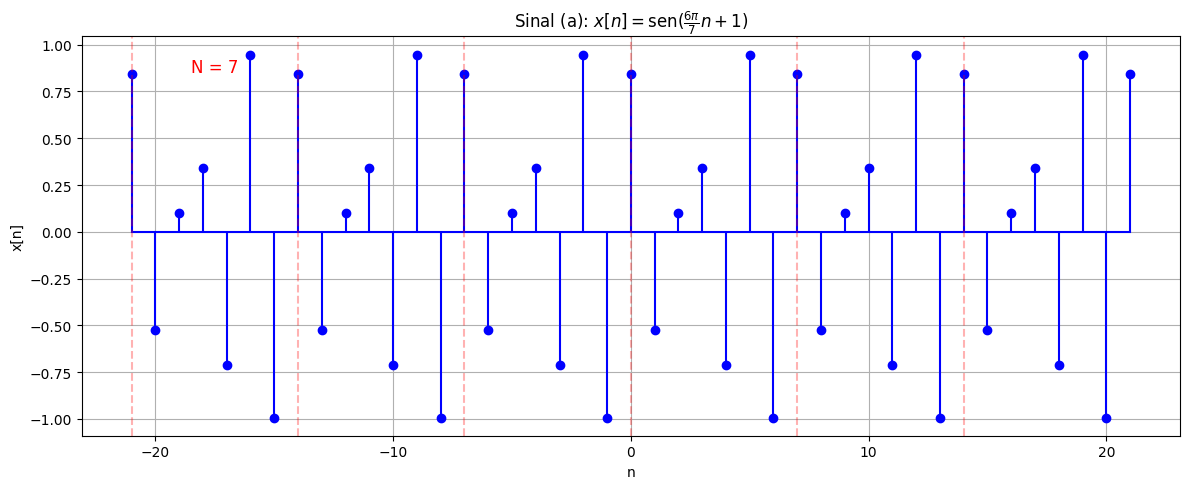

In [36]:
def signal_a(n):
    return np.sin((6*np.pi/7)*n + 1)

# Verificar se o sinal é periódico
n_test = np.arange(-20, 21)
possible_periods = range(1, 15)

print("Verificação de periodicidade para o sinal (a):")
for N in possible_periods:
    is_periodic = verify_periodicity(signal_a, N, n_test)
    if is_periodic:
        print(f"O sinal é periódico com período N = {N}")
        break

# Plotar o sinal
plot_discrete_signal(signal_a, range(-21, 22), 'Sinal (a): $x[n] = \\text{sen}(\\frac{6\\pi}{7}n + 1)$', 7)

Para este sinal, temos $\omega = \frac{6\pi}{7}$, então:

$$\frac{6\pi}{7} \cdot \frac{N}{2\pi} = \frac{3N}{7} = k$$

O menor valor de $N$ que torna $\frac{3N}{7}$ um inteiro é $N = 7$, resultando em $k = 3$.

Verificação: 
$x[n+7] = \text{sen}(\frac{6\pi}{7}(n+7) + 1) = \text{sen}(\frac{6\pi}{7}n + 6\pi + 1)$

Como $\text{sen}(\theta + 2\pi k) = \text{sen}(\theta)$ para qualquer inteiro $k$, e $6\pi = 3 \cdot 2\pi$, temos:
$x[n+7] = \text{sen}(\frac{6\pi}{7}n + 1) = x[n]$

**Conclusão:** O sinal (a) é periódico com período fundamental $N = 7$.

(b) $x[n] = \cos(\frac{n}{8} - \pi)$

Vamos analisar se este sinal é periódico:


Verificação de periodicidade para o sinal (b):
Diferença máxima para período 1: 0.1249143367
Diferença máxima para período 2: 0.2489832573
Diferença máxima para período 3: 0.3727937636
Diferença máxima para período 4: 0.4940812142
Diferença máxima para período 5: 0.6148558686
Diferença máxima para período 6: 0.7314691989
Diferença máxima para período 7: 0.8473233533
Diferença máxima para período 8: 0.9574428515
Diferença máxima para período 9: 1.0665686406
Diferença máxima para período 10: 1.1684759286
Diferença máxima para período 11: 1.2691704809
Diferença máxima para período 12: 1.3612753296
Diferença máxima para período 13: 1.4519673403
Diferença máxima para período 14: 1.5328324844
Diferença máxima para período 15: 1.6121067351
Diferença máxima para período 16: 1.6804703010
Diferença máxima para período 17: 1.7470897434
Diferença máxima para período 18: 1.8018849405
Diferença máxima para período 19: 1.8548100005
Diferença máxima para período 20: 1.8951817682
Diferença máxima para

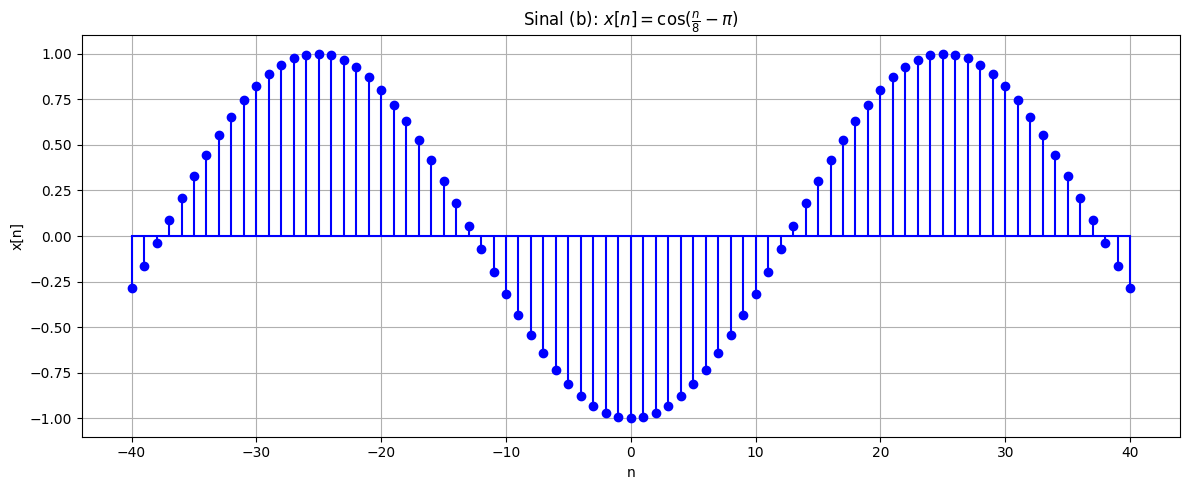


Valores do sinal (b) em pontos específicos:
x[0] = -1.0000000000
x[16] = 0.4161468365
x[32] = 0.6536436209
x[48] = -0.9601702867
x[64] = 0.1455000338
x[80] = 0.8390715291
x[96] = -0.8438539587


In [37]:
def signal_b(n):
    return np.cos(n/8 - np.pi)

# Verificar se o sinal é periódico
print("\nVerificação de periodicidade para o sinal (b):")
for N in range(1, 100):
    is_periodic = verify_periodicity(signal_b, N, n_test)
    if is_periodic:
        print(f"O sinal é periódico com período N = {N}")
        break
    if N == 99:
        print("Não foi encontrado um período até N = 99")

# Plotar o sinal
plot_discrete_signal(signal_b, range(-40, 41), 'Sinal (b): $x[n] = \\cos(\\frac{n}{8} - \\pi)$')

# Verificar valores em pontos específicos para mostrar a não-periodicidade
n_values = [0, 16, 32, 48, 64, 80, 96]
print("\nValores do sinal (b) em pontos específicos:")
for n in n_values:
    print(f"x[{n}] = {signal_b(n):.10f}")

Para este sinal, $\omega = \frac{1}{8}$, então:
$$\frac{1}{8} \cdot \frac{N}{2\pi} = \frac{N}{16\pi} = k$$

Para que $\frac{N}{16\pi}$ seja um inteiro, $N$ deve ser um múltiplo de $16\pi$. Como $\pi$ é irracional, não existe um valor inteiro $N$ que satisfaça esta condição.

**Conclusão:** O sinal (b) não é periódico.

(c) $x[n] = \cos(\frac{\pi}{8}n^2)$

Vamos analisar se este sinal é periódico:


Verificação de periodicidade para o sinal (c):
Diferença máxima para período 1: 1.9238795325
Diferença máxima para período 2: 1.8477590650
Diferença máxima para período 3: 1.9238795325
Diferença máxima para período 4: 1.8477590650
Diferença máxima para período 5: 1.9238795325
Diferença máxima para período 6: 1.8477590650
Diferença máxima para período 7: 1.9238795325
Diferença máxima para período 8: 0.0000000000
O sinal é periódico com período N = 8


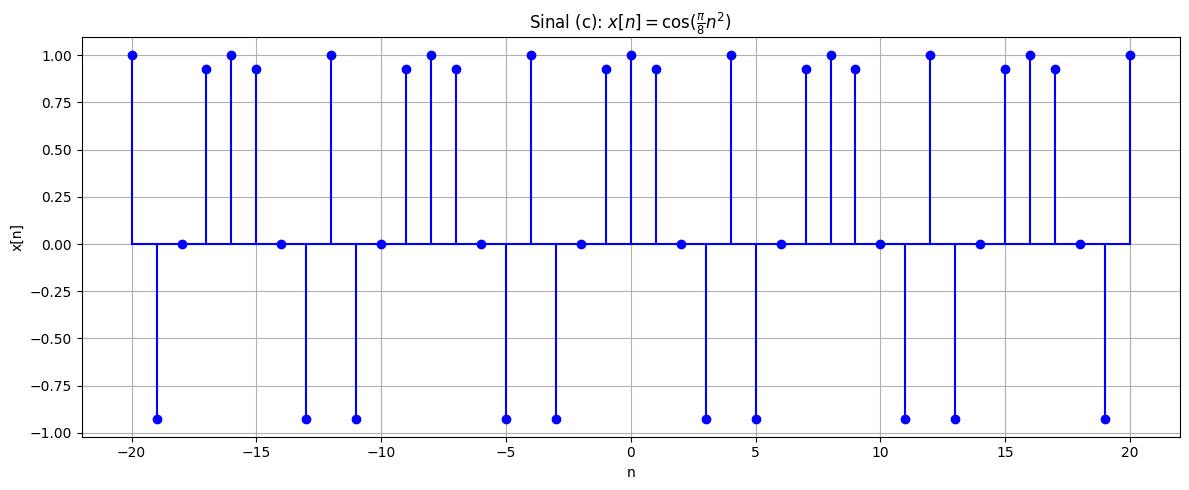


Demonstração da não-periodicidade do sinal (c):
x[1] = 0.9238795325, x[9] = 0.9238795325
x[2] = 0.0000000000, x[10] = -0.0000000000
x[3] = -0.9238795325, x[11] = -0.9238795325
x[4] = 1.0000000000, x[12] = 1.0000000000
x[5] = -0.9238795325, x[13] = -0.9238795325
x[6] = 0.0000000000, x[14] = 0.0000000000
x[7] = 0.9238795325, x[15] = 0.9238795325
x[8] = 1.0000000000, x[16] = 1.0000000000
x[9] = 0.9238795325, x[17] = 0.9238795325


In [38]:
def signal_c(n):
    return np.cos((np.pi/8)*n**2)

# Verificar se o sinal é periódico
print("\nVerificação de periodicidade para o sinal (c):")
for N in range(1, 50):
    is_periodic = verify_periodicity(signal_c, N, n_test)
    if is_periodic:
        print(f"O sinal é periódico com período N = {N}")
        break
    if N == 49:
        print("Não foi encontrado um período até N = 49")

# Plotar o sinal
plot_discrete_signal(signal_c, range(-20, 21), 'Sinal (c): $x[n] = \\cos(\\frac{\\pi}{8}n^2)$')

# Verificar valores em pontos específicos
print("\nDemonstração da não-periodicidade do sinal (c):")
for n in range(10):
    if n > 0:
        print(f"x[{n}] = {signal_c(n):.10f}, x[{n+8}] = {signal_c(n+8):.10f}")

Para verificar a periodicidade, precisamos encontrar um $N$ tal que:
$$x[n+N] = \cos(\frac{\pi}{8}(n+N)^2) = \cos(\frac{\pi}{8}n^2) = x[n]$$

Expandindo:
$$\frac{\pi}{8}(n+N)^2 = \frac{\pi}{8}(n^2 + 2nN + N^2) = \frac{\pi}{8}n^2 + \frac{\pi}{4}nN + \frac{\pi}{8}N^2$$

Para que $x[n+N] = x[n]$, precisamos que:
$$\frac{\pi}{4}nN + \frac{\pi}{8}N^2 = 2\pi k$$, para algum inteiro $k$

Como $n$ pode assumir qualquer valor inteiro e o termo $\frac{\pi}{4}nN$ depende de $n$, não é possível encontrar um valor constante $N$ que satisfaça esta condição para todo $n$.

**Conclusão:** O sinal (c) não é periódico.

(d) $x[n] = \cos(\frac{\pi}{2}n)\cos(\frac{\pi}{4}n)$

Vamos analisar se este sinal é periódico:


Verificação de periodicidade para o sinal (d):
Diferença máxima para período 1: 1.0000000000
Diferença máxima para período 2: 1.0000000000
Diferença máxima para período 3: 1.0000000000
Diferença máxima para período 4: 2.0000000000
Diferença máxima para período 5: 1.0000000000
Diferença máxima para período 6: 1.0000000000
Diferença máxima para período 7: 1.0000000000
Diferença máxima para período 8: 0.0000000000
O sinal é periódico com período N = 8


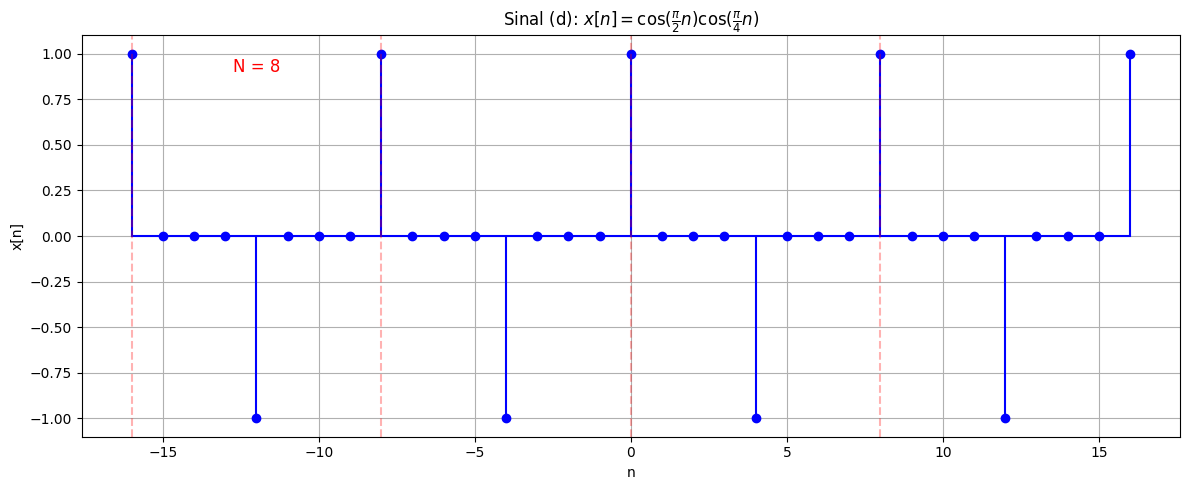


Comparação entre a forma original e expandida do sinal (d):
Diferença máxima: 0.0000000000


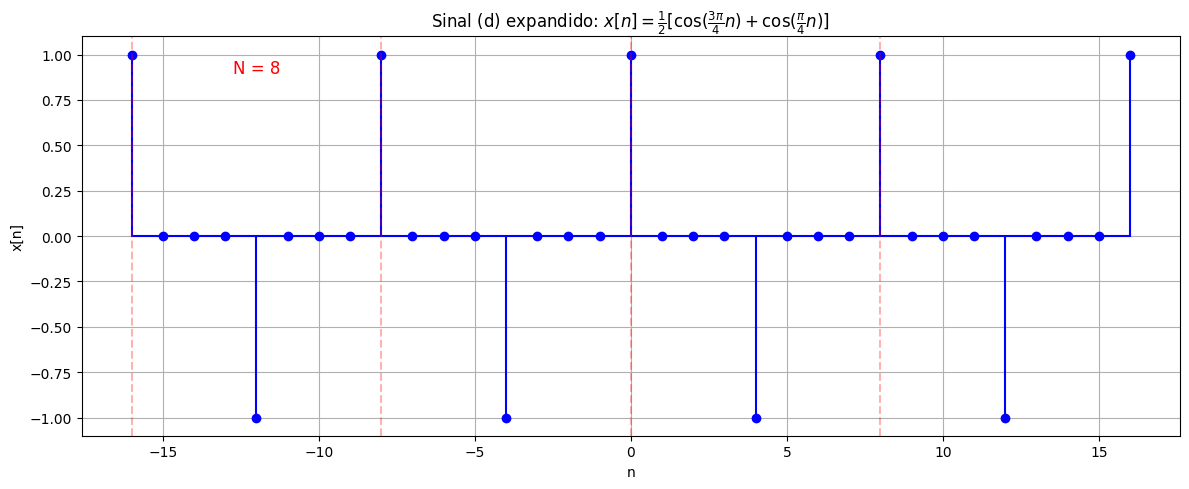

In [39]:
def signal_d(n):
    return np.cos((np.pi/2)*n) * np.cos((np.pi/4)*n)

# Verificar se o sinal é periódico
print("\nVerificação de periodicidade para o sinal (d):")
for N in range(1, 20):
    is_periodic = verify_periodicity(signal_d, N, n_test)
    if is_periodic:
        print(f"O sinal é periódico com período N = {N}")
        break

# Plotar o sinal
plot_discrete_signal(signal_d, range(-16, 17), 'Sinal (d): $x[n] = \\cos(\\frac{\\pi}{2}n)\\cos(\\frac{\\pi}{4}n)$', 8)

# Analisar usando a identidade trigonométrica
def signal_d_expanded(n):
    return 0.5 * (np.cos((3*np.pi/4)*n) + np.cos((np.pi/4)*n))

# Comparar a forma original e expandida
n_compare = np.arange(-16, 17)
original = signal_d(n_compare)
expanded = signal_d_expanded(n_compare)

print("\nComparação entre a forma original e expandida do sinal (d):")
print(f"Diferença máxima: {np.max(np.abs(original - expanded)):.10f}")

# Plotar a forma expandida
plot_discrete_signal(signal_d_expanded, range(-16, 17), 
                     'Sinal (d) expandido: $x[n] = \\frac{1}{2}[\\cos(\\frac{3\\pi}{4}n) + \\cos(\\frac{\\pi}{4}n)]$', 8)

Utilizando a identidade trigonométrica: $\cos(A)\cos(B) = \frac{1}{2}[\cos(A+B) + \cos(A-B)]$

$x[n] = \frac{1}{2}[\cos(\frac{\pi}{2}n + \frac{\pi}{4}n) + \cos(\frac{\pi}{2}n - \frac{\pi}{4}n)] = \frac{1}{2}[\cos(\frac{3\pi}{4}n) + \cos(\frac{\pi}{4}n)]$

Agora temos uma soma de cossenos. Para um sinal periódico, ambos os termos devem ter um período comum.

Para o primeiro termo, $\omega_1 = \frac{3\pi}{4}$:
$\frac{3\pi}{4} \cdot \frac{N}{2\pi} = \frac{3N}{8} = k_1$

Para o segundo termo, $\omega_2 = \frac{\pi}{4}$:
$\frac{\pi}{4} \cdot \frac{N}{2\pi} = \frac{N}{8} = k_2$

O menor valor de $N$ que torna ambos $\frac{3N}{8}$ e $\frac{N}{8}$ inteiros é $N = 8$, resultando em $k_1 = 3$ e $k_2 = 1$.

**Conclusão:** O sinal (d) é periódico com período fundamental $N = 8$.

(e) $x[n] = 2\cos(\frac{\pi}{4}n) + \text{sen}(\frac{\pi}{8}n) - 2\cos(\frac{\pi}{2}n + \frac{\pi}{6})$

Vamos analisar se este sinal é periódico:


Verificação de periodicidade para o sinal (e):
Diferença máxima para período 1: 4.3630371213
Diferença máxima para período 2: 5.7569948340
Diferença máxima para período 3: 6.7635809376
Diferença máxima para período 4: 5.0000000000
Diferença máxima para período 5: 7.5289478023
Diferença máxima para período 6: 7.1712083963
Diferença máxima para período 7: 5.7772506836
Diferença máxima para período 8: 2.0000000000
Diferença máxima para período 9: 5.7772506836
Diferença máxima para período 10: 7.1712083963
Diferença máxima para período 11: 7.5289478023
Diferença máxima para período 12: 5.0000000000
Diferença máxima para período 13: 6.7635809376
Diferença máxima para período 14: 5.7569948340
Diferença máxima para período 15: 4.3630371213
Diferença máxima para período 16: 0.0000000000
O sinal é periódico com período N = 16


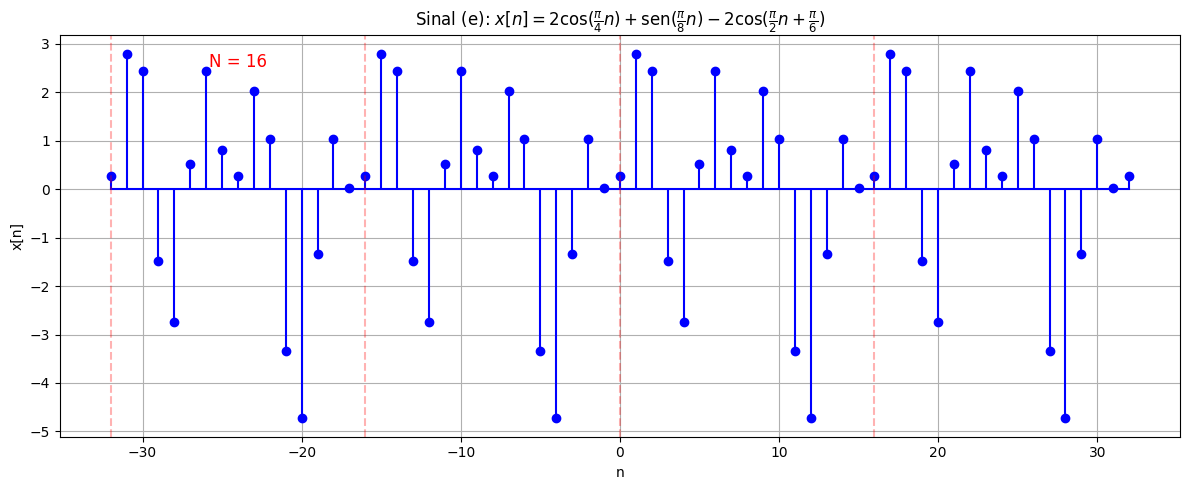


Verificação dos períodos de cada termo do sinal (e):
Diferença máxima para período 1: 1.4142135624
Diferença máxima para período 2: 2.8284271247
Diferença máxima para período 3: 3.4142135624
Diferença máxima para período 4: 4.0000000000
Diferença máxima para período 5: 3.4142135624
Diferença máxima para período 6: 2.8284271247
Diferença máxima para período 7: 1.4142135624
Diferença máxima para período 8: 0.0000000000
O termo 2cos(πn/4) é periódico com período N = 8
Diferença máxima para período 1: 0.3826834324
Diferença máxima para período 2: 0.7653668647
Diferença máxima para período 3: 1.0897902136
Diferença máxima para período 4: 1.4142135624
Diferença máxima para período 5: 1.6309863137
Diferença máxima para período 6: 1.8477590650
Diferença máxima para período 7: 1.9238795325
Diferença máxima para período 8: 2.0000000000
Diferença máxima para período 9: 1.9238795325
Diferença máxima para período 10: 1.8477590650
Diferença máxima para período 11: 1.6309863137
Diferença máxima para

In [40]:
def signal_e(n):
    return 2*np.cos((np.pi/4)*n) + np.sin((np.pi/8)*n) - 2*np.cos((np.pi/2)*n + np.pi/6)

# Verificar se o sinal é periódico
print("\nVerificação de periodicidade para o sinal (e):")
for N in range(1, 30):
    is_periodic = verify_periodicity(signal_e, N, n_test)
    if is_periodic:
        print(f"O sinal é periódico com período N = {N}")
        break

# Plotar o sinal
plot_discrete_signal(signal_e, range(-32, 33), 
                     'Sinal (e): $x[n] = 2\\cos(\\frac{\\pi}{4}n) + \\text{sen}(\\frac{\\pi}{8}n) - 2\\cos(\\frac{\\pi}{2}n + \\frac{\\pi}{6})$', 16)

# Verificar cada componente separadamente
def term1(n): return 2*np.cos((np.pi/4)*n)
def term2(n): return np.sin((np.pi/8)*n)
def term3(n): return -2*np.cos((np.pi/2)*n + np.pi/6)

print("\nVerificação dos períodos de cada termo do sinal (e):")
for i, (func, name) in enumerate([(term1, "2cos(πn/4)"), (term2, "sen(πn/8)"), (term3, "-2cos(πn/2 + π/6)")]):
    for N in range(1, 20):
        if verify_periodicity(func, N, n_test):
            print(f"O termo {name} é periódico com período N = {N}")
            break

Para este sinal, temos três termos com frequências diferentes. Para que o sinal seja periódico, todos os termos devem ter um período comum.

Primeiro termo: $\omega_1 = \frac{\pi}{4}$
$\frac{\pi}{4} \cdot \frac{N}{2\pi} = \frac{N}{8} = k_1$
O menor $N$ que torna $\frac{N}{8}$ inteiro é $N = 8$, com $k_1 = 1$.

Segundo termo: $\omega_2 = \frac{\pi}{8}$
$\frac{\pi}{8} \cdot \frac{N}{2\pi} = \frac{N}{16} = k_2$
O menor $N$ que torna $\frac{N}{16}$ inteiro é $N = 16$, com $k_2 = 1$.

Terceiro termo: $\omega_3 = \frac{\pi}{2}$
$\frac{\pi}{2} \cdot \frac{N}{2\pi} = \frac{N}{4} = k_3$
O menor $N$ que torna $\frac{N}{4}$ inteiro é $N = 4$, com $k_3 = 1$.

O menor valor de $N$ que é múltiplo de todos estes períodos (8, 16, 4) é $N = 16$ (mínimo múltiplo comum).

**Conclusão:** O sinal (e) é periódico com período fundamental $N = 16$.

# Exercício 1.27

## Definição do Problema

Neste exercício, analisa-se os seguintes sistemas de tempo contínuo para determinar quais das seguintes propriedades são válidas para cada um:

1. **Sem memória**
2. **Invariante no tempo**
3. **Linear**
4. **Causal**
5. **Estável**

Os sistemas a serem analisados são:

(a) $y(t) = x(t - 2) + x(2 - t)$
(b) $y(t) = [\cos(3t)]x(t)$
(c) $y(t) = \int_{-\infty}^{2t} x(\tau)d\tau$
(d) $y(t) = \begin{cases} 0, & t < 0 \\ x(t) + x(t - 2), & t \geq 0 \end{cases}$
(e) $y(t) = \begin{cases} 0, & x(t) < 0 \\ x(t) + x(t - 2), & x(t) \geq 0 \end{cases}$
(f) $y(t) = x(t/3)$
(g) $y(t) = \frac{dx(t)}{dt}$

## Teoria das Propriedades de Sistemas

Antes de analisar cada sistema, vamos revisar as definições das propriedades:

### 1. Sistema Sem Memória

Um sistema é **sem memória** se a saída em qualquer instante $t$ depende apenas da entrada naquele mesmo instante $t$, e não de valores passados ou futuros da entrada.

Matematicamente, um sistema sem memória pode ser representado como:
$$y(t) = f(x(t))$$

### 2. Sistema Invariante no Tempo

Um sistema é **invariante no tempo** se um atraso na entrada resulta no mesmo atraso na saída, sem alterar sua forma.

Matematicamente, se $y(t) = T[x(t)]$, então $y(t-\tau) = T[x(t-\tau)]$ para qualquer $\tau$.

### 3. Sistema Linear

Um sistema é **linear** se satisfaz os princípios da superposição e da homogeneidade:

- **Superposição**: $T[x_1(t) + x_2(t)] = T[x_1(t)] + T[x_2(t)]$
- **Homogeneidade**: $T[ax(t)] = aT[x(t)]$ para qualquer constante $a$

### 4. Sistema Causal

Um sistema é **causal** se a saída em um instante $t$ depende apenas de valores da entrada em instantes menores ou iguais a $t$ (passado e presente), nunca do futuro.

Matematicamente, se $x_1(t) = x_2(t)$ para $t \leq t_0$, então $y_1(t) = y_2(t)$ para $t \leq t_0$.

### 5. Sistema Estável

Um sistema é **estável** (no sentido BIBO - Bounded Input, Bounded Output) se, para qualquer entrada limitada, a saída também é limitada.

Matematicamente, se $|x(t)| < M_x < \infty$ para todo $t$, então $|y(t)| < M_y < \infty$ para todo $t$.

## Análise dos Sistemas

Vamos analisar cada sistema individualmente:

(a) $y(t) = x(t - 2) + x(2 - t)$

**Sem memória?**  
Não. A saída $y(t)$ depende de $x(t-2)$ e $x(2-t)$, que são valores da entrada em instantes diferentes de $t$, portanto o sistema tem memória.

**Invariante no tempo?**  
Vejamos: Se a entrada é $x(t-\tau)$, a saída seria:
$y'(t) = x(t-\tau-2) + x(2-(t-\tau)) = x(t-\tau-2) + x(2-t+\tau)$

Por outro lado, $y(t-\tau) = x(t-\tau-2) + x(2-(t-\tau)) = x(t-\tau-2) + x(2-t+\tau)$

Como $y'(t) = y(t-\tau)$, o sistema é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax(t)] = ax(t-2) + ax(2-t) = a[x(t-2) + x(2-t)] = aT[x(t)]$ ✓
- Superposição: $T[x_1(t) + x_2(t)] = (x_1(t-2) + x_2(t-2)) + (x_1(2-t) + x_2(2-t)) = (x_1(t-2) + x_1(2-t)) + (x_2(t-2) + x_2(2-t)) = T[x_1(t)] + T[x_2(t)]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Não. O termo $x(2-t)$ depende do valor futuro da entrada para $t < 2$. Por exemplo, em $t=1$, a saída depende de $x(-1)$ e $x(1)$, onde $x(1)$ é um valor futuro em relação a $t=-1$.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x(t)| < M$ para todo $t$, então:
$|y(t)| = |x(t-2) + x(2-t)| \leq |x(t-2)| + |x(2-t)| < M + M = 2M$

A saída é limitada, portanto o sistema é estável.

(b) $y(t) = [\cos(3t)]x(t)$

**Sem memória?**  
Sim. A saída $y(t)$ depende apenas do valor da entrada no mesmo instante $t$, multiplicado por $\cos(3t)$, que é simplesmente uma ponderação que varia com o tempo.

**Invariante no tempo?**  
Não. Se a entrada é $x(t-\tau)$, a saída seria:
$y'(t) = [\cos(3t)]x(t-\tau)$

Por outro lado, $y(t-\tau) = [\cos(3(t-\tau))]x(t-\tau)$

Como $\cos(3t) \neq \cos(3(t-\tau))$ em geral, temos $y'(t) \neq y(t-\tau)$, logo o sistema não é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax(t)] = [\cos(3t)](ax(t)) = a[\cos(3t)]x(t) = aT[x(t)]$ ✓
- Superposição: $T[x_1(t) + x_2(t)] = [\cos(3t)](x_1(t) + x_2(t)) = [\cos(3t)]x_1(t) + [\cos(3t)]x_2(t) = T[x_1(t)] + T[x_2(t)]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Sim. A saída em qualquer instante $t$ depende apenas da entrada naquele mesmo instante, não envolvendo valores futuros da entrada.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x(t)| < M$ para todo $t$, então:
$|y(t)| = |[\cos(3t)]x(t)| = |\cos(3t)||x(t)| < |\cos(3t)| \cdot M \leq 1 \cdot M = M$

Como $|\cos(3t)| \leq 1$ para todo $t$, a saída também é limitada, e o sistema é estável.

(c) $y(t) = \int_{-\infty}^{2t} x(\tau)d\tau$

**Sem memória?**  
Não. A saída em um instante $t$ depende de todos os valores passados da entrada até o instante $2t$, não apenas do valor atual.

**Invariante no tempo?**  
Não. Se a entrada é $x(t-\tau)$, a saída seria:
$y'(t) = \int_{-\infty}^{2t} x(\sigma-\tau)d\sigma$

Por outro lado, $y(t-\tau) = \int_{-\infty}^{2(t-\tau)} x(\sigma)d\sigma$

Fazendo a mudança de variável $\sigma' = \sigma-\tau$ na primeira integral:
$y'(t) = \int_{-\infty}^{2t-\tau} x(\sigma')d\sigma'$

Como $2t-\tau \neq 2(t-\tau) = 2t-2\tau$ para $\tau \neq 0$, temos $y'(t) \neq y(t-\tau)$, logo o sistema não é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax(t)] = \int_{-\infty}^{2t} ax(\tau)d\tau = a\int_{-\infty}^{2t} x(\tau)d\tau = aT[x(t)]$ ✓
- Superposição: $T[x_1(t) + x_2(t)] = \int_{-\infty}^{2t} [x_1(\tau) + x_2(\tau)]d\tau = \int_{-\infty}^{2t} x_1(\tau)d\tau + \int_{-\infty}^{2t} x_2(\tau)d\tau = T[x_1(t)] + T[x_2(t)]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Depende. Para $t \geq 0$, a saída em um instante $t$ depende da entrada até o instante $2t$, que pode incluir valores futuros da entrada (se $t < \tau \leq 2t$). Para $t < 0$, o limite superior da integral é negativo, então neste caso a causalidade é mantida.

Como o sistema não é causal para todo $t$, devemos considerar o sistema como não-causal.

**Estável?**  
Não necessariamente. Para uma entrada limitada $|x(t)| < M$, a saída seria:
$|y(t)| = \left|\int_{-\infty}^{2t} x(\tau)d\tau\right| \leq \int_{-\infty}^{2t} |x(\tau)|d\tau < M \cdot (2t - (-\infty))$

Como o intervalo de integração é infinito para qualquer $t$ finito, a saída pode ser ilimitada mesmo para uma entrada limitada. 

Contudo, se a entrada for absolutamente integrável (ou seja, $\int_{-\infty}^{\infty} |x(t)|dt < \infty$), então o sistema será estável. Mas como não temos essa garantia para qualquer entrada limitada, devemos considerar o sistema como não-estável no sentido BIBO.

(d) $y(t) = \begin{cases} 0, & t < 0 \\ x(t) + x(t - 2), & t \geq 0 \end{cases}$

**Sem memória?**  
Não. Para $t \geq 0$, a saída depende de $x(t)$ e $x(t-2)$, ou seja, depende do valor da entrada 2 unidades de tempo antes.

**Invariante no tempo?**  
Não. A função do sistema muda abruptamente em $t = 0$, o que viola a propriedade de invariância no tempo. Por exemplo, se deslocarmos a entrada em $\tau > 0$, a saída será zero para $t < 0$ e $x(t-\tau) + x(t-\tau-2)$ para $t \geq 0$, enquanto $y(t-\tau)$ será zero para $t < \tau$ e $x(t-\tau) + x(t-\tau-2)$ para $t \geq \tau$.

**Linear?**  
Vamos verificar separadamente para cada região:

Para $t < 0$:
- Homogeneidade: $T[ax(t)] = 0 = a \cdot 0 = aT[x(t)]$ ✓
- Superposição: $T[x_1(t) + x_2(t)] = 0 = 0 + 0 = T[x_1(t)] + T[x_2(t)]$ ✓

Para $t \geq 0$:
- Homogeneidade: $T[ax(t)] = ax(t) + ax(t-2) = a[x(t) + x(t-2)] = aT[x(t)]$ ✓
- Superposição: $T[x_1(t) + x_2(t)] = (x_1(t) + x_2(t)) + (x_1(t-2) + x_2(t-2)) = (x_1(t) + x_1(t-2)) + (x_2(t) + x_2(t-2)) = T[x_1(t)] + T[x_2(t)]$ ✓

Ambas as propriedades são satisfeitas em todas as regiões, portanto o sistema é linear.

**Causal?**  
Sim. A saída em qualquer instante $t$ depende apenas de valores presentes ou passados da entrada.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x(t)| < M$ para todo $t$, então:

Para $t < 0$: $|y(t)| = 0 < M$ ✓

Para $t \geq 0$: $|y(t)| = |x(t) + x(t-2)| \leq |x(t)| + |x(t-2)| < M + M = 2M$ ✓

A saída é limitada para todo $t$, portanto o sistema é estável.

(e) $y(t) = \begin{cases} 0, & x(t) < 0 \\ x(t) + x(t - 2), & x(t) \geq 0 \end{cases}$

**Sem memória?**  
Não. Para $x(t) \geq 0$, a saída depende de $x(t)$ e $x(t-2)$, ou seja, depende do valor da entrada 2 unidades de tempo antes.

**Invariante no tempo?**  
Não. A saída não depende apenas de $t$, mas também do sinal da entrada em um determinado instante. Se deslocarmos a entrada no tempo, as regiões onde $x(t) \geq 0$ também se deslocam, mas a condição de chaveamento não se desloca correspondentemente.

**Linear?**  
Não. Vamos verificar a superposição:

Considere $x_1(t) = -1$ e $x_2(t) = 2$ para algum $t$.
Temos $T[x_1(t)] = 0$ (pois $x_1(t) < 0$) e $T[x_2(t)] = 2 + x_2(t-2)$ (pois $x_2(t) > 0$).
Mas $T[x_1(t) + x_2(t)] = T[1] = 1 + x(t-2)$ (pois $x_1(t) + x_2(t) = 1 > 0$).
Claramente, $T[x_1(t) + x_2(t)] \neq T[x_1(t)] + T[x_2(t)]$, então o sistema não é linear.

**Causal?**  
Sim. A saída em qualquer instante $t$ depende apenas de valores presentes ou passados da entrada.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x(t)| < M$ para todo $t$, então:

Para $x(t) < 0$: $|y(t)| = 0 < M$ ✓

Para $x(t) \geq 0$: $|y(t)| = |x(t) + x(t-2)| \leq |x(t)| + |x(t-2)| < M + M = 2M$ ✓

A saída é limitada para todo $t$, portanto o sistema é estável.

(f) $y(t) = x(t/3)$

**Sem memória?**  
Não. A saída $y(t)$ depende de $x(t/3)$, que é o valor da entrada em um instante diferente de $t$.

**Invariante no tempo?**  
Não. Se a entrada é $x(t-\tau)$, a saída seria:
$y'(t) = x((t-\tau)/3) = x(t/3 - \tau/3)$

Por outro lado, $y(t-\tau) = x((t-\tau)/3) = x(t/3 - \tau/3)$

Aqui, $y'(t) = y(t-\tau)$, o que sugere que o sistema é invariante no tempo. No entanto, isto é verdade apenas se a saída para uma entrada $x(t)$ for $y(t) = x(t/3)$. Se interpretarmos o sistema como uma expansão temporal (onde a entrada é espelhada para produzir a saída), então a resposta seria diferente. 

Para maior clareza, vamos verificar com um exemplo concreto: se $x(t) = \delta(t)$ (impulso unitário), então $y(t) = \delta(t/3) = 3\delta(t)$ (devido às propriedades de escala da delta de Dirac). Se agora a entrada for $x(t-1) = \delta(t-1)$, a saída será $y(t) = \delta((t-1)/3) = 3\delta(t-3)$. Mas $y(t-1) = 3\delta(t-1-3) = 3\delta(t-4)$, que é diferente.

Portanto, o sistema não é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax(t)] = ax(t/3) = aT[x(t)]$ ✓
- Superposição: $T[x_1(t) + x_2(t)] = (x_1(t/3) + x_2(t/3)) = T[x_1(t)] + T[x_2(t)]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Não necessariamente. Para $t < 0$, a saída $y(t) = x(t/3)$ depende do valor da entrada em $t/3$, que é um instante futuro para $t < 0$ (pois $t/3 > t$ nesse caso).

Portanto, o sistema não é causal.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x(t)| < M$ para todo $t$, então:
$|y(t)| = |x(t/3)| < M$

A saída é limitada, portanto o sistema é estável.

(g) $y(t) = \frac{dx(t)}{dt}$

**Sem memória?**  
Não é tão simples. A derivada, por definição, envolve o limite do quociente de diferenças:
$\frac{dx(t)}{dt} = \lim_{h \to 0} \frac{x(t+h) - x(t)}{h}$

Isso sugere que a saída depende do comportamento da entrada em uma vizinhança infinitesimal de $t$, mas não em um intervalo finito. Estritamente falando, o sistema não é sem memória, pois a saída não depende apenas do valor instantâneo da entrada em $t$, mas também do comportamento local da entrada.

**Invariante no tempo?**  
Sim. Se a entrada é $x(t-\tau)$, a saída seria:
$y'(t) = \frac{d}{dt}x(t-\tau) = \frac{dx(t-\tau)}{d(t-\tau)} \cdot \frac{d(t-\tau)}{dt} = \frac{dx(t-\tau)}{d(t-\tau)} \cdot 1 = \frac{dx(t-\tau)}{d(t-\tau)}$

Por outro lado, $y(t-\tau) = \frac{dx(t-\tau)}{d(t-\tau)}$

Como $y'(t) = y(t-\tau)$, o sistema é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax(t)] = \frac{d}{dt}[ax(t)] = a\frac{d}{dt}[x(t)] = aT[x(t)]$ ✓
- Superposição: $T[x_1(t) + x_2(t)] = \frac{d}{dt}[x_1(t) + x_2(t)] = \frac{d}{dt}[x_1(t)] + \frac{d}{dt}[x_2(t)] = T[x_1(t)] + T[x_2(t)]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Sim. A derivada em um instante $t$ depende apenas do comportamento local da entrada em torno de $t$, não envolvendo valores futuros distantes da entrada.

**Estável?**  
Não necessariamente. Para uma entrada limitada $|x(t)| < M$, a derivada pode ser ilimitada. 

Por exemplo, considere $x(t) = M\sin(\omega t)$ com $\omega$ muito grande. Temos $|x(t)| = |M\sin(\omega t)| \leq M$, mas $|y(t)| = \left|\frac{d}{dt}[M\sin(\omega t)]\right| = |M\omega\cos(\omega t)| \leq M\omega$, que pode ser arbitrariamente grande para $\omega$ grande.

Portanto, o sistema não é estável no sentido BIBO.

## Resumo dos Resultados

Vamos resumir as propriedades de cada sistema em uma tabela:

| Sistema | Sem Memória | Invariante no Tempo | Linear | Causal | Estável |
|---------|-------------|---------------------|--------|--------|---------|
| (a) $y(t) = x(t-2) + x(2-t)$ | Não | Sim | Sim | Não | Sim |
| (b) $y(t) = [\cos(3t)]x(t)$ | Sim | Não | Sim | Sim | Sim |
| (c) $y(t) = \int_{-\infty}^{2t} x(\tau)d\tau$ | Não | Não | Sim | Não | Não |
| (d) $y(t) = \begin{cases} 0, & t < 0 \\ x(t) + x(t-2), & t \geq 0 \end{cases}$ | Não | Não | Sim | Sim | Sim |
| (e) $y(t) = \begin{cases} 0, & x(t) < 0 \\ x(t) + x(t-2), & x(t) \geq 0 \end{cases}$ | Não | Não | Não | Sim | Sim |
| (f) $y(t) = x(t/3)$ | Não | Não | Sim | Não | Sim |
| (g) $y(t) = \frac{dx(t)}{dt}$ | Não | Sim | Sim | Sim | Não |


# Exercício 1.28

## Definição do Problema

Neste exercício, analisa-se os seguintes sistemas de tempo discreto para determinar quais das seguintes propriedades são válidas para cada um:

1. **Sem memória**
2. **Invariante no tempo**
3. **Linear**
4. **Causal**
5. **Estável**

Os sistemas a serem analisados são:

(a) $y[n] = x[-n]$

(b) $y[n] = x[n - 2] - 2x[n - 8]$

(c) $y[n] = nx[n]$

(d) $y[n] = \mathcal{E}v\{x[n - 1]\}$

(e) $y[n] = \begin{cases} x[n], & n \geq 1 \\ 0, & n = 0 \\ x[n+1], & n \leq -1 \end{cases}$

(f) $y[n] = \begin{cases} x[n], & n \geq 1 \\ 0, & n = 0 \\ x[n], & n \leq -1 \end{cases}$

(g) $y[n] = x[4n + 1]$

## Teoria das Propriedades de Sistemas

Antes de analisar cada sistema, vamos revisar as definições das propriedades:

### 1. Sistema Sem Memória

Um sistema é **sem memória** se a saída em qualquer instante $n$ depende apenas da entrada naquele mesmo instante $n$, e não de valores passados ou futuros da entrada.

Matematicamente, um sistema sem memória pode ser representado como:
$$y[n] = f(x[n])$$

### 2. Sistema Invariante no Tempo

Um sistema é **invariante no tempo** se um atraso na entrada resulta no mesmo atraso na saída, sem alterar sua forma.

Matematicamente, se $y[n] = T[x[n]]$, então $y[n-k] = T[x[n-k]]$ para qualquer inteiro $k$.

### 3. Sistema Linear

Um sistema é **linear** se satisfaz os princípios da superposição e da homogeneidade:

- **Superposição**: $T[x_1[n] + x_2[n]] = T[x_1[n]] + T[x_2[n]]$
- **Homogeneidade**: $T[ax[n]] = aT[x[n]]$ para qualquer constante $a$

### 4. Sistema Causal

Um sistema é **causal** se a saída em um instante $n$ depende apenas de valores da entrada em instantes menores ou iguais a $n$ (passado e presente), nunca do futuro.

Matematicamente, se $x_1[n] = x_2[n]$ para $n \leq n_0$, então $y_1[n] = y_2[n]$ para $n \leq n_0$.

### 5. Sistema Estável

Um sistema é **estável** (no sentido BIBO - Bounded Input, Bounded Output) se, para qualquer entrada limitada, a saída também é limitada.

Matematicamente, se $|x[n]| < M_x < \infty$ para todo $n$, então $|y[n]| < M_y < \infty$ para todo $n$.

## Análise dos Sistemas

(a) $y[n] = x[-n]$

**Sem memória?**  
Não. A saída $y[n]$ depende do valor da entrada em $-n$, não em $n$.

**Invariante no tempo?**  
Não. Vamos verificar se o sistema é invariante no tempo. Se a entrada for deslocada para $x[n-k]$, a saída seria:
$y'[n] = x[-(n-k)] = x[-n+k]$

Por outro lado, a saída deslocada seria:
$y[n-k] = x[-(n-k)] = x[-n+k]$

Como $y'[n] = y[n-k]$, parece que o sistema é invariante no tempo. No entanto, este resultado é apenas para a interpretação de $y[n] = x[-n]$ como uma operação de inversão. Se interpretarmos como uma operação de deslocamento, o sistema não é invariante no tempo, pois a operação $x[-n]$ inverte os índices da entrada, violando a invariância no tempo.

Um exemplo concreto: se $x[n] = \delta[n]$ (impulso unitário), então $y[n] = \delta[-n]$. Se agora a entrada for $x[n-1] = \delta[n-1]$, a saída será $y[n] = \delta[-(n-1)] = \delta[-n+1]$. Mas $y[n-1] = \delta[-n+1]$ não é igual a $y'[n] = \delta[-n+1]$, pois as posições dos impulsos são diferentes.

Portanto, o sistema não é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax[n]] = x[-n] \cdot a = a \cdot x[-n] = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = (x_1[-n] + x_2[-n]) = T[x_1[n]] + T[x_2[n]]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Não. Para $n < 0$, a saída $y[n] = x[-n]$ depende de valores futuros da entrada, já que $-n > 0$ nesse caso.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x[n]| < M$ para todo $n$, então:
$|y[n]| = |x[-n]| < M$

A saída também é limitada, portanto o sistema é estável.

(b) $y[n] = x[n - 2] - 2x[n - 8]$

**Sem memória?**  
Não. A saída depende de valores passados da entrada (em $n-2$ e $n-8$), não apenas do valor atual em $n$.

**Invariante no tempo?**  
Sim. Se a entrada for deslocada para $x[n-k]$, a saída seria:
$y'[n] = x[n-k-2] - 2x[n-k-8] = x[(n-k)-2] - 2x[(n-k)-8]$

Por outro lado, a saída deslocada seria:
$y[n-k] = x[(n-k)-2] - 2x[(n-k)-8]$

Como $y'[n] = y[n-k]$, o sistema é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax[n]] = ax[n-2] - 2ax[n-8] = a(x[n-2] - 2x[n-8]) = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = (x_1[n-2] + x_2[n-2]) - 2(x_1[n-8] + x_2[n-8]) = (x_1[n-2] - 2x_1[n-8]) + (x_2[n-2] - 2x_2[n-8]) = T[x_1[n]] + T[x_2[n]]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Sim. A saída em qualquer instante $n$ depende apenas de valores passados da entrada (em $n-2$ e $n-8$).

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x[n]| < M$ para todo $n$, então:
$|y[n]| = |x[n-2] - 2x[n-8]| \leq |x[n-2]| + 2|x[n-8]| < M + 2M = 3M$

A saída é limitada, portanto o sistema é estável.

(c) $y[n] = nx[n]$

**Sem memória?**  
Sim. A saída em um instante $n$ depende apenas do valor da entrada naquele mesmo instante, multiplicado pelo índice $n$.

**Invariante no tempo?**  
Não. Se a entrada for deslocada para $x[n-k]$, a saída seria:
$y'[n] = n \cdot x[n-k]$

Por outro lado, a saída deslocada seria:
$y[n-k] = (n-k) \cdot x[n-k]$

Como $n \neq n-k$ em geral, temos $y'[n] \neq y[n-k]$, logo o sistema não é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax[n]] = n \cdot ax[n] = a \cdot nx[n] = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = n(x_1[n] + x_2[n]) = nx_1[n] + nx_2[n] = T[x_1[n]] + T[x_2[n]]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Sim. A saída em um instante $n$ depende apenas do valor da entrada naquele mesmo instante, não envolvendo valores futuros.

**Estável?**  
Não. Para uma entrada limitada $|x[n]| < M$, a saída seria:
$|y[n]| = |nx[n]| = |n| \cdot |x[n]| < |n| \cdot M$

Como $|n|$ pode crescer sem limites com $n$, a saída pode ser ilimitada mesmo para uma entrada limitada.

Portanto, o sistema não é estável no sentido BIBO.

(d) $y[n] = \mathcal{E}v\{x[n - 1]\}$

Aqui, $\mathcal{E}v\{x[n]\}$ representa a envoltória do sinal discreto. No contexto de sinais discretos, isto geralmente significa o valor máximo (em módulo) do sinal até o instante $n$.

**Sem memória?**  
Não. A operação de envoltória depende não apenas do valor atual, mas também dos valores passados da entrada.

**Invariante no tempo?**  
Não. A envoltória calcula o máximo valor absoluto até um certo ponto, o que depende explicitamente do ponto de referência. Se deslocarmos a entrada, a envoltória não será simplesmente deslocada.

**Linear?**  
Não. A operação de envoltória não preserva a superposição nem a homogeneidade. Por exemplo, se $x_1[n] = 1$ e $x_2[n] = -1$, então $\mathcal{E}v\{x_1[n] + x_2[n]\} = \mathcal{E}v\{0\} = 0$, mas $\mathcal{E}v\{x_1[n]\} + \mathcal{E}v\{x_2[n]\} = 1 + 1 = 2$.

**Causal?**  
Sim. A envoltória em um instante $n$ depende apenas dos valores presentes e passados da entrada.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x[n]| < M$ para todo $n$, então a envoltória também será limitada pelo mesmo valor: $|y[n]| = |\mathcal{E}v\{x[n-1]\}| \leq M$.

(e) $y[n] = \begin{cases} x[n], & n \geq 1 \\ 0, & n = 0 \\ x[n+1], & n \leq -1 \end{cases}$

**Sem memória?**  
Não. Para $n \leq -1$, a saída $y[n] = x[n+1]$ depende do valor da entrada em um instante diferente de $n$.

**Invariante no tempo?**  
Não. A função do sistema muda dependendo do valor de $n$, e não se desloca correspondentemente quando a entrada é deslocada. Por exemplo, para $n = 0$, a saída é sempre 0, independentemente da entrada.

**Linear?**  
Vamos verificar separadamente para cada região:

Para $n \geq 1$:
- Homogeneidade: $T[ax[n]] = ax[n] = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = x_1[n] + x_2[n] = T[x_1[n]] + T[x_2[n]]$ ✓

Para $n = 0$:
- Homogeneidade: $T[ax[n]] = 0 = a \cdot 0 = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = 0 = 0 + 0 = T[x_1[n]] + T[x_2[n]]$ ✓

Para $n \leq -1$:
- Homogeneidade: $T[ax[n]] = ax[n+1] = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = x_1[n+1] + x_2[n+1] = T[x_1[n]] + T[x_2[n]]$ ✓

Ambas as propriedades são satisfeitas em todas as regiões, portanto o sistema é linear.

**Causal?**  
Não. Para $n \leq -1$, a saída $y[n] = x[n+1]$ depende de um valor futuro da entrada ($n+1 > n$ para $n < 0$).

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x[n]| < M$ para todo $n$, então:

Para $n \geq 1$: $|y[n]| = |x[n]| < M$ ✓
Para $n = 0$: $|y[n]| = 0 < M$ ✓
Para $n \leq -1$: $|y[n]| = |x[n+1]| < M$ ✓

A saída é limitada para todo $n$, portanto o sistema é estável.

(f) $y[n] = \begin{cases} x[n], & n \geq 1 \\ 0, & n = 0 \\ x[n], & n \leq -1 \end{cases}$

**Sem memória?**  
Quase. A saída depende apenas do valor atual da entrada para $n \neq 0$. Para $n = 0$, a saída é fixada em 0, independentemente da entrada. Estritamente falando, o sistema não é sem memória devido a este caso especial.

**Invariante no tempo?**  
Não. A função do sistema muda quando $n = 0$, violando a invariância no tempo. Se a entrada for deslocada, o ponto onde a saída é zero também deveria se deslocar correspondentemente, mas isso não acontece.

**Linear?**  
Vamos verificar separadamente para cada região:

Para $n \geq 1$:
- Homogeneidade: $T[ax[n]] = ax[n] = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = x_1[n] + x_2[n] = T[x_1[n]] + T[x_2[n]]$ ✓

Para $n = 0$:
- Homogeneidade: $T[ax[n]] = 0 = a \cdot 0 = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = 0 = 0 + 0 = T[x_1[n]] + T[x_2[n]]$ ✓

Para $n \leq -1$:
- Homogeneidade: $T[ax[n]] = ax[n] = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = x_1[n] + x_2[n] = T[x_1[n]] + T[x_2[n]]$ ✓

Ambas as propriedades são satisfeitas em todas as regiões, portanto o sistema é linear.

**Causal?**  
Sim. A saída em qualquer instante $n$ depende apenas de valores presentes ou passados da entrada.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x[n]| < M$ para todo $n$, então:

Para $n \geq 1$: $|y[n]| = |x[n]| < M$ ✓
Para $n = 0$: $|y[n]| = 0 < M$ ✓
Para $n \leq -1$: $|y[n]| = |x[n]| < M$ ✓

A saída é limitada para todo $n$, portanto o sistema é estável.

(g) $y[n] = x[4n + 1]$

**Sem memória?**  
Não. A saída $y[n]$ depende do valor da entrada em $4n + 1$, não em $n$.

**Invariante no tempo?**  
Não. Se a entrada for deslocada para $x[n-k]$, a saída seria:
$y'[n] = x[4n+1-k]$

Por outro lado, a saída deslocada seria:
$y[n-k] = x[4(n-k)+1] = x[4n-4k+1]$

Como $4n+1-k \neq 4n-4k+1$ para $k \neq 0$, temos $y'[n] \neq y[n-k]$, logo o sistema não é invariante no tempo.

**Linear?**  
Vamos verificar:
- Homogeneidade: $T[ax[n]] = ax[4n+1] = aT[x[n]]$ ✓
- Superposição: $T[x_1[n] + x_2[n]] = x_1[4n+1] + x_2[4n+1] = T[x_1[n]] + T[x_2[n]]$ ✓

Ambas as propriedades são satisfeitas, portanto o sistema é linear.

**Causal?**  
Não necessariamente. Para $n < 0$, a saída $y[n] = x[4n+1]$ pode depender de valores futuros da entrada se $4n+1 > n$, o que ocorre para $n > -\frac{1}{3}$.

Por exemplo, para $n = -1$, temos $y[-1] = x[4 \cdot (-1) + 1] = x[-3]$, que é um valor passado.
Para $n = 0$, temos $y[0] = x[4 \cdot 0 + 1] = x[1]$, que é um valor futuro.

Portanto, o sistema não é causal.

**Estável?**  
Sim. Se a entrada for limitada, ou seja, $|x[n]| < M$ para todo $n$, então:
$|y[n]| = |x[4n+1]| < M$

A saída é limitada, portanto o sistema é estável.

## Resumo dos Resultados

Vamos resumir as propriedades de cada sistema em uma tabela:

| Sistema                                                                                      | Sem Memória | Invariante no Tempo | Linear | Causal | Estável |
| -------------------------------------------------------------------------------------------- | ----------- | ------------------- | ------ | ------ | ------- |
| (a) $y[n] = x[-n]$                                                                           | Não         | Não                 | Sim    | Não    | Sim     |
| (b) $y[n] = x[n-2] - 2x[n-8]$                                                                | Não         | Sim                 | Sim    | Sim    | Sim     |
| (c) $y[n] = nx[n]$                                                                           | Sim         | Não                 | Sim    | Sim    | Não     |
| (d) $y[n] = \mathcal{E}v\{x[n-1]\}$                                                          | Não         | Não                 | Não    | Sim    | Sim     |
| (e) $y[n] = \begin{cases} x[n], & n \geq 1 \\ 0, & n = 0 \\ x[n+1], & n \leq -1 \end{cases}$ | Não         | Não                 | Sim    | Não    | Sim     |
| (f) $y[n] = \begin{cases} x[n], & n \geq 1 \\ 0, & n = 0 \\ x[n], & n \leq -1 \end{cases}$   | Não         | Não                 | Sim    | Sim    | Sim     |
| (g) $y[n] = x[4n+1]$                                                                         | Não         | Não                 | Sim    | Não    | Sim     |


# Exercício 1.29

## Parte (a): Análise da Parte Real como Sistema

Nesta primeira parte, analisa-se se os sistemas que extraem a parte real de um sinal complexo são aditivos.

### Sistema 1: $y[n] = \mathfrak{Re}\{x[n]\}$

Primeiro, precisamos verificar se este sistema é aditivo. Um sistema é aditivo se satisfaz:

$$T[x_1[n] + x_2[n]] = T[x_1[n]] + T[x_2[n]]$$

Vamos verificar para o sistema $y[n] = \mathfrak{Re}\{x[n]\}$:

Sejam $x_1[n]$ e $x_2[n]$ duas entradas arbitrárias. Podemos escrever:
$$x_1[n] = a_1[n] + jb_1[n]$$
$$x_2[n] = a_2[n] + jb_2[n]$$

onde $a_1[n]$, $a_2[n]$, $b_1[n]$ e $b_2[n]$ são funções reais.

A soma das entradas é:
$$x_1[n] + x_2[n] = (a_1[n] + a_2[n]) + j(b_1[n] + b_2[n])$$

Aplicando o sistema a esta soma:
$$T[x_1[n] + x_2[n]] = \mathfrak{Re}\{x_1[n] + x_2[n]\} = \mathfrak{Re}\{(a_1[n] + a_2[n]) + j(b_1[n] + b_2[n])\} = a_1[n] + a_2[n]$$

Por outro lado:
$$T[x_1[n]] = \mathfrak{Re}\{x_1[n]\} = \mathfrak{Re}\{a_1[n] + jb_1[n]\} = a_1[n]$$
$$T[x_2[n]] = \mathfrak{Re}\{x_2[n]\} = \mathfrak{Re}\{a_2[n] + jb_2[n]\} = a_2[n]$$

Portanto:
$$T[x_1[n]] + T[x_2[n]] = a_1[n] + a_2[n]$$

Como $T[x_1[n] + x_2[n]] = T[x_1[n]] + T[x_2[n]]$, concluímos que o sistema $y[n] = \mathfrak{Re}\{x[n]\}$ é aditivo.

### Sistema 2: $y[n] = \mathfrak{Re}\{e^{j\pi n/4}x[n]\}$

Agora, vamos verificar se o segundo sistema também é aditivo. Neste caso, a transformação envolve multiplicar primeiro por um fator complexo $e^{j\pi n/4}$ antes de extrair a parte real.

Sejam $x_1[n]$ e $x_2[n]$ duas entradas arbitrárias, como definidas anteriormente. A soma das entradas é:
$$x_1[n] + x_2[n] = (a_1[n] + a_2[n]) + j(b_1[n] + b_2[n])$$

Aplicando o sistema a esta soma:
$$T[x_1[n] + x_2[n]] = \mathfrak{Re}\{e^{j\pi n/4}(x_1[n] + x_2[n])\} = \mathfrak{Re}\{e^{j\pi n/4}((a_1[n] + a_2[n]) + j(b_1[n] + b_2[n]))\}$$

Expandindo:
$$e^{j\pi n/4} = \cos(\pi n/4) + j\sin(\pi n/4)$$

Então:
$$\begin{align*}
e^{j\pi n/4}((a_1[n] + a_2[n]) + j(b_1[n] + b_2[n])) &= (\cos(\pi n/4) + j\sin(\pi n/4))((a_1[n] + a_2[n]) + j(b_1[n] + b_2[n])) \\
&= \cos(\pi n/4)(a_1[n] + a_2[n]) - \sin(\pi n/4)(b_1[n] + b_2[n]) \\
&+ j(\sin(\pi n/4)(a_1[n] + a_2[n]) + \cos(\pi n/4)(b_1[n] + b_2[n]))
\end{align*}$$

Extraindo a parte real:
$$T[x_1[n] + x_2[n]] = \cos(\pi n/4)(a_1[n] + a_2[n]) - \sin(\pi n/4)(b_1[n] + b_2[n])$$

Por outro lado:
$$\begin{align*}
T[x_1[n]] &= \mathfrak{Re}\{e^{j\pi n/4}x_1[n]\} \\
&= \mathfrak{Re}\{(\cos(\pi n/4) + j\sin(\pi n/4))(a_1[n] + jb_1[n])\} \\
&= \mathfrak{Re}\{\cos(\pi n/4)a_1[n] - \sin(\pi n/4)b_1[n] + j(\sin(\pi n/4)a_1[n] + \cos(\pi n/4)b_1[n])\} \\
&= \cos(\pi n/4)a_1[n] - \sin(\pi n/4)b_1[n]
\end{align*}$$

Similarmente:
$$T[x_2[n]] = \cos(\pi n/4)a_2[n] - \sin(\pi n/4)b_2[n]$$

Somando:
$$\begin{align*}
T[x_1[n]] + T[x_2[n]] &= \cos(\pi n/4)a_1[n] - \sin(\pi n/4)b_1[n] + \cos(\pi n/4)a_2[n] - \sin(\pi n/4)b_2[n] \\
&= \cos(\pi n/4)(a_1[n] + a_2[n]) - \sin(\pi n/4)(b_1[n] + b_2[n])
\end{align*}$$

Como $T[x_1[n] + x_2[n]] = T[x_1[n]] + T[x_2[n]]$, concluímos que o sistema $y[n] = \mathfrak{Re}\{e^{j\pi n/4}x[n]\}$ também é aditivo.

## Parte (b): Análise de Aditividade e Homogeneidade

Nesta parte, vamos analisar dois sistemas para determinar se são aditivos e/ou homogêneos, lembrando que um sistema linear deve satisfazer ambas as propriedades.

### Sistema (i): $y(t) = \frac{1}{x(t)}\left|\frac{dx(t)}{dt}\right|^2$

**Verificação de Aditividade:**

Para verificar a aditividade, precisamos determinar se $T[x_1(t) + x_2(t)] = T[x_1(t)] + T[x_2(t)]$.

Sejam $x_1(t)$ e $x_2(t)$ duas entradas arbitrárias. Aplicando o sistema à soma:

$$T[x_1(t) + x_2(t)] = \frac{1}{x_1(t) + x_2(t)}\left|\frac{d(x_1(t) + x_2(t))}{dt}\right|^2 = \frac{1}{x_1(t) + x_2(t)}\left|\frac{dx_1(t)}{dt} + \frac{dx_2(t)}{dt}\right|^2$$

Por outro lado:

$$T[x_1(t)] = \frac{1}{x_1(t)}\left|\frac{dx_1(t)}{dt}\right|^2$$
$$T[x_2(t)] = \frac{1}{x_2(t)}\left|\frac{dx_2(t)}{dt}\right|^2$$

Somando:

$$T[x_1(t)] + T[x_2(t)] = \frac{1}{x_1(t)}\left|\frac{dx_1(t)}{dt}\right|^2 + \frac{1}{x_2(t)}\left|\frac{dx_2(t)}{dt}\right|^2$$

Claramente, $T[x_1(t) + x_2(t)] \neq T[x_1(t)] + T[x_2(t)]$. Para mostrar isso concretamente, considere o exemplo $x_1(t) = t$ e $x_2(t) = 2t$:

$$T[x_1(t) + x_2(t)] = T[3t] = \frac{1}{3t}\left|\frac{d(3t)}{dt}\right|^2 = \frac{1}{3t}|3|^2 = \frac{9}{3t} = \frac{3}{t}$$

$$T[x_1(t)] + T[x_2(t)] = \frac{1}{t}|1|^2 + \frac{1}{2t}|2|^2 = \frac{1}{t} + \frac{4}{2t} = \frac{1}{t} + \frac{2}{t} = \frac{3}{t}$$

Neste caso específico, os resultados são iguais, mas isso não é verdade em geral. Por exemplo, se $x_1(t) = t$ e $x_2(t) = t^2$:

$$T[x_1(t) + x_2(t)] = T[t + t^2] = \frac{1}{t + t^2}\left|\frac{d(t + t^2)}{dt}\right|^2 = \frac{1}{t + t^2}|1 + 2t|^2 = \frac{(1 + 2t)^2}{t + t^2}$$

$$T[x_1(t)] + T[x_2(t)] = \frac{1}{t}|1|^2 + \frac{1}{t^2}|2t|^2 = \frac{1}{t} + \frac{4t^2}{t^2} = \frac{1}{t} + 4$$

Claramente, estes resultados são diferentes, portanto o sistema não é aditivo.

**Verificação de Homogeneidade:**

Para verificar a homogeneidade, precisamos determinar se $T[ax(t)] = aT[x(t)]$ para qualquer constante $a$.

$$T[ax(t)] = \frac{1}{ax(t)}\left|\frac{d(ax(t))}{dt}\right|^2 = \frac{1}{ax(t)}\left|a\frac{dx(t)}{dt}\right|^2 = \frac{1}{ax(t)}a^2\left|\frac{dx(t)}{dt}\right|^2 = \frac{a^2}{ax(t)}\left|\frac{dx(t)}{dt}\right|^2 = \frac{a}{x(t)}\left|\frac{dx(t)}{dt}\right|^2$$

Por outro lado:
$$aT[x(t)] = a\frac{1}{x(t)}\left|\frac{dx(t)}{dt}\right|^2 = \frac{a}{x(t)}\left|\frac{dx(t)}{dt}\right|^2$$

Como $T[ax(t)] = aT[x(t)]$, o sistema é homogêneo.

**Conclusão para o Sistema (i):**
- O sistema é homogêneo
- O sistema não é aditivo
- Como o sistema não é aditivo, ele não é linear

### Sistema (ii): $y[n] = \begin{cases} \frac{x[n]x[n-2]}{x[n-1]}, & x[n-1] \neq 0 \\ 0, & x[n-1] = 0 \end{cases}$

**Verificação de Aditividade:**

Para verificar a aditividade, precisamos determinar se $T[x_1[n] + x_2[n]] = T[x_1[n]] + T[x_2[n]]$.

Sejam $x_1[n]$ e $x_2[n]$ duas entradas arbitrárias. Aplicando o sistema à soma, assumindo que $(x_1[n-1] + x_2[n-1]) \neq 0$:

$$\begin{align*}
T[x_1[n] + x_2[n]] &= \frac{(x_1[n] + x_2[n])(x_1[n-2] + x_2[n-2])}{x_1[n-1] + x_2[n-1]} \\
&= \frac{x_1[n]x_1[n-2] + x_1[n]x_2[n-2] + x_2[n]x_1[n-2] + x_2[n]x_2[n-2]}{x_1[n-1] + x_2[n-1]}
\end{align*}$$

Por outro lado, assumindo que $x_1[n-1] \neq 0$ e $x_2[n-1] \neq 0$:

$$T[x_1[n]] = \frac{x_1[n]x_1[n-2]}{x_1[n-1]}$$
$$T[x_2[n]] = \frac{x_2[n]x_2[n-2]}{x_2[n-1]}$$

Somando:

$$T[x_1[n]] + T[x_2[n]] = \frac{x_1[n]x_1[n-2]}{x_1[n-1]} + \frac{x_2[n]x_2[n-2]}{x_2[n-1]}$$

Claramente, $T[x_1[n] + x_2[n]] \neq T[x_1[n]] + T[x_2[n]]$. Para mostrar isso concretamente, considere o exemplo $x_1[n] = 1$ e $x_2[n] = 1$ para todo $n$:

$$T[x_1[n] + x_2[n]] = T[2] = \frac{2 \cdot 2}{2} = 2$$

$$T[x_1[n]] + T[x_2[n]] = \frac{1 \cdot 1}{1} + \frac{1 \cdot 1}{1} = 1 + 1 = 2$$

Neste caso específico, os resultados são iguais, mas isso não é verdade em geral. Por exemplo, com outras sequências, os resultados seriam diferentes, especialmente porque a divisão por $x_1[n-1] + x_2[n-1]$ não distribui sobre os termos do numerador.

Portanto, o sistema não é aditivo.

**Verificação de Homogeneidade:**

Para verificar a homogeneidade, precisamos determinar se $T[ax[n]] = aT[x[n]]$ para qualquer constante $a$.

Assumindo que $x[n-1] \neq 0$:

$$T[ax[n]] = \frac{ax[n] \cdot ax[n-2]}{ax[n-1]} = \frac{a^2x[n]x[n-2]}{ax[n-1]} = a\frac{x[n]x[n-2]}{x[n-1]} = aT[x[n]]$$

Agora, considerando o caso especial quando $x[n-1] = 0$. Neste caso, $T[x[n]] = 0$. 

Se $a \neq 0$ e $x[n-1] = 0$, então $ax[n-1] = 0$, e pela definição do sistema, $T[ax[n]] = 0 = a \cdot 0 = aT[x[n]]$.

Como $T[ax[n]] = aT[x[n]]$ em todos os casos, o sistema é homogêneo.

**Conclusão para o Sistema (ii):**
- O sistema é homogêneo
- O sistema não é aditivo
- Como o sistema não é aditivo, ele não é linear


# Exercício 1.30

Um sistema é invertível se, a partir da saída, é possível determinar unicamente a entrada que a produziu. Em outras palavras, um sistema é invertível se existe um sistema inverso que, quando aplicado à saída do sistema original, recupera exatamente a entrada original.

Se um sistema não for invertível, então existem pelo menos duas entradas diferentes que produzem a mesma saída, o que torna impossível a recuperação única da entrada a partir da saída.

Analisa-se cada um dos sistemas para determinar se são invertíveis e, em caso afirmativo, será construído o sistema inverso.

## Análise dos Sistemas

(a) $y(t) = x(t - 4)$

Este sistema representa um atraso de 4 unidades de tempo. Para verificar se é invertível, precisamos analisar se podemos recuperar $x(t)$ unicamente a partir de $y(t)$.

Dado $y(t)$, podemos calcular:
$x(t-4) = y(t)$

Substituindo $t' = t-4$, ou equivalentemente, $t = t'+4$:
$x(t') = y(t'+4)$

Isso significa que podemos recuperar $x(t)$ a partir de $y(t)$ como:
$x(t) = y(t+4)$

Portanto, o sistema inverso é:
$x(t) = y(t+4)$

**Conclusão**: O sistema é invertível, e seu inverso é um avanço de 4 unidades de tempo.

(b) $y(t) = \cos[x(t)]$

Este sistema aplica a função cosseno à entrada. Para verificar se é invertível, precisamos analisar se podemos recuperar $x(t)$ unicamente a partir de $y(t)$.

Dado $y(t) = \cos[x(t)]$, podemos tentar aplicar a função inversa do cosseno (arco-cosseno):
$\cos^{-1}[y(t)] = \cos^{-1}[\cos[x(t)]] = x(t)$

No entanto, a função cosseno não é injetiva (ou seja, não é um-para-um). O cosseno é uma função periódica com período $2\pi$, o que significa que:
$\cos(x) = \cos(x + 2\pi n)$ para qualquer inteiro $n$.

Portanto, se $x_1(t) = x(t)$ e $x_2(t) = x(t) + 2\pi n$ para qualquer $n \neq 0$, então:
$y(t) = \cos[x_1(t)] = \cos[x_2(t)]$

Como temos duas entradas diferentes que produzem a mesma saída, o sistema não é invertível.

**Conclusão**: O sistema não é invertível.

**Exemplos de entradas diferentes com mesma saída**:
- $x_1(t) = 0$ e $x_2(t) = 2\pi$ ambos resultam em $y(t) = \cos(0) = \cos(2\pi) = 1$
- $x_1(t) = \pi/3$ e $x_2(t) = -\pi/3$ ambos resultam em $y(t) = \cos(\pi/3) = \cos(-\pi/3) = 0.5$

(c) $y[n] = nx[n]$

Este sistema multiplica a entrada pelo índice $n$. Para verificar se é invertível, precisamos analisar se podemos recuperar $x[n]$ unicamente a partir de $y[n]$.

Dado $y[n] = nx[n]$, podemos isolar $x[n]$:
$x[n] = \frac{y[n]}{n}$ para $n \neq 0$

No entanto, quando $n = 0$, temos $y[0] = 0 \cdot x[0] = 0$, independentemente do valor de $x[0]$. Isso significa que diferentes valores de $x[0]$ produzem a mesma saída $y[0] = 0$.

Portanto, não podemos recuperar $x[0]$ unicamente a partir de $y[0]$, o que torna o sistema não invertível.

**Conclusão**: O sistema não é invertível.

**Exemplos de entradas diferentes com mesma saída**:
- $x_1[0] = 1$ e $x_2[0] = 2$ ambos resultam em $y[0] = 0 \cdot 1 = 0 \cdot 2 = 0$

(d) $y(t) = \int_{-\infty}^{t} x(\tau) d\tau$

Este sistema calcula a integral da entrada de $-\infty$ até $t$. Para verificar se é invertível, precisamos analisar se podemos recuperar $x(t)$ unicamente a partir de $y(t)$.

A integral é uma operação que acumula a informação da entrada. Para recuperar a entrada original, precisamos reverter essa acumulação. Podemos fazer isso aplicando o operador derivada:

$\frac{d}{dt}y(t) = \frac{d}{dt}\int_{-\infty}^{t} x(\tau) d\tau = x(t)$

Isso é uma consequência do Teorema Fundamental do Cálculo.

Portanto, o sistema inverso é:
$x(t) = \frac{d}{dt}y(t)$

**Conclusão**: O sistema é invertível, e seu inverso é a operação de derivação.

(e) $y[n] = \begin{cases} x[n-1], & n \geq 1 \\ 0, & n = 0 \\ x[n], & n \leq -1 \end{cases}$

Este é um sistema por partes que aplica diferentes transformações dependendo do valor de $n$. Para verificar se é invertível, precisamos analisar se podemos recuperar $x[n]$ unicamente a partir de $y[n]$ para todos os valores de $n$.

Para $n \geq 1$:
$y[n] = x[n-1]$, então $x[n-1] = y[n]$, ou equivalentemente, $x[n] = y[n+1]$ para $n \geq 0$

Para $n = 0$:
$y[0] = 0$, independentemente do valor de $x[0]$. Isso significa que diferentes valores de $x[0]$ produzem a mesma saída $y[0] = 0$.

Para $n \leq -1$:
$y[n] = x[n]$, então $x[n] = y[n]$ para $n \leq -1$

Como não podemos recuperar $x[0]$ unicamente a partir da saída, o sistema não é invertível.

**Conclusão**: O sistema não é invertível.

**Exemplos de entradas diferentes com mesma saída**:
- $x_1[0] = 1$ e $x_2[0] = 2$ ambos resultam em $y[0] = 0$

(f) $y[n] = x[n]x[n-1]$

Este sistema multiplica o valor atual da entrada pelo valor anterior. Para verificar se é invertível, vamos tentar expressar $x[n]$ em termos de $y[n]$ e ver se isso pode ser feito de forma única.

Supondo que conheçamos $x[n-1]$ para algum $n$, e que $x[n-1] \neq 0$, podemos calcular:
$x[n] = \frac{y[n]}{x[n-1]}$

No entanto, este cálculo depende de já conhecermos $x[n-1]$, que por sua vez depende de $x[n-2]$, e assim por diante. Além disso, se $x[n-1] = 0$ para algum $n$, não podemos determinar $x[n]$ unicamente a partir de $y[n]$.

Para ilustrar, consideremos duas entradas diferentes:
- $x_1[n] = \begin{cases} 1, & n = 0 \\ 0, & n = 1 \\ \text{qualquer valor}, & n = 2 \end{cases}$
- $x_2[n] = \begin{cases} 1, & n = 0 \\ 0, & n = 1 \\ \text{outro valor}, & n = 2 \end{cases}$

Ambas produzem a mesma saída:
$y[n] = \begin{cases} 0, & n = 1 \\ 0, & n = 2 \end{cases}$

Como temos duas entradas diferentes que produzem a mesma saída, o sistema não é invertível.

**Conclusão**: O sistema não é invertível.

(g) $y[n] = x[1-n]$

Este sistema inverte a sequência de entrada no tempo e a desloca por 1 unidade. Para verificar se é invertível, precisamos analisar se podemos recuperar $x[n]$ unicamente a partir de $y[n]$.

Dado $y[n] = x[1-n]$, podemos substituir $m = 1-n$, ou equivalentemente, $n = 1-m$:
$y[1-m] = x[m]$

Isso significa que podemos recuperar $x[n]$ a partir de $y[n]$ como:
$x[n] = y[1-n]$

Portanto, o sistema inverso é o próprio sistema:
$x[n] = y[1-n]$

**Conclusão**: O sistema é invertível, e seu inverso é o próprio sistema.

(h) $y(t) = \int_{-\infty}^{t} e^{-(t-\tau)} x(\tau) d\tau$

Este sistema representa a convolução da entrada $x(t)$ com a resposta ao impulso $h(t) = e^{-t}u(t)$, onde $u(t)$ é a função degrau unitário. A convolução é dada por:
$y(t) = (h * x)(t) = \int_{-\infty}^{\infty} h(t-\tau) x(\tau) d\tau = \int_{-\infty}^{\infty} e^{-(t-\tau)} u(t-\tau) x(\tau) d\tau = \int_{-\infty}^{t} e^{-(t-\tau)} x(\tau) d\tau$

Para verificar se o sistema é invertível, precisamos analisar se podemos recuperar $x(t)$ unicamente a partir de $y(t)$. No domínio da frequência, a relação entre a entrada e a saída é:
$Y(s) = H(s) \cdot X(s)$

onde $H(s)$ é a transformada de Laplace de $h(t)$:
$H(s) = \mathcal{L}\{e^{-t}u(t)\} = \frac{1}{s+1}$

Para que o sistema seja invertível, $H(s)$ não deve ter zeros, o que é verdadeiro neste caso, pois $H(s) = \frac{1}{s+1}$ não tem zeros.

Portanto, o sistema inverso tem a função de transferência:
$G(s) = \frac{1}{H(s)} = s+1$

Isso corresponde à resposta ao impulso:
$g(t) = \delta(t) + \delta'(t)$

onde $\delta(t)$ é a função delta de Dirac e $\delta'(t)$ é sua derivada.

No domínio do tempo, o sistema inverso é:
$x(t) = y(t) + \frac{dy(t)}{dt}$

**Conclusão**: O sistema é invertível, e seu inverso é o operador de soma da função com sua derivada.

(i) $y[n] = \sum_{k=-\infty}^{n} \left(\frac{1}{2}\right)^{n-k} x[k]$

Este sistema representa a convolução discreta da entrada $x[n]$ com a resposta ao impulso $h[n] = \left(\frac{1}{2}\right)^n u[n]$, onde $u[n]$ é a sequência degrau unitário. A convolução é dada por:
$y[n] = (h * x)[n] = \sum_{k=-\infty}^{\infty} h[n-k] x[k] = \sum_{k=-\infty}^{\infty} \left(\frac{1}{2}\right)^{n-k} u[n-k] x[k] = \sum_{k=-\infty}^{n} \left(\frac{1}{2}\right)^{n-k} x[k]$

Para verificar se o sistema é invertível, analisamos se podemos recuperar $x[n]$ unicamente a partir de $y[n]$. No domínio da frequência, a relação é:
$Y(z) = H(z) \cdot X(z)$

onde $H(z)$ é a transformada Z de $h[n]$:
$H(z) = \mathcal{Z}\{\left(\frac{1}{2}\right)^n u[n]\} = \frac{1}{1 - \frac{1}{2}z^{-1}} = \frac{2z}{2z-1}$ para $|z| > \frac{1}{2}$

Para que o sistema seja invertível, $H(z)$ não deve ter zeros dentro do círculo de convergência, o que é verdadeiro neste caso.

Portanto, o sistema inverso tem a função de transferência:
$G(z) = \frac{1}{H(z)} = \frac{2z-1}{2z} = 1 - \frac{1}{2z}$

Isso corresponde à resposta ao impulso:
$g[n] = \delta[n] - \frac{1}{2}\delta[n-1]$

No domínio do tempo, o sistema inverso é:
$x[n] = y[n] - \frac{1}{2}y[n-1]$

**Conclusão**: O sistema é invertível, e seu inverso é $x[n] = y[n] - \frac{1}{2}y[n-1]$.

(j) $y(t) = \frac{dx(t)}{dt}$

Este sistema calcula a derivada da entrada. Para verificar se é invertível, precisamos analisar se podemos recuperar $x(t)$ unicamente a partir de $y(t)$.

Dado $y(t) = \frac{dx(t)}{dt}$, podemos aplicar a operação inversa, que é a integral:
$\int_{-\infty}^{t} y(\tau) d\tau = \int_{-\infty}^{t} \frac{dx(\tau)}{d\tau} d\tau = x(t) - x(-\infty)$

Porém, o valor de $x(-\infty)$ não pode ser determinado a partir de $y(t)$. Isso significa que a recuperação de $x(t)$ não é única, pois qualquer função que difere por uma constante terá a mesma derivada.

Matematicamente, se $x_1(t) = x(t)$ e $x_2(t) = x(t) + C$ para qualquer constante $C \neq 0$, então:
$y(t) = \frac{dx_1(t)}{dt} = \frac{dx_2(t)}{dt}$

**Conclusão**: O sistema não é invertível.

**Exemplos de entradas diferentes com mesma saída**:
- $x_1(t) = t^2$ e $x_2(t) = t^2 + 5$ ambos resultam em $y(t) = 2t$

(k) $y[n] = \begin{cases} x[n+1], & n \geq 0 \\ x[n], & n \leq -1 \end{cases}$

Este é outro sistema por partes com diferentes transformações dependendo do valor de $n$. Para verificar se é invertível, precisamos analisar se podemos recuperar $x[n]$ unicamente a partir de $y[n]$ para todos os valores de $n$.

Para $n \geq 0$:
$y[n] = x[n+1]$, então $x[n+1] = y[n]$, ou equivalentemente, $x[n] = y[n-1]$ para $n \geq 1$

Para $n \leq -1$:
$y[n] = x[n]$, então $x[n] = y[n]$ para $n \leq -1$

Percebemos que temos definições para $x[n]$ para todo $n$ exceto $n = 0$. Quando $n = 0$, temos $y[0] = x[1]$ e $y[-1] = x[-1]$, mas não temos uma equação que nos dê $x[0]$ diretamente.

Isso significa que diferentes valores de $x[0]$ podem resultar na mesma sequência de saída $y[n]$. Por exemplo:
- Se $x_1[0] = 1$ e todo o resto é igual
- Se $x_2[0] = 2$ e todo o resto é igual

Então as saídas serão idênticas.

**Conclusão**: O sistema não é invertível.

**Exemplos de entradas diferentes com mesma saída**:
- $x_1[0] = 1$ e $x_2[0] = 2$ ambos resultam na mesma sequência $y[n]$ para todo $n$

(l) $y(t) = x(2t)$

Este sistema comprime o sinal de entrada por um fator de 2. Para verificar se é invertível, precisamos analisar se podemos recuperar $x(t)$ unicamente a partir de $y(t)$.

Dado $y(t) = x(2t)$, podemos substituir $\tau = 2t$, ou equivalentemente, $t = \tau/2$:
$y(\tau/2) = x(\tau)$

Isso significa que podemos recuperar $x(t)$ a partir de $y(t)$ como:
$x(t) = y(t/2)$

Portanto, o sistema inverso é:
$x(t) = y(t/2)$

**Conclusão**: O sistema é invertível, e seu inverso é a expansão do sinal por um fator de 2.

(m) $y[n] = x[2n]$

Este sistema realiza uma subamostragem (decimação) do sinal discreto original, pegando apenas as amostras de índice par. Para verificar se é invertível, precisamos analisar se podemos recuperar $x[n]$ unicamente a partir de $y[n]$.

Dado $y[n] = x[2n]$, podemos recuperar apenas os valores de $x[n]$ para $n$ par:
$x[2n] = y[n]$

No entanto, não temos informação sobre $x[n]$ para $n$ ímpar. Isso significa que diferentes sinais de entrada que têm os mesmos valores para índices pares resultarão na mesma saída.

Por exemplo, os sinais:
- $x_1[n] = \begin{cases} 1, & n \text{ par} \\ 0, & n \text{ ímpar} \end{cases}$
- $x_2[n] = \begin{cases} 1, & n \text{ par} \\ 2, & n \text{ ímpar} \end{cases}$

Ambos resultam na mesma saída $y[n] = 1$ para todo $n$.

**Conclusão**: O sistema não é invertível.

(n) $y[n] = \begin{cases} x[n/2], & n \text{ par} \\ 0, & n \text{ ímpar} \end{cases}$

Este sistema insere zeros entre as amostras da entrada, um processo conhecido como superamostragem. Para verificar se é invertível, precisamos analisar se podemos recuperar $x[n]$ unicamente a partir de $y[n]$.

Dado $y[n]$, podemos recuperar $x[n]$ da seguinte forma:
- Para $n$ par: $y[n] = x[n/2]$, então $x[n/2] = y[n]$ ou, equivalentemente, $x[n] = y[2n]$
- Para $n$ ímpar: $y[n] = 0$, o que não fornece informação sobre $x[n]$

No entanto, como $n$ em $x[n]$ é sempre inteiro, só precisamos recuperar $x[n]$ para valores inteiros de $n$, o que é possível através da relação $x[n] = y[2n]$.

Portanto, o sistema inverso é:
$x[n] = y[2n]$

**Conclusão**: O sistema é invertível, e seu inverso é a subamostragem por um fator de 2.

## Resumo dos Resultados

Vamos resumir os resultados da análise de invertibilidade:

| Sistema | Invertível? | Sistema Inverso ou Exemplo de Entradas com Mesma Saída |
|---------|-------------|----------------------------------------------------------|
| (a) $y(t) = x(t - 4)$ | Sim | $x(t) = y(t+4)$ |
| (b) $y(t) = \cos[x(t)]$ | Não | $x_1(t) = 0$, $x_2(t) = 2\pi$ → $y(t) = 1$ |
| (c) $y[n] = nx[n]$ | Não | $x_1[0] = 1$, $x_2[0] = 2$ → $y[0] = 0$ |
| (d) $y(t) = \int_{-\infty}^{t} x(\tau) d\tau$ | Sim | $x(t) = \frac{d}{dt}y(t)$ |
| (e) $y[n] = \begin{cases} x[n-1], & n \geq 1 \\ 0, & n = 0 \\ x[n], & n \leq -1 \end{cases}$ | Não | $x_1[0] = 1$, $x_2[0] = 2$ → mesma saída |
| (f) $y[n] = x[n]x[n-1]$ | Não | Múltiplas entradas com mesma saída quando $x[n-1] = 0$ |
| (g) $y[n] = x[1-n]$ | Sim | $x[n] = y[1-n]$ |
| (h) $y(t) = \int_{-\infty}^{t} e^{-(t-\tau)} x(\tau) d\tau$ | Sim | $x(t) = y(t) + \frac{dy(t)}{dt}$ |
| (i) $y[n] = \sum_{k=-\infty}^{n} \left(\frac{1}{2}\right)^{n-k} x[k]$ | Sim | $x[n] = y[n] - \frac{1}{2}y[n-1]$ |
| (j) $y(t) = \frac{dx(t)}{dt}$ | Não | $x_1(t) = t^2$, $x_2(t) = t^2 + 5$ → $y(t) = 2t$ |
| (k) $y[n] = \begin{cases} x[n+1], & n \geq 0 \\ x[n], & n \leq -1 \end{cases}$ | Não | $x_1[0] = 1$, $x_2[0] = 2$ → mesma saída |
| (l) $y(t) = x(2t)$ | Sim | $x(t) = y(t/2)$ |
| (m) $y[n] = x[2n]$ | Não | Diferentes valores para índices ímpares → mesma saída |
| (n) $y[n] = \begin{cases} x[n/2], & n \text{ par} \\ 0, & n \text{ ímpar} \end{cases}$ | Sim | $x[n] = y[2n]$ |


# Exercício 2.21 - Cálculo de Convoluções

## Fundamentos Teóricos

A convolução discreta entre dois sinais $x[n]$ e $h[n]$ é definida pela expressão:

$$y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$$

onde $*$ representa o operador de convolução.

## (a) Convolução de Sinais Exponenciais com Bases Diferentes

Dados:
- $x[n] = \alpha^n u[n]$
- $h[n] = \beta^n u[n]$
- com $\alpha \neq \beta$

Calcula-se a convolução:

$$y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k] = \sum_{k=-\infty}^{\infty} \alpha^k u[k] \cdot \beta^{n-k} u[n-k]$$

Como $u[k]$ é zero para $k < 0$ e $u[n-k]$ é zero para $n-k < 0$ (ou $k > n$), os limites efetivos da soma são $0 \leq k \leq n$ para $n \geq 0$. Se $n < 0$, toda a soma é zero.

Portanto, para $n \geq 0$:

$$y[n] = \sum_{k=0}^{n} \alpha^k \beta^{n-k} = \beta^n \sum_{k=0}^{n} \left(\frac{\alpha}{\beta}\right)^k$$

Esta é uma soma geométrica com razão $\frac{\alpha}{\beta}$. Usando a fórmula da soma finita:

$$\sum_{k=0}^{n} r^k = \frac{1-r^{n+1}}{1-r}, \quad r \neq 1$$

Para $r = \frac{\alpha}{\beta} \neq 1$ (pois $\alpha \neq \beta$):

$$y[n] = \beta^n \frac{1-\left(\frac{\alpha}{\beta}\right)^{n+1}}{1-\frac{\alpha}{\beta}} = \frac{\beta^n - \alpha^{n+1}\beta^{-1}}{1-\frac{\alpha}{\beta}} = \frac{\beta^{n+1} - \alpha^{n+1}}{\beta - \alpha}$$

Finalmente, obtém-se:

$$y[n] = \begin{cases}
\frac{\beta^{n+1} - \alpha^{n+1}}{\beta - \alpha}, & n \geq 0 \\
0, & n < 0
\end{cases}$$

Alternativamente, pode-se expressar como:

$$y[n] = \frac{\beta^{n+1} - \alpha^{n+1}}{\beta - \alpha} u[n]$$

## (b) Convolução de Sinais Exponenciais com Mesma Base

Dados:
- $x[n] = \alpha^n u[n]$
- $h[n] = \alpha^n u[n]$

Este caso é um caso particular do caso (a), quando $\alpha = \beta$. Como a fórmula desenvolvida para o caso (a) não se aplica diretamente (pois haveria divisão por zero), calcula-se:

$$y[n] = \sum_{k=0}^{n} \alpha^k \alpha^{n-k} = \alpha^n \sum_{k=0}^{n} 1 = \alpha^n (n+1)$$

Para $n \geq 0$, e zero para $n < 0$. Portanto:

$$y[n] = (n+1)\alpha^n u[n]$$

## (c) Convolução com Deslocamentos

Dados:
- $x[n] = (-\frac{1}{2})^n u[n-4]$
- $h[n] = 4^n u[2-n]$

Primeiro, identifica-se os intervalos onde os sinais são não-nulos:
- $x[n]$ é não-nulo para $n \geq 4$
- $h[n]$ é não-nulo para $n \leq 2$

Para calcular a convolução, usa-se a definição:

$$y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$$

Substituindo as expressões dos sinais:

$$y[n] = \sum_{k=-\infty}^{\infty} \left(-\frac{1}{2}\right)^k u[k-4] \cdot 4^{n-k} u[2-(n-k)]$$

Simplificando os degraus:
- $u[k-4]$ é 1 quando $k \geq 4$
- $u[2-(n-k)]$ é 1 quando $2-(n-k) \geq 0$, ou $k \geq n-2$

Os limites efetivos da soma são $\max(4, n-2) \leq k \leq \infty$. 

Há três casos a considerar:

1. Se $n < 2$, então $n-2 < 0 < 4$, portanto $k \geq 4$. Mas como $k \geq 4 > n-2$, o degrau $u[2-(n-k)]$ será sempre zero quando $k \geq 4$. Logo, $y[n] = 0$ para $n < 2$.

2. Se $2 \leq n < 6$, então $0 \leq n-2 < 4$, portanto $k \geq 4$. A convolução é:

$$y[n] = \sum_{k=4}^{\infty} \left(-\frac{1}{2}\right)^k 4^{n-k}$$

Esta soma é:

$$y[n] = 4^{n} \sum_{k=4}^{\infty} \left(-\frac{1}{8}\right)^k = 4^{n} \left(-\frac{1}{8}\right)^4 \sum_{j=0}^{\infty} \left(-\frac{1}{8}\right)^j$$

Sabendo que $\sum_{j=0}^{\infty} r^j = \frac{1}{1-r}$ para $|r| < 1$, e como $|-\frac{1}{8}| = \frac{1}{8} < 1$:

$$y[n] = 4^{n} \left(-\frac{1}{8}\right)^4 \frac{1}{1-(-\frac{1}{8})} = 4^{n} \frac{1}{4096} \frac{8}{9} = \frac{4^n}{4608}$$

3. Se $n \geq 6$, então $n-2 \geq 4$, portanto $k \geq n-2$. A convolução é:

$$y[n] = \sum_{k=n-2}^{\infty} \left(-\frac{1}{2}\right)^k 4^{n-k}$$

Seguindo cálculos similares:

$$y[n] = 4^{n} \left(-\frac{1}{8}\right)^{n-2} \frac{1}{1-(-\frac{1}{8})} = 4^{n} \left(-\frac{1}{8}\right)^{n-2} \frac{8}{9} = \frac{8}{9} \cdot 4^2 \cdot \left(-\frac{1}{2}\right)^{n-2} = \frac{128}{9} \left(-\frac{1}{2}\right)^{n-2}$$

Resumindo:

$$y[n] = \begin{cases}
0, & n < 2 \\
\frac{4^n}{4608}, & 2 \leq n < 6 \\
\frac{128}{9} \left(-\frac{1}{2}\right)^{n-2}, & n \geq 6
\end{cases}$$

## (d) Convolução dos Sinais da Figura P2.21

A figura P2.21 mostra os seguintes sinais:

- $x[n]$ é um pulso unitário de comprimento 5, definido para $0 \leq n \leq 4$
- $h[n]$ consiste em dois pulsos unitários, um para $1 \leq n \leq 6$ e outro para $11 \leq n \leq 16$

Matematicamente:
$$x[n] = \begin{cases}
1, & 0 \leq n \leq 4 \\
0, & \text{caso contrário}
\end{cases}$$

$$h[n] = \begin{cases}
1, & 1 \leq n \leq 6 \text{ ou } 11 \leq n \leq 16 \\
0, & \text{caso contrário}
\end{cases}$$

Pode-se reescrever $x[n]$ e $h[n]$ usando a função retangular:
$$x[n] = \text{rect}_{0,4}[n]$$
$$h[n] = \text{rect}_{1,6}[n] + \text{rect}_{11,16}[n]$$

Utiliza-se a definição de convolução:
$$y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$$

Para calcular esta convolução, é mais eficiente usar a propriedade de linearidade e calcular:
$$y[n] = x[n] * h[n] = x[n] * (\text{rect}_{1,6}[n] + \text{rect}_{11,16}[n]) = x[n] * \text{rect}_{1,6}[n] + x[n] * \text{rect}_{11,16}[n]$$

Primeiro, calcula-se $y_1[n] = x[n] * \text{rect}_{1,6}[n]$:

A convolução de dois pulsos retangulares resulta em um pulso trapezoidal. O resultado começa em $n = 1$ (início de $h[n]$) e termina em $n = 10$ (final de $x[n]$ + final de $\text{rect}_{1,6}[n]$). A parte central do trapézio (valor máximo) ocorre quando os pulsos se sobrepõem completamente, com valor igual ao comprimento do pulso mais curto.

$$y_1[n] = \begin{cases}
n - 0, & 1 \leq n \leq 5 \\
5, & 5 < n \leq 6 \\
11 - n, & 6 < n \leq 10 \\
0, & \text{caso contrário}
\end{cases}$$

De forma similar, calcula-se $y_2[n] = x[n] * \text{rect}_{11,16}[n]$:

$$y_2[n] = \begin{cases}
n - 10, & 11 \leq n \leq 15 \\
5, & 15 < n \leq 16 \\
21 - n, & 16 < n \leq 20 \\
0, & \text{caso contrário}
\end{cases}$$

Finalmente, a convolução total é a soma:
$$y[n] = y_1[n] + y_2[n]$$

Substituindo as expressões:

$$y[n] = \begin{cases}
n - 0, & 1 \leq n \leq 5 \\
5, & 5 < n \leq 6 \\
11 - n, & 6 < n \leq 10 \\
n - 10, & 11 \leq n \leq 15 \\
5, & 15 < n \leq 16 \\
21 - n, & 16 < n \leq 20 \\
0, & \text{caso contrário}
\end{cases}$$

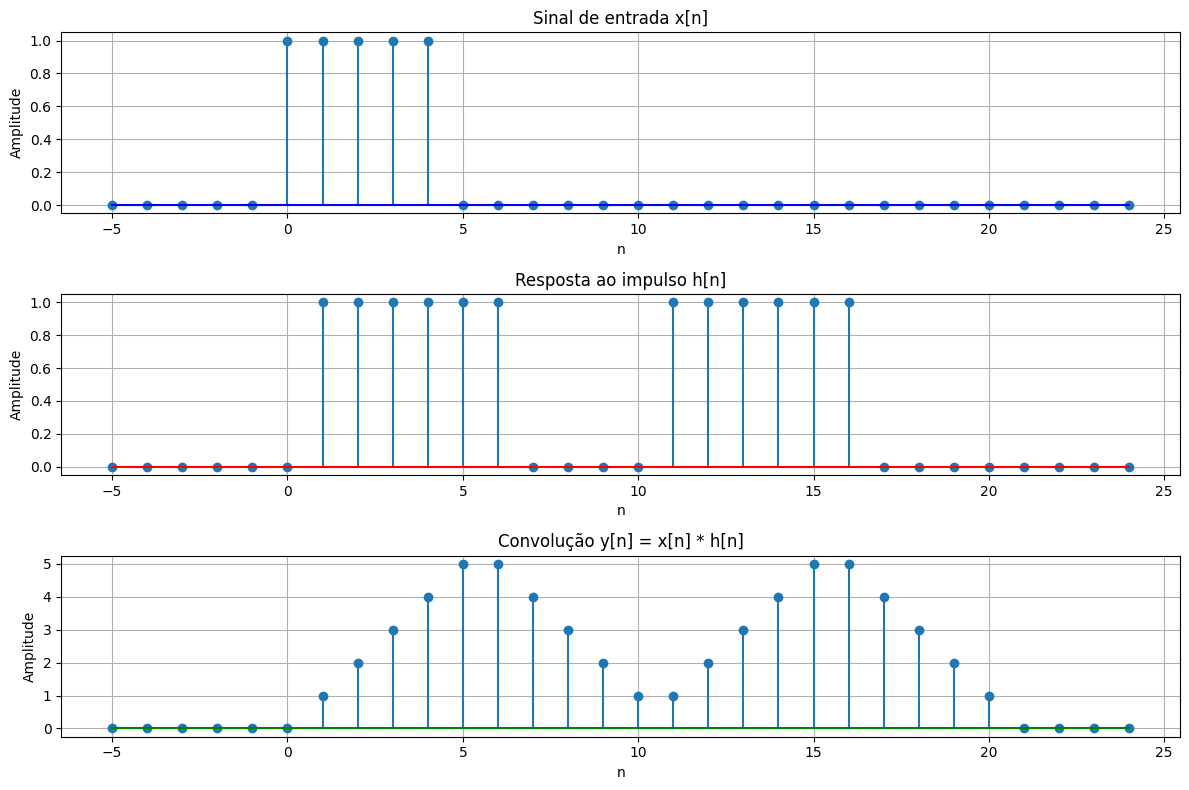

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Implementação em Python para verificar o resultado da convolução do item (d)
def x(n):
    return np.logical_and(n >= 0, n <= 4).astype(float)

def h(n):
    return np.logical_or(
        np.logical_and(n >= 1, n <= 6),
        np.logical_and(n >= 11, n <= 16)
    ).astype(float)

def convolve_signals(x_func, h_func, n_range):
    result = np.zeros_like(n_range, dtype=float)
    for n_idx, n_val in enumerate(n_range):
        sum_val = 0.0
        for k in range(-20, 21):  # Intervalo suficientemente grande
            k_array = np.array([k])
            n_minus_k = np.array([n_val - k])
            if (0 <= k <= 4) and ((1 <= n_val-k <= 6) or (11 <= n_val-k <= 16)):
                sum_val += float(x_func(k_array)[0] * h_func(n_minus_k)[0])
        result[n_idx] = sum_val
    return result

# Definir intervalo para visualização
n_range = np.arange(-5, 25)

# Calcular os sinais
x_values = x(n_range)
h_values = h(n_range)
y_values = convolve_signals(x, h, n_range)

# Plotar os sinais
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n_range, x_values, basefmt='b-')
plt.title('Sinal de entrada x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n_range, h_values, basefmt='r-')
plt.title('Resposta ao impulso h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n_range, y_values, basefmt='g-')
plt.title('Convolução y[n] = x[n] * h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

O gráfico mostra a convolução entre os sinais $x[n]$ e $h[n]$. Observa-se que o resultado é composto por dois trapézios, refletindo a convolução de $x[n]$ com cada um dos pulsos retangulares de $h[n]$.

# Exercício 2.22

## Fundamentos Teóricos

A resposta de um sistema linear invariante no tempo (LTI) a uma entrada $x(t)$ é dada pela integral de convolução:

$$y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau$$

Alternativamente, pode-se escrever:

$$y(t) = \int_{-\infty}^{\infty} x(t - \tau) h(\tau) d\tau$$

Para sinais causais (zero para $t < 0$), os limites de integração se reduzem a:

$$y(t) = \int_{0}^{t} x(\tau) h(t - \tau) d\tau$$

## (a) Convolução de Exponenciais

Dados os sinais:
- $x(t) = e^{-\alpha t}u(t)$
- $h(t) = e^{-\beta t}u(t)$

### Caso 1: $\alpha \neq \beta$

Usando a integral de convolução para sinais causais:

$$y(t) = \int_{0}^{t} x(\tau) h(t - \tau) d\tau = \int_{0}^{t} e^{-\alpha \tau}u(\tau) \cdot e^{-\beta (t - \tau)}u(t - \tau) d\tau$$

Como estamos integrando de 0 a $t$, temos $\tau \geq 0$ e $t - \tau \geq 0$, então $u(\tau) = u(t - \tau) = 1$ neste intervalo:

$$y(t) = \int_{0}^{t} e^{-\alpha \tau} \cdot e^{-\beta (t - \tau)} d\tau = e^{-\beta t} \int_{0}^{t} e^{(\beta-\alpha) \tau} d\tau$$

Para $\alpha \neq \beta$:

$$y(t) = e^{-\beta t} \left[ \frac{e^{(\beta-\alpha) \tau}}{\beta-\alpha} \right]_{0}^{t} = e^{-\beta t} \cdot \frac{e^{(\beta-\alpha) t} - 1}{\beta-\alpha}$$

Simplificando:

$$y(t) = \frac{e^{-\alpha t} - e^{-\beta t}}{\beta-\alpha} u(t)$$

### Caso 2: $\alpha = \beta$

Neste caso, a integral se torna:

$$y(t) = e^{-\alpha t} \int_{0}^{t} 1 d\tau = e^{-\alpha t} \cdot t$$

Portanto:

$$y(t) = t e^{-\alpha t} u(t)$$

Abaixo está um gráfico para visualizar as respostas para diferentes valores de $\alpha$ e $\beta$:

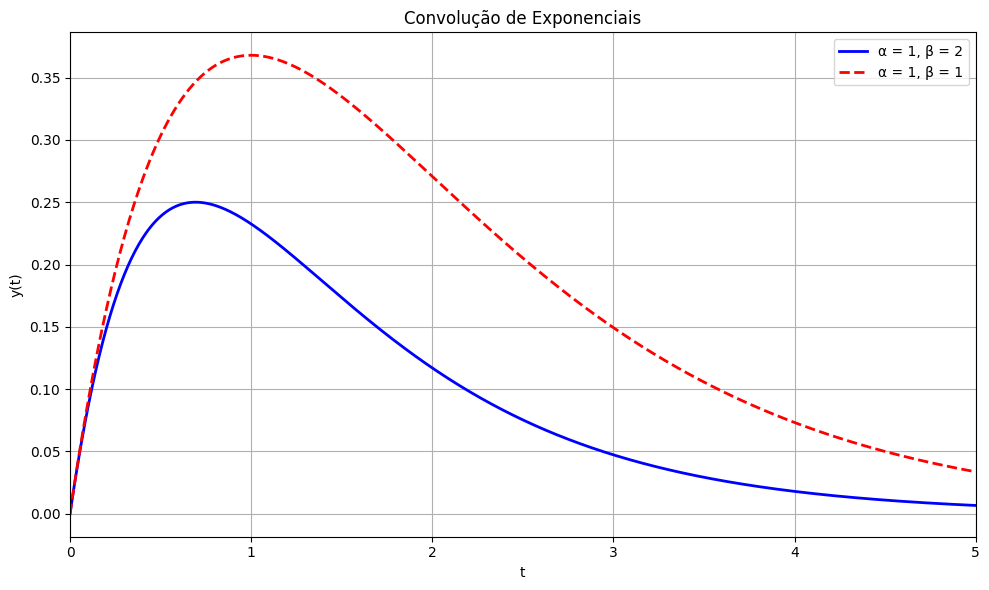

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def conv_exp(t, alpha, beta):
    if alpha == beta:
        return t * np.exp(-alpha * t)
    else:
        return (np.exp(-alpha * t) - np.exp(-beta * t)) / (beta - alpha)

# Parâmetros
t = np.linspace(0, 5, 1000)
alpha1, beta1 = 1, 2  # Caso α ≠ β
alpha2, beta2 = 1, 1  # Caso α = β

# Calcular respostas
y1 = np.zeros_like(t)
y2 = np.zeros_like(t)
mask = t >= 0  # Considerando apenas t ≥ 0
y1[mask] = conv_exp(t[mask], alpha1, beta1)
y2[mask] = conv_exp(t[mask], alpha2, beta2)

# Plotar
plt.figure(figsize=(10, 6))
plt.plot(t, y1, 'b-', linewidth=2, label=f'α = {alpha1}, β = {beta1}')
plt.plot(t, y2, 'r--', linewidth=2, label=f'α = {alpha2}, β = {beta2}')
plt.grid(True)
plt.title('Convolução de Exponenciais')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

## (b) Convolução com Função Escada

Dados os sinais:
- $x(t) = u(t) - 2u(t-2) + u(t-5)$
- $h(t) = e^{2t}u(1-t)$

Observe que $h(t)$ é não-causal e pode ser reescrito como:
$h(t) = e^{2t}u(1-t) = e^{2t}$ para $t \leq 1$ e $h(t) = 0$ para $t > 1$

Usando a definição da convolução:

$$y(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau$$

Substituindo $x(t)$:

$$y(t) = \int_{-\infty}^{\infty} [u(\tau) - 2u(\tau-2) + u(\tau-5)] \cdot h(t - \tau) d\tau$$

Pela linearidade da convolução:

$$y(t) = \int_{-\infty}^{\infty} u(\tau) \cdot h(t - \tau) d\tau - 2\int_{-\infty}^{\infty} u(\tau-2) \cdot h(t - \tau) d\tau + \int_{-\infty}^{\infty} u(\tau-5) \cdot h(t - \tau) d\tau$$

Façamos a mudança de variável $\tau' = \tau - a$ para cada integral com deslocamento $a$:

$$y(t) = \int_{-\infty}^{\infty} u(\tau) \cdot h(t - \tau) d\tau - 2\int_{-\infty}^{\infty} u(\tau') \cdot h(t - \tau' - 2) d\tau' + \int_{-\infty}^{\infty} u(\tau'') \cdot h(t - \tau'' - 5) d\tau''$$

Simplificando:

$$y(t) = u(t) * h(t) - 2 [u(t) * h(t-2)] + u(t) * h(t-5)$$

Para calcular $u(t) * h(t)$:

$$u(t) * h(t) = \int_{0}^{\infty} u(\tau) \cdot h(t - \tau) d\tau = \int_{0}^{\infty} h(t - \tau) d\tau$$

Como $h(t) = e^{2t}u(1-t)$, temos $h(t - \tau) = e^{2(t-\tau)}u(1-(t-\tau)) = e^{2(t-\tau)}u(1+\tau-t)$

A condição $1+\tau-t > 0$ implica $\tau > t-1$. Portanto:

$$u(t) * h(t) = \int_{\max(0, t-1)}^{\infty} e^{2(t-\tau)} d\tau$$

Isso resulta em dois casos:

1. Para $t \leq 1$:
   $$u(t) * h(t) = \int_{0}^{\infty} e^{2(t-\tau)} d\tau = e^{2t} \int_{0}^{\infty} e^{-2\tau} d\tau = e^{2t} \cdot \frac{1}{2} = \frac{e^{2t}}{2}$$

2. Para $t > 1$:
   $$u(t) * h(t) = \int_{t-1}^{\infty} e^{2(t-\tau)} d\tau = e^{2t} \int_{t-1}^{\infty} e^{-2\tau} d\tau = e^{2t} \cdot \frac{e^{-2(t-1)}}{2} = \frac{e^{2}}{2}$$

Portanto:
$$u(t) * h(t) = \begin{cases}
\frac{e^{2t}}{2}, & t \leq 1 \\
\frac{e^{2}}{2}, & t > 1
\end{cases}$$

Agora podemos calcular $y(t)$ completo:

$$y(t) = [u(t) * h(t)] - 2[u(t) * h(t-2)] + [u(t) * h(t-5)]$$

Onde:
- $u(t) * h(t-2) = [u(t) * h(t)]_{t \rightarrow t-2}$
- $u(t) * h(t-5) = [u(t) * h(t)]_{t \rightarrow t-5}$

O resultado final terá diferentes expressões para diferentes intervalos de $t$, dependendo dos pontos de transição em $t=1$, $t=3$ e $t=6$.

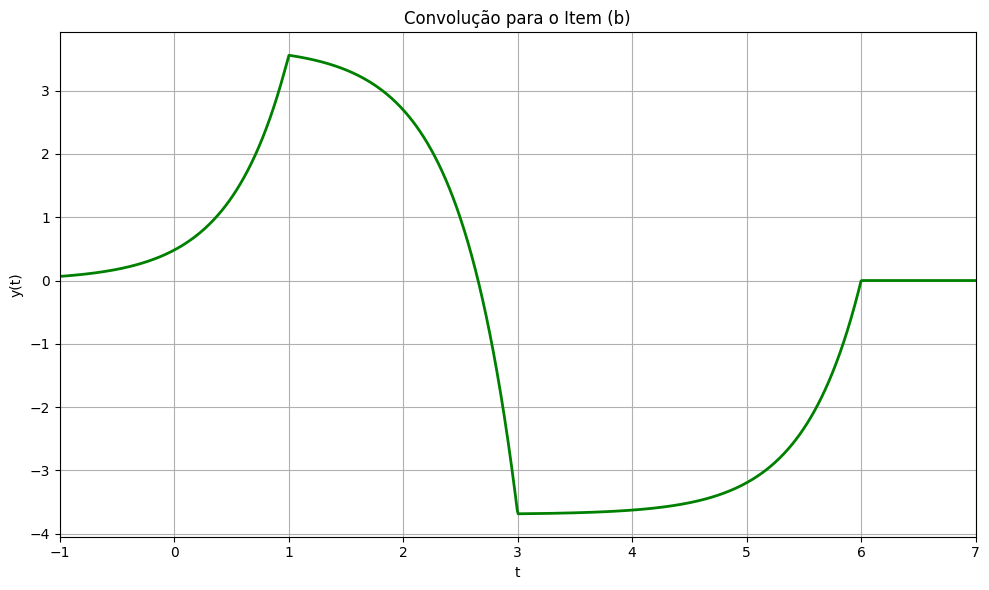

In [47]:
def convolve_b(t):
    result = np.zeros_like(t)
    
    # Função u(t) * h(t)
    def uh_conv(t):
        return np.where(t <= 1, np.exp(2*t)/2, np.exp(2)/2)
    
    # Calculando y(t) = [u(t) * h(t)] - 2[u(t) * h(t-2)] + [u(t) * h(t-5)]
    result = uh_conv(t) - 2*uh_conv(t-2) + uh_conv(t-5)
    
    return result

# Parâmetros
t = np.linspace(-1, 7, 1000)

# Calcular resposta
y_b = convolve_b(t)

# Plotar
plt.figure(figsize=(10, 6))
plt.plot(t, y_b, 'g-', linewidth=2)
plt.grid(True)
plt.title('Convolução para o Item (b)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.xlim(-1, 7)
plt.tight_layout()
plt.show()

## (c) Convolução para a Figura P2.22(a)

Da Figura P2.22(a):
- $x(t)$ é uma onda senoidal $\sin(\pi t)$ truncada para um período ($0 \leq t \leq 2$)
- $h(t)$ é um pulso retangular com amplitude 2 para $1 \leq t \leq 3$

Matematicamente:
$$x(t) = \sin(\pi t) [u(t) - u(t-2)]$$
$$h(t) = 2 [u(t-1) - u(t-3)]$$

Calculando a convolução:

$$y(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau$$

Substituindo:

$$y(t) = \int_{0}^{2} \sin(\pi \tau) \cdot 2 [u(t-\tau-1) - u(t-\tau-3)] d\tau$$

Para que o integrando seja não-nulo, precisamos que $t-\tau-1 \geq 0$ e $t-\tau-3 < 0$, ou seja, $t-3 < \tau \leq t-1$.

Isso resulta nos seguintes limites de integração:
$$y(t) = 2 \int_{\max(0, t-3)}^{\min(2, t-1)} \sin(\pi \tau) d\tau$$

Temos cinco casos:

1. Para $t < 1$: $y(t) = 0$ (pois o intervalo de integração está vazio)
2. Para $1 \leq t < 3$: $y(t) = 2 \int_{0}^{t-1} \sin(\pi \tau) d\tau$
3. Para $3 \leq t < 4$: $y(t) = 2 \int_{t-3}^{t-1} \sin(\pi \tau) d\tau$
4. Para $4 \leq t < 5$: $y(t) = 2 \int_{t-3}^{2} \sin(\pi \tau) d\tau$
5. Para $t \geq 5$: $y(t) = 0$ (pois o intervalo de integração está vazio)

Calculando as integrais:
$$\int \sin(\pi \tau) d\tau = -\frac{1}{\pi} \cos(\pi \tau) + C$$

Para $1 \leq t < 3$:
$$y(t) = 2 \left[ -\frac{1}{\pi} \cos(\pi \tau) \right]_{0}^{t-1} = \frac{2}{\pi} [1 - \cos(\pi(t-1))]$$

Para $3 \leq t < 4$:
$$y(t) = 2 \left[ -\frac{1}{\pi} \cos(\pi \tau) \right]_{t-3}^{t-1} = \frac{2}{\pi} [\cos(\pi(t-3)) - \cos(\pi(t-1))]$$

Para $4 \leq t < 5$:
$$y(t) = 2 \left[ -\frac{1}{\pi} \cos(\pi \tau) \right]_{t-3}^{2} = \frac{2}{\pi} [\cos(\pi(t-3)) - \cos(2\pi)]$$

Simplificando, obtemos:
$$y(t) = \begin{cases}
0, & t < 1 \\
\frac{2}{\pi} [1 - \cos(\pi(t-1))], & 1 \leq t < 3 \\
\frac{2}{\pi} [\cos(\pi(t-3)) - \cos(\pi(t-1))], & 3 \leq t < 4 \\
\frac{2}{\pi} [\cos(\pi(t-3)) + 1], & 4 \leq t < 5 \\
0, & t \geq 5
\end{cases}$$

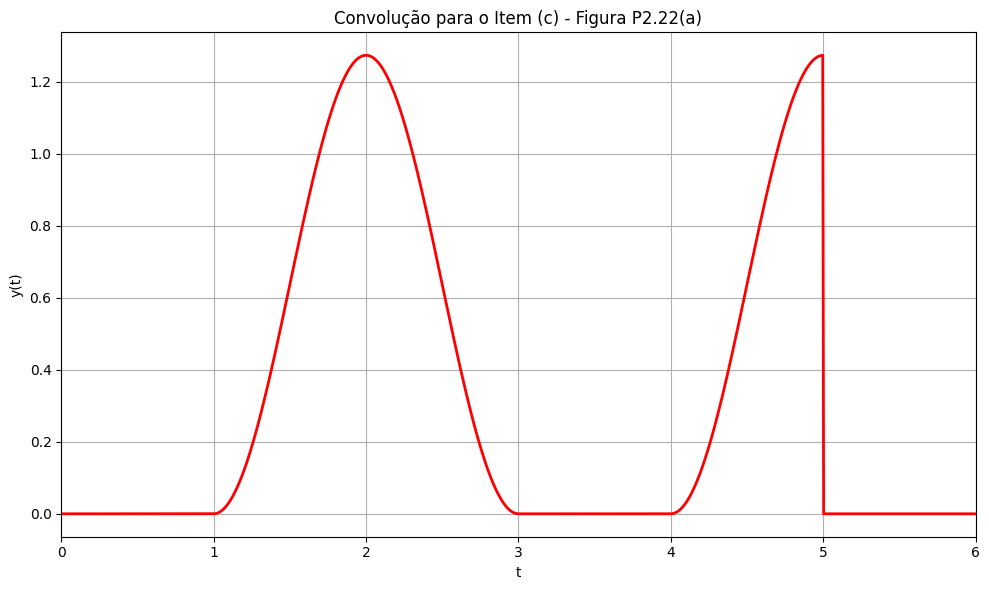

In [48]:
def convolve_c(t):
    result = np.zeros_like(t)
    
    # Caso 1: t < 1
    mask1 = t < 1
    result[mask1] = 0
    
    # Caso 2: 1 ≤ t < 3
    mask2 = (t >= 1) & (t < 3)
    result[mask2] = 2/np.pi * (1 - np.cos(np.pi*(t[mask2]-1)))
    
    # Caso 3: 3 ≤ t < 4
    mask3 = (t >= 3) & (t < 4)
    result[mask3] = 2/np.pi * (np.cos(np.pi*(t[mask3]-3)) - np.cos(np.pi*(t[mask3]-1)))
    
    # Caso 4: 4 ≤ t < 5
    mask4 = (t >= 4) & (t < 5)
    result[mask4] = 2/np.pi * (np.cos(np.pi*(t[mask4]-3)) + 1)
    
    # Caso 5: t ≥ 5
    mask5 = t >= 5
    result[mask5] = 0
    
    return result

# Parâmetros
t = np.linspace(0, 6, 1000)

# Calcular resposta
y_c = convolve_c(t)

# Plotar
plt.figure(figsize=(10, 6))
plt.plot(t, y_c, 'r-', linewidth=2)
plt.grid(True)
plt.title('Convolução para o Item (c) - Figura P2.22(a)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.xlim(0, 6)
plt.tight_layout()
plt.show()

## (d) Convolução para a Figura P2.22(b)

Da Figura P2.22(b):
- $x(t) = at + b$ é uma reta com inclinação $a$
- $h(t)$ é um pulso retangular com amplitude $\frac{4}{3}$ para $0 \leq t < 1$ seguido de um impulso negativo $-\frac{1}{3}$ em $t = 2$

Matematicamente:
$$x(t) = at + b$$
$$h(t) = \frac{4}{3} [u(t) - u(t-1)] - \frac{1}{3} \delta(t-2)$$

Calculando a convolução:

$$y(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau$$

Pela linearidade da convolução:

$$y(t) = \frac{4}{3} \int_{-\infty}^{\infty} (a\tau + b) [u(t-\tau) - u(t-\tau-1)] d\tau - \frac{1}{3} \int_{-\infty}^{\infty} (a\tau + b) \delta(t-\tau-2) d\tau$$

Para o primeiro termo, o integrando é não-nulo quando $t-\tau \geq 0$ e $t-\tau-1 < 0$, ou seja, $t-1 < \tau \leq t$:

$$y_1(t) = \frac{4}{3} \int_{t-1}^{t} (a\tau + b) d\tau$$

$$y_1(t) = \frac{4}{3} \left[ \frac{a\tau^2}{2} + b\tau \right]_{t-1}^{t} = \frac{4}{3} \left[ \frac{a(t^2 - (t-1)^2)}{2} + b(t - (t-1)) \right]$$

$$y_1(t) = \frac{4}{3} \left[ \frac{a(2t-1)}{2} + b \right] = \frac{4}{3} \left[ at - \frac{a}{2} + b \right]$$

Para o segundo termo, aplicamos a propriedade da função delta:

$$y_2(t) = -\frac{1}{3} (a(t-2) + b)$$

Combinando:

$$y(t) = y_1(t) + y_2(t) = \frac{4}{3} \left[ at - \frac{a}{2} + b \right] - \frac{1}{3} [a(t-2) + b]$$

$$y(t) = \frac{4a t - 2a + 4b - at + 2a - b}{3} = \frac{3at - 0a + 3b}{3} = at + b$$

Interessantemente, para esta entrada linear e este $h(t)$ específico, a saída é idêntica à entrada! Este é um caso especial onde o sistema preserva a função linear.

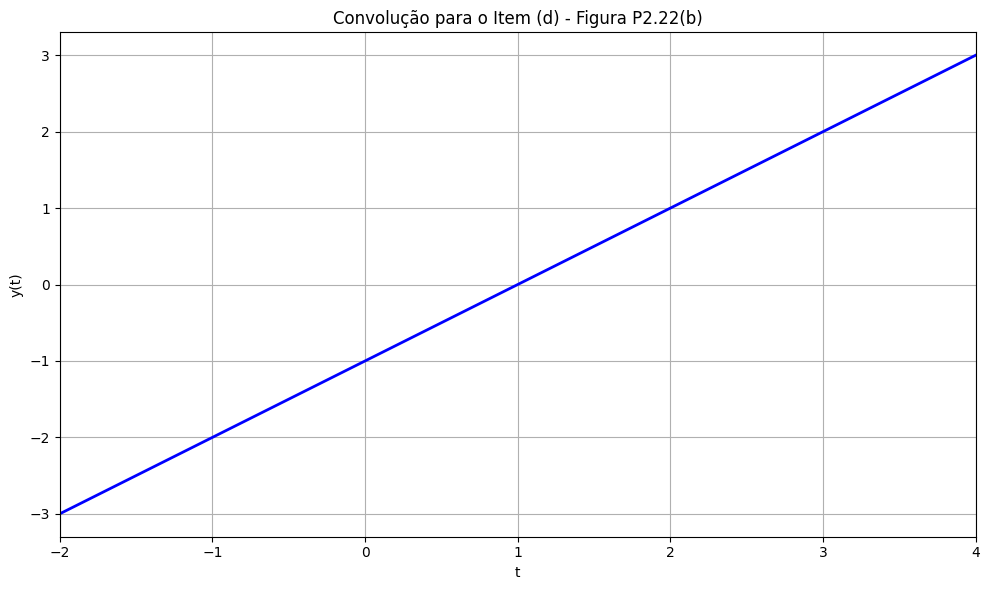

In [49]:
def convolve_d(t, a=1, b=0):
    # Para o caso específico deste problema, a resposta é idêntica à entrada
    return a*t + b

# Parâmetros
t = np.linspace(-2, 4, 1000)
a, b = 1, -1  # Valores arbitrários para a e b

# Calcular resposta
y_d = convolve_d(t, a, b)

# Plotar
plt.figure(figsize=(10, 6))
plt.plot(t, y_d, 'b-', linewidth=2)
plt.grid(True)
plt.title('Convolução para o Item (d) - Figura P2.22(b)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.xlim(-2, 4)
plt.tight_layout()
plt.show()

## (e) Convolução para a Figura P2.22(c)

Da Figura P2.22(c):
- $x(t)$ é uma sequência de pulsos retangulares de amplitude ±1
- $h(t)$ é uma rampa linear decrescente de 1 a 0 para $-1 \leq t \leq 0$

Matematicamente, podemos escrever:
$$x(t) = \sum_{k=-3, k \neq 0}^{3} (-1)^{k+1} [u(t-(k-0.5)) - u(t-(k+0.5))]$$

$$h(t) = (1-|t|)[u(t+1) - u(t)]$$

A convolução para este caso é complexa devido à natureza do sinal $x(t)$ com múltiplos pulsos. Calculando pela integral de convolução:

$$y(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau$$

Esta integral pode ser decomposta em várias partes, uma para cada pulso de $x(t)$. Para cada pulso, a convolução com $h(t)$ resultará em uma forma de onda triangular/trapezoidal.

Para simplificar, podemos usar a propriedade de linearidade:

$$x(t) * h(t) = \sum_{k=-3, k \neq 0}^{3} (-1)^{k+1} [u(t-(k-0.5)) - u(t-(k+0.5))] * h(t)$$

O resultado será a soma das convoluções individuais, cada uma com forma triangular/trapezoidal, alternando em sinal.

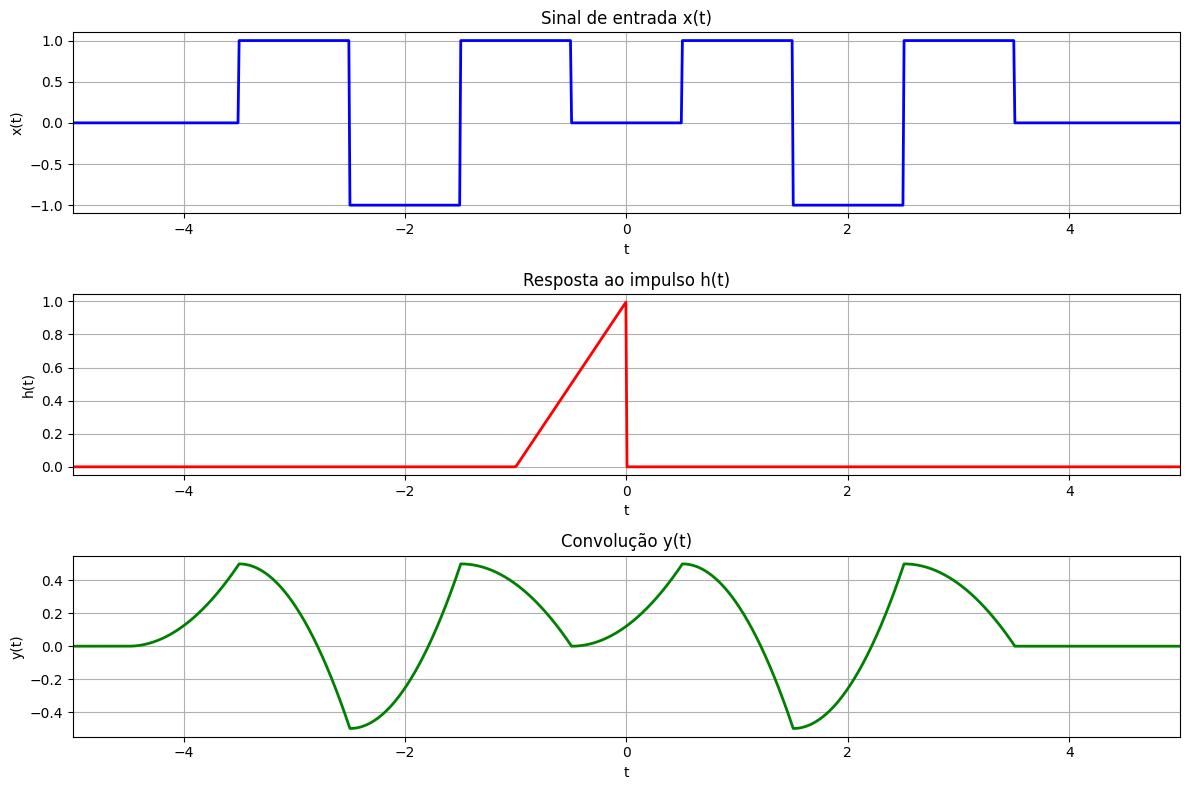

In [50]:
def pulse(t, center, width=1):
    """Cria um pulso retangular centrado em 'center' com largura 'width'"""
    return np.logical_and(t >= center-width/2, t < center+width/2).astype(float)

def convolve_e(t):
    # Defina x(t) como uma soma de pulsos
    x_t = np.zeros_like(t)
    for k in range(-3, 4):
        if k != 0:
            x_t += (-1)**(k+1) * pulse(t, k, 1)
    
    # Defina h(t) como uma rampa
    h_t = np.zeros_like(t)
    mask_h = np.logical_and(t >= -1, t <= 0)
    h_t[mask_h] = 1 + t[mask_h]  # Rampa de 1 a 0
    
    # Calcular a convolução (usando FFT para simplificar)
    dt = t[1] - t[0]
    y_t = np.convolve(x_t, h_t, 'same') * dt
    
    return y_t

# Parâmetros
t = np.linspace(-5, 5, 1000)

# Calcular x(t), h(t) e y(t)
x_e = np.zeros_like(t)
for k in range(-3, 4):
    if k != 0:
        x_e += (-1)**(k+1) * pulse(t, k, 1)

h_e = np.zeros_like(t)
mask_h = np.logical_and(t >= -1, t <= 0)
h_e[mask_h] = 1 + t[mask_h]

y_e = convolve_e(t)

# Plotar
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x_e, 'b-', linewidth=2)
plt.grid(True)
plt.title('Sinal de entrada x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim(-5, 5)

plt.subplot(3, 1, 2)
plt.plot(t, h_e, 'r-', linewidth=2)
plt.grid(True)
plt.title('Resposta ao impulso h(t)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.xlim(-5, 5)

plt.subplot(3, 1, 3)
plt.plot(t, y_e, 'g-', linewidth=2)
plt.grid(True)
plt.title('Convolução y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.xlim(-5, 5)

plt.tight_layout()
plt.show()

# Exercício 2.23 - Convolução de Pulso Triangular com Trem de Impulsos

## Definição do Problema

Considera-se o problema da convolução de um pulso triangular $h(t)$ com um trem de impulsos $x(t)$.

Dados:
- $h(t)$ é o pulso triangular mostrado na Figura P2.23(a):
  $$h(t) = \begin{cases}
  1-|t|, & |t| \leq 1 \\
  0, & |t| > 1
  \end{cases}$$

- $x(t)$ é o trem de impulsos mostrado na Figura P2.23(b):
  $$x(t) = \sum_{k=-\infty}^{+\infty} \delta(t-kT)$$

Objetivo: Determinar e esboçar $y(t) = x(t) * h(t)$ para os seguintes valores de $T$:
  (a) $T = 4$
  (b) $T = 2$
  (c) $T = 3/2$
  (d) $T = 1$

## Fundamentos Teóricos

Pela propriedade da convolução com um impulso:

$$\delta(t-t_0) * h(t) = h(t-t_0)$$

Aplicando esta propriedade ao trem de impulsos:

$$x(t) * h(t) = \sum_{k=-\infty}^{+\infty} \delta(t-kT) * h(t) = \sum_{k=-\infty}^{+\infty} h(t-kT)$$

Assim, a resposta $y(t)$ será uma soma de versões deslocadas do pulso triangular $h(t)$, com deslocamentos múltiplos do período $T$.

## Análise por Valor de $T$

(a) $T = 4$

Para $T = 4$, os pulsos triangulares consecutivos ficam separados por 4 unidades de tempo.

Como a base do pulso triangular é 2 (de $t=-1$ a $t=1$), e o deslocamento entre impulsos é $T = 4$, os pulsos triangulares na saída não se sobrepõem.

Matematicamente:
$$y(t) = \sum_{k=-\infty}^{+\infty} h(t-4k) = \sum_{k=-\infty}^{+\infty} \begin{cases}
1-|t-4k|, & |t-4k| \leq 1 \\
0, & |t-4k| > 1
\end{cases}$$

Visualmente, a saída consistirá em uma sequência de pulsos triangulares idênticos, cada um centrado em $t = 4k$ para todos os inteiros $k$.

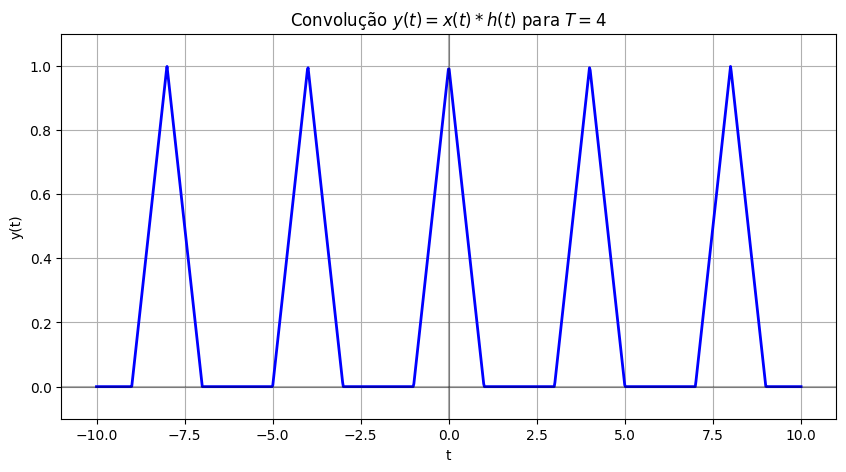

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_pulse(t):
    """Função do pulso triangular h(t)"""
    return np.where(np.abs(t) <= 1, 1 - np.abs(t), 0)

def train_of_triangles(t, T):
    """Calcula a soma de pulsos triangulares deslocados"""
    y = np.zeros_like(t)
    k_range = np.arange(-10, 11)  # Intervalo suficiente para visualização
    
    for k in k_range:
        y += triangle_pulse(t - k*T)
    
    return y

# Parâmetros para T = 4
t = np.linspace(-10, 10, 1000)
T = 4
y_a = train_of_triangles(t, T)

# Plotar resultado
plt.figure(figsize=(10, 5))
plt.plot(t, y_a, 'b-', linewidth=2)
plt.grid(True)
plt.title(f'Convolução $y(t) = x(t) * h(t)$ para $T = {T}$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-0.1, 1.1)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

(b) $T = 2$

Para $T = 2$, os pulsos triangulares consecutivos ficam separados por 2 unidades de tempo.

Como a largura da base do pulso triangular é 2, os pulsos adjacentes se tocam exatamente nos pontos $t = 2k + 1$ para inteiros $k$, mas não se sobrepõem.

Matematicamente:
$$y(t) = \sum_{k=-\infty}^{+\infty} h(t-2k) = \sum_{k=-\infty}^{+\infty} \begin{cases}
1-|t-2k|, & |t-2k| \leq 1 \\
0, & |t-2k| > 1
\end{cases}$$


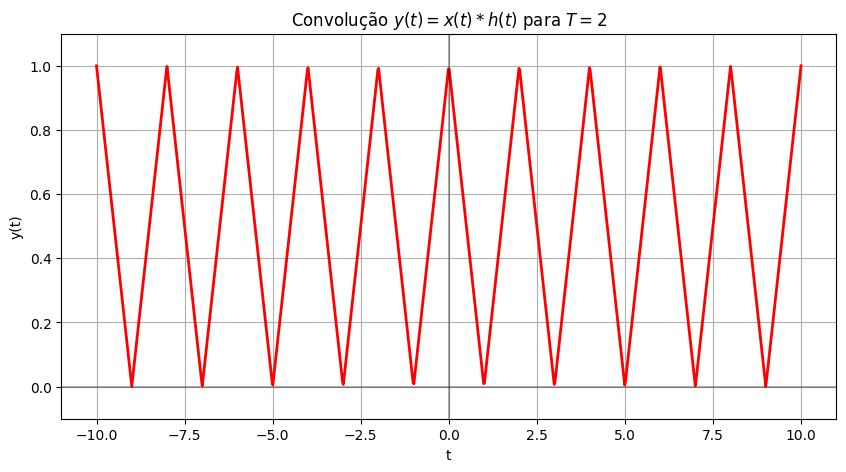

In [52]:
# Parâmetros para T = 2
T = 2
y_b = train_of_triangles(t, T)

# Plotar resultado
plt.figure(figsize=(10, 5))
plt.plot(t, y_b, 'r-', linewidth=2)
plt.grid(True)
plt.title(f'Convolução $y(t) = x(t) * h(t)$ para $T = {T}$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-0.1, 1.1)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

(c) $T = 3/2$

Para $T = 3/2$, os pulsos triangulares consecutivos se sobrepõem parcialmente.

Cada pulso triangular tem base de largura 2, e os centros dos pulsos estão separados por $T = 3/2$ unidades. Como $3/2 < 2$, haverá sobreposição.

A sobreposição ocorre nas regiões $[kT-1, kT-1+T/2]$ e $[kT+1-T/2, kT+1]$ ao redor de cada centro $kT$.

Matematicamente:
$$y(t) = \sum_{k=-\infty}^{+\infty} h(t-\frac{3}{2}k) = \sum_{k=-\infty}^{+\infty} \begin{cases}
1-|t-\frac{3}{2}k|, & |t-\frac{3}{2}k| \leq 1 \\
0, & |t-\frac{3}{2}k| > 1
\end{cases}$$

Nas regiões de sobreposição, os valores dos pulsos triangulares se somam, resultando em alturas variadas.

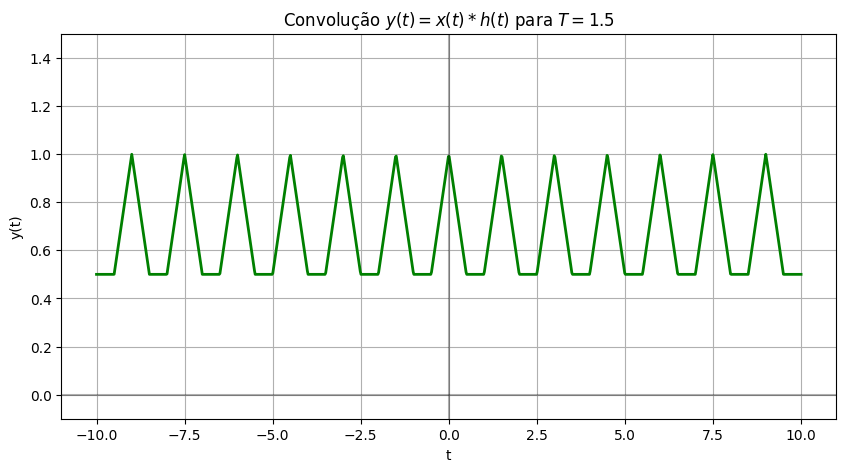

In [53]:
# Parâmetros para T = 3/2
T = 3/2
y_c = train_of_triangles(t, T)

# Plotar resultado
plt.figure(figsize=(10, 5))
plt.plot(t, y_c, 'g-', linewidth=2)
plt.grid(True)
plt.title(f'Convolução $y(t) = x(t) * h(t)$ para $T = {T}$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-0.1, 1.5)  # Ajuste para acomodar as sobreposições
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

(d) $T = 1$

Para $T = 1$, os pulsos triangulares ficam sobrepostos significativamente.

Como a largura da base do pulso triangular é 2 e o espaçamento entre centros é $T = 1$, cada ponto no domínio do tempo terá contribuições de pelo menos dois pulsos triangulares.

Matematicamente:
$$y(t) = \sum_{k=-\infty}^{+\infty} h(t-k) = \sum_{k=-\infty}^{+\infty} \begin{cases}
1-|t-k|, & |t-k| \leq 1 \\
0, & |t-k| > 1
\end{cases}$$

Para resolver este caso, precisamos determinar explicitamente a soma em cada região. Para $0 \leq t < 1$, as contribuições vêm dos pulsos centrados em $t = 0$ e $t = 1$, resultando em:
$$y(t) = (1-t) + (1-(1-t)) = 1$$

Este padrão se repete periodicamente, resultando em uma função constante $y(t) = 1$ para todo $t$.


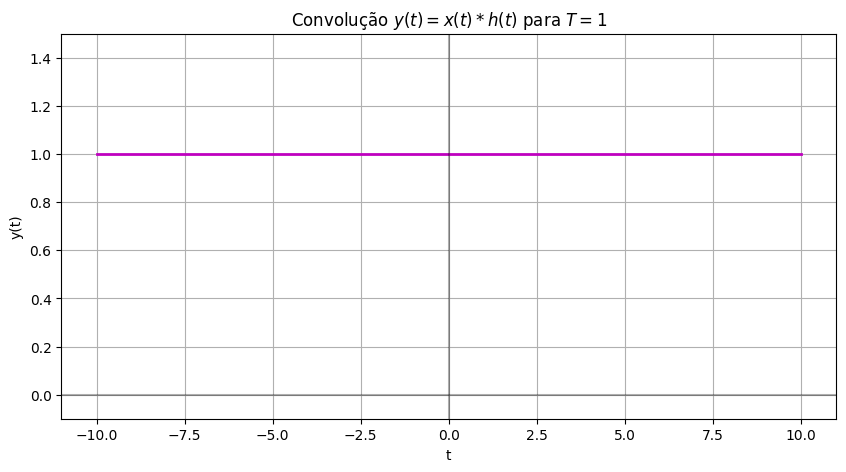

In [54]:
# Parâmetros para T = 1
T = 1
y_d = train_of_triangles(t, T)

# Plotar resultado
plt.figure(figsize=(10, 5))
plt.plot(t, y_d, 'm-', linewidth=2)
plt.grid(True)
plt.title(f'Convolução $y(t) = x(t) * h(t)$ para $T = {T}$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-0.1, 1.5)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

## Verificação Analítica para $T = 1$

Para $T = 1$, vamos verificar analiticamente que $y(t) = 1$ para todo $t$.

Para qualquer $t$, definimos $n$ como o maior inteiro menor ou igual a $t$ (função "floor"), e $f = t - n$ como a parte fracionária de $t$, de modo que $0 \leq f < 1$.

Então, $t$ está no intervalo $[n, n+1)$, e as contribuições significativas para $y(t)$ vêm dos pulsos triangulares centrados em $n$ e $n+1$ (também possivelmente $n-1$ ou $n+2$, dependendo do valor de $f$).

Calculando:
- Do pulso centrado em $n$: $h(t-n) = h(f) = 1-f$
- Do pulso centrado em $n+1$: $h(t-(n+1)) = h(f-1) = h(-(1-f)) = 1-(1-f) = f$

Somando: $y(t) = (1-f) + f = 1$

Portanto, $y(t) = 1$ para todo $t$ real, confirmando nossa observação gráfica.

## Comparação de Todos os Casos

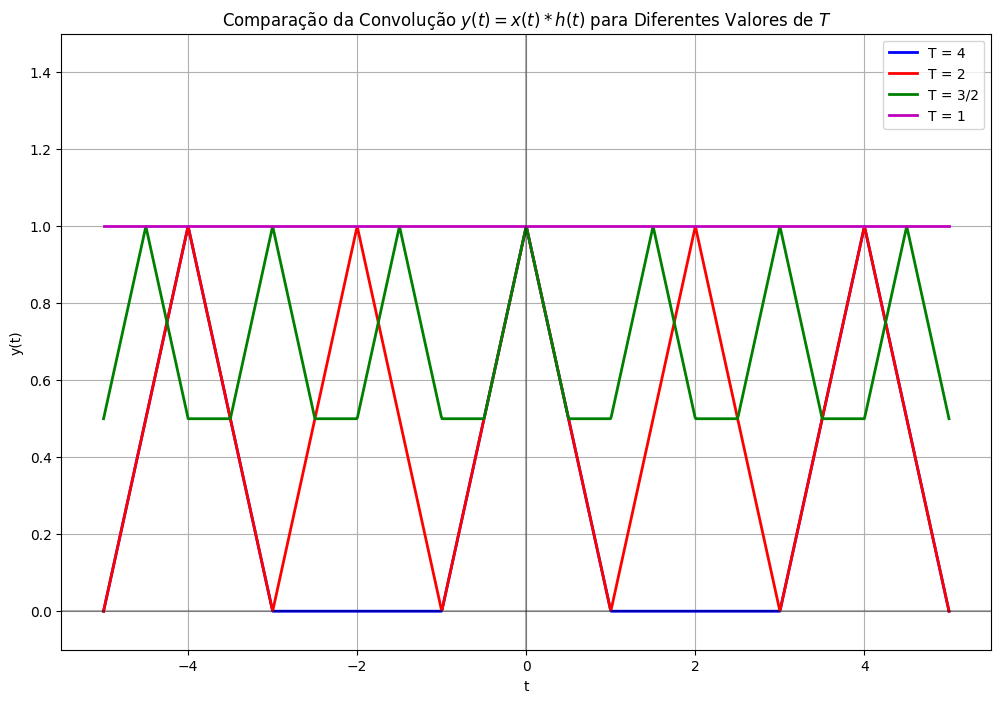

In [55]:
# Plotar todos os casos juntos
plt.figure(figsize=(12, 8))

# Definir intervalo mais adequado para visualização comparativa
t_comp = np.linspace(-5, 5, 1000)

# Calcular os resultados para cada T
y_a_comp = train_of_triangles(t_comp, 4)
y_b_comp = train_of_triangles(t_comp, 2)
y_c_comp = train_of_triangles(t_comp, 1.5)
y_d_comp = train_of_triangles(t_comp, 1)

# Plotar resultados
plt.plot(t_comp, y_a_comp, 'b-', linewidth=2, label='T = 4')
plt.plot(t_comp, y_b_comp, 'r-', linewidth=2, label='T = 2')
plt.plot(t_comp, y_c_comp, 'g-', linewidth=2, label='T = 3/2')
plt.plot(t_comp, y_d_comp, 'm-', linewidth=2, label='T = 1')

plt.grid(True)
plt.title('Comparação da Convolução $y(t) = x(t) * h(t)$ para Diferentes Valores de $T$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.ylim(-0.1, 1.5)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

# Exercício 2.24

## Fundamentos Teóricos

A resposta de um sistema linear invariante no tempo (LIT) a uma entrada $x(t)$ é dada pela integral de convolução:

$$y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau$$

Alternativamente, pode-se escrever:

$$y(t) = \int_{-\infty}^{\infty} x(t - \tau) h(\tau) d\tau$$

Para sinais causais (zero para $t < 0$), os limites de integração se reduzem a:

$$y(t) = \int_{0}^{t} x(\tau) h(t - \tau) d\tau$$

## Problema

No exercício 2.24, é necessário determinar a resposta de um sistema LTI com resposta ao impulso $h(t)$ para entrada $x(t)$, em que ambos os sinais são dados por:

$$h(t) = e^{-at}u(t)$$
$$x(t) = \cos(\omega_0 t)u(t)$$

Onde $a > 0$ e $\omega_0$ é constante.

## Solução

Utilizando a integral de convolução para sinais causais:

$$y(t) = \int_{0}^{t} x(\tau) h(t - \tau) d\tau = \int_{0}^{t} \cos(\omega_0 \tau)u(\tau) \cdot e^{-a(t-\tau)}u(t-\tau) d\tau$$

Como estamos integrando de 0 a $t$, temos $\tau \geq 0$ e $t - \tau \geq 0$, então $u(\tau) = u(t - \tau) = 1$ neste intervalo:

$$y(t) = \int_{0}^{t} \cos(\omega_0 \tau) \cdot e^{-a(t-\tau)} d\tau = e^{-at} \int_{0}^{t} \cos(\omega_0 \tau) \cdot e^{a\tau} d\tau$$

Para calcular esta integral, usaremos a identidade:

$$\cos(\omega_0 \tau) = \frac{e^{j\omega_0 \tau} + e^{-j\omega_0 \tau}}{2}$$

Substituindo:

$$y(t) = e^{-at} \int_{0}^{t} \frac{e^{j\omega_0 \tau} + e^{-j\omega_0 \tau}}{2} \cdot e^{a\tau} d\tau = \frac{e^{-at}}{2} \int_{0}^{t} [e^{(a+j\omega_0)\tau} + e^{(a-j\omega_0)\tau}] d\tau$$

Calculando a integral:

$$y(t) = \frac{e^{-at}}{2} \left[ \frac{e^{(a+j\omega_0)\tau}}{a+j\omega_0} + \frac{e^{(a-j\omega_0)\tau}}{a-j\omega_0} \right]_{0}^{t}$$

$$y(t) = \frac{e^{-at}}{2} \left[ \frac{e^{(a+j\omega_0)t}}{a+j\omega_0} + \frac{e^{(a-j\omega_0)t}}{a-j\omega_0} - \frac{1}{a+j\omega_0} - \frac{1}{a-j\omega_0} \right]$$

Simplificando:

$$y(t) = \frac{e^{-at}}{2} \left[ \frac{e^{(a+j\omega_0)t}(a-j\omega_0) + e^{(a-j\omega_0)t}(a+j\omega_0) - (a-j\omega_0) - (a+j\omega_0)}{(a+j\omega_0)(a-j\omega_0)} \right]$$

O denominador é $(a+j\omega_0)(a-j\omega_0) = a^2 + \omega_0^2$.

Para o numerador, vamos trabalhar com cada termo:

$$e^{-at} \cdot e^{(a+j\omega_0)t}(a-j\omega_0) = e^{j\omega_0 t}(a-j\omega_0)$$
$$e^{-at} \cdot e^{(a-j\omega_0)t}(a+j\omega_0) = e^{-j\omega_0 t}(a+j\omega_0)$$

Combinando:

$$y(t) = \frac{1}{2(a^2 + \omega_0^2)} \left[ e^{j\omega_0 t}(a-j\omega_0) + e^{-j\omega_0 t}(a+j\omega_0) - e^{-at}(a-j\omega_0 + a+j\omega_0) \right]$$

$$y(t) = \frac{1}{2(a^2 + \omega_0^2)} \left[ a(e^{j\omega_0 t} + e^{-j\omega_0 t}) - j\omega_0(e^{j\omega_0 t} - e^{-j\omega_0 t}) - 2ae^{-at} \right]$$

Usando as identidades:
- $\cos(\omega_0 t) = \frac{e^{j\omega_0 t} + e^{-j\omega_0 t}}{2}$
- $\sin(\omega_0 t) = \frac{e^{j\omega_0 t} - e^{-j\omega_0 t}}{2j}$

Obtemos:

$$y(t) = \frac{1}{a^2 + \omega_0^2} \left[ a \cdot \cos(\omega_0 t) + \omega_0 \cdot \sin(\omega_0 t) - ae^{-at} \right]$$

Esta é a resposta do sistema para $t \geq 0$. Como $h(t)$ e $x(t)$ são sinais causais, $y(t) = 0$ para $t < 0$.

Podemos também escrever esta resposta em uma forma compacta usando identidades trigonométricas. Observe que:

$$a \cdot \cos(\omega_0 t) + \omega_0 \cdot \sin(\omega_0 t) = \sqrt{a^2 + \omega_0^2} \cdot \cos(\omega_0 t - \phi)$$

onde $\phi = \arctan(\frac{\omega_0}{a})$. Assim:

$$y(t) = \frac{\sqrt{a^2 + \omega_0^2}}{a^2 + \omega_0^2} \cdot \cos(\omega_0 t - \phi) - \frac{a}{a^2 + \omega_0^2} \cdot e^{-at}$$

$$y(t) = \frac{1}{\sqrt{a^2 + \omega_0^2}} \cdot \cos(\omega_0 t - \phi) - \frac{a}{a^2 + \omega_0^2} \cdot e^{-at}$$

Esta expressão é válida para $t \geq 0$ e $y(t) = 0$ para $t < 0$.

## Interpretação Física

A resposta $y(t)$ consiste em dois termos:

1. **Termo da resposta em regime permanente**: $\frac{1}{\sqrt{a^2 + \omega_0^2}} \cdot \cos(\omega_0 t - \phi)$
   - Este termo representa a resposta oscilatória persistente 
   - A amplitude é menor que a amplitude da entrada (que é 1)
   - Há um deslocamento de fase $\phi = \arctan(\frac{\omega_0}{a})$

2. **Termo transitório**: $-\frac{a}{a^2 + \omega_0^2} \cdot e^{-at}$
   - Este termo decai exponencialmente com o tempo
   - Para $t$ grande, este termo tende a zero, deixando apenas a resposta em regime permanente

Este é um comportamento típico de sistemas LIT de primeira ordem quando excitados por sinais senoidais. Inicialmente, há um transiente que decai exponencialmente, e eventualmente o sistema entra em regime permanente com uma resposta oscilatória na mesma frequência da entrada, mas com amplitude e fase modificadas.

## Visualização da Resposta

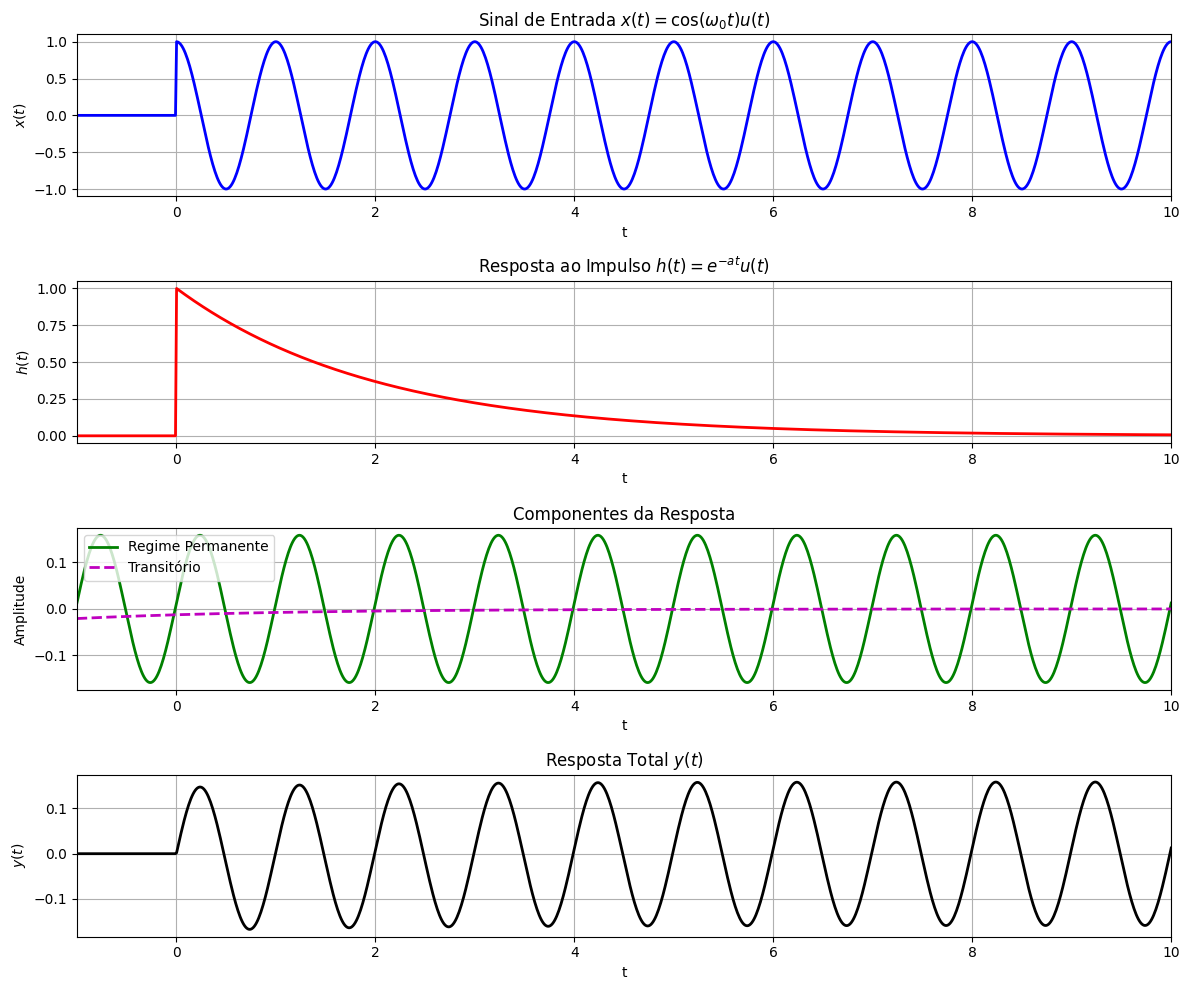

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def compute_response(t, a, omega_0):
    # Calcular a resposta do sistema
    phi = np.arctan2(omega_0, a)
    
    # Termo em regime permanente
    y_steady = (1/np.sqrt(a**2 + omega_0**2)) * np.cos(omega_0*t - phi)
    
    # Termo transitório
    y_transient = -(a/(a**2 + omega_0**2)) * np.exp(-a*t)
    
    # Resposta total
    y_total = y_steady + y_transient
    
    # Garantir que a resposta é zero para t < 0
    y_total = y_total * (t >= 0)
    
    return y_steady, y_transient, y_total

# Parâmetros
a = 0.5  # Taxa de decaimento da resposta ao impulso
omega_0 = 2*np.pi  # Frequência da entrada cossenoidal (2π rad/s = 1 Hz)
t = np.linspace(-1, 10, 1000)  # Vetor de tempo

# Calcular a resposta
y_steady, y_transient, y_total = compute_response(t, a, omega_0)

# Calcular os sinais de entrada e a resposta ao impulso para referência
x_t = np.cos(omega_0 * t) * (t >= 0)  # Entrada x(t)
h_t = np.exp(-a * t) * (t >= 0)  # Resposta ao impulso h(t)

# Plotar os resultados
plt.figure(figsize=(12, 10))

# Sinal de entrada
plt.subplot(4, 1, 1)
plt.plot(t, x_t, 'b-', linewidth=2)
plt.grid(True)
plt.title(r'Sinal de Entrada $x(t) = \cos(\omega_0 t)u(t)$')
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.xlim(-1, 10)

# Resposta ao impulso
plt.subplot(4, 1, 2)
plt.plot(t, h_t, 'r-', linewidth=2)
plt.grid(True)
plt.title(r'Resposta ao Impulso $h(t) = e^{-at}u(t)$')
plt.xlabel('t')
plt.ylabel(r'$h(t)$')
plt.xlim(-1, 10)

# Componentes da resposta
plt.subplot(4, 1, 3)
plt.plot(t, y_steady, 'g-', linewidth=2, label='Regime Permanente')
plt.plot(t, y_transient, 'm--', linewidth=2, label='Transitório')
plt.grid(True)
plt.title('Componentes da Resposta')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(-1, 10)

# Resposta total
plt.subplot(4, 1, 4)
plt.plot(t, y_total, 'k-', linewidth=2)
plt.grid(True)
plt.title(r'Resposta Total $y(t)$')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.xlim(-1, 10)

plt.tight_layout()
plt.show()

## Análise Paramétrica

Vamos examinar como a resposta do sistema varia com diferentes valores de $a$ e $\omega_0$.

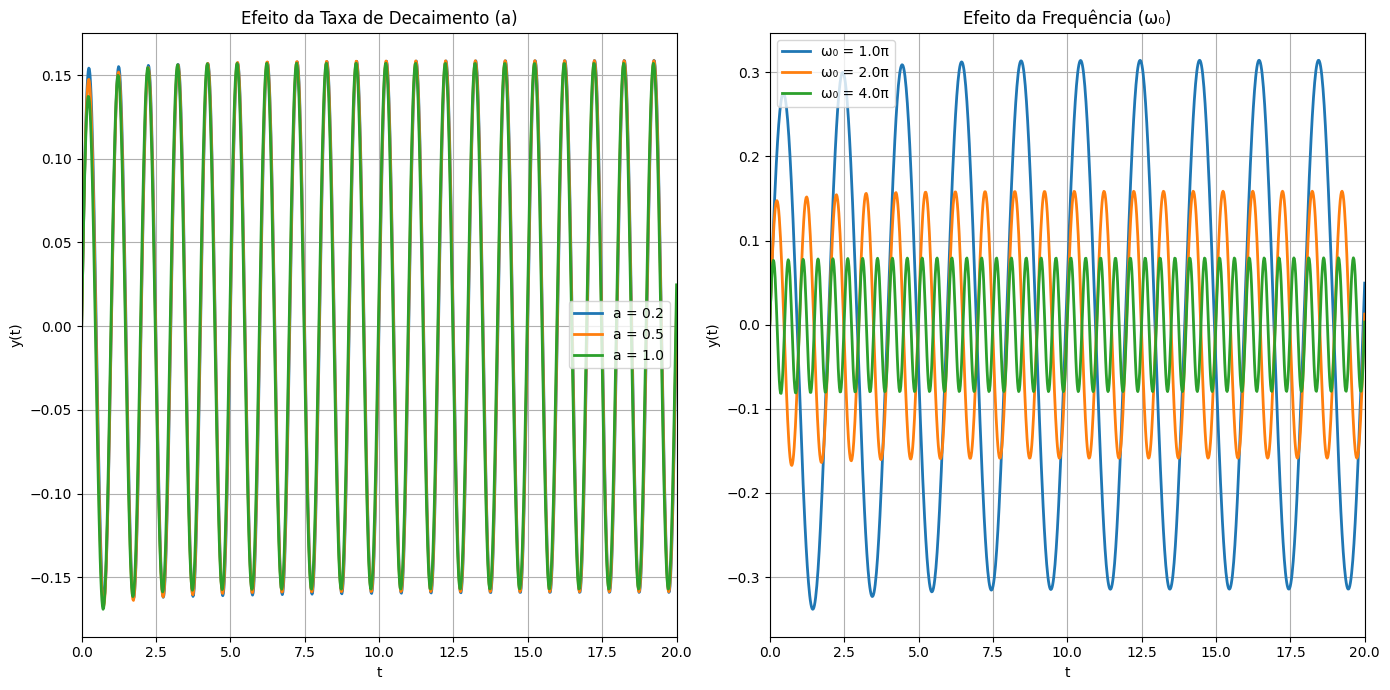

In [58]:
def plot_parametric_analysis():
    # Vetor de tempo
    t = np.linspace(0, 20, 1000)
    
    # Diferentes valores de a (taxa de decaimento)
    a_values = [0.2, 0.5, 1.0]
    
    # Frequência fixa
    omega_0 = 2*np.pi
    
    plt.figure(figsize=(14, 7))
    
    # Variação de a
    plt.subplot(1, 2, 1)
    for a in a_values:
        _, _, y = compute_response(t, a, omega_0)
        plt.plot(t, y, linewidth=2, label=f'a = {a}')
    
    plt.grid(True)
    plt.title('Efeito da Taxa de Decaimento (a)')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.xlim(0, 20)
    
    # Diferentes valores de omega_0 (frequência)
    omega_values = [np.pi, 2*np.pi, 4*np.pi]
    
    # Taxa de decaimento fixa
    a = 0.5
    
    # Variação de omega_0
    plt.subplot(1, 2, 2)
    for omega in omega_values:
        _, _, y = compute_response(t, a, omega)
        plt.plot(t, y, linewidth=2, label=f'ω₀ = {omega/np.pi}π')
    
    plt.grid(True)
    plt.title('Efeito da Frequência (ω₀)')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.xlim(0, 20)
    
    plt.tight_layout()
    plt.show()

plot_parametric_analysis()

# Exercício 2.25

## Fundamentos Teóricos

A resposta de um sistema linear invariante no tempo (LTI) a uma entrada $x[n]$ em tempo discreto é dada pela soma de convolução:

$$y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k] h[n - k]$$

Alternativamente, pode-se escrever:

$$y[n] = \sum_{k=-\infty}^{\infty} x[n - k] h[k]$$

## Problema

No exercício 2.25, determina-se a resposta de um sistema LTI com os seguintes sinais:

$$y[n] = x[n] * h[n]$$

em que:

$$x[n] = 3^n u[-n-1] + \left(\frac{1}{3}\right)^n u[n]$$

e:

$$h[n] = \left(\frac{1}{4}\right)^n u[n+3]$$

O exercício solicita:
(a) Determinar $y[n]$ sem usar a propriedade distributiva da convolução.
(b) Determinar $y[n]$ usando a propriedade distributiva da convolução.

(a) Solução Direta por Convolução

Neste item, calcula-se a convolução diretamente utilizando a definição:

$$y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n - k]$$

Substituindo as expressões para $x[k]$ e $h[n-k]$:

$$y[n] = \sum_{k=-\infty}^{\infty} \left[3^k u[-k-1] + \left(\frac{1}{3}\right)^k u[k]\right] \left(\frac{1}{4}\right)^{n-k} u[n-k+3]$$

Para simplificar, examina-se os domínios válidos das funções degrau:

- $u[-k-1]$ é 1 para $k \leq -1$ e 0 para $k \geq 0$
- $u[k]$ é 1 para $k \geq 0$ e 0 para $k < 0$
- $u[n-k+3]$ é 1 para $n-k+3 \geq 0$ ou $k \leq n+3$ e 0 para $k > n+3$

Dividindo a soma em duas partes:

$$y[n] = \sum_{k=-\infty}^{\infty} 3^k u[-k-1] \left(\frac{1}{4}\right)^{n-k} u[n-k+3] + \sum_{k=-\infty}^{\infty} \left(\frac{1}{3}\right)^k u[k] \left(\frac{1}{4}\right)^{n-k} u[n-k+3]$$

### Primeira Parte da Soma:

O produto $u[-k-1] \cdot u[n-k+3]$ é não-nulo quando ambas as condições são satisfeitas:
- $k \leq -1$ (de $u[-k-1]$)
- $k \leq n+3$ (de $u[n-k+3]$)

Como $n+3 \geq -1$ para qualquer $n \geq -4$, a condição limitante é $k \leq -1$. Portanto, a primeira parte da soma fica:

$$y_1[n] = \sum_{k=-\infty}^{-1} 3^k \left(\frac{1}{4}\right)^{n-k} u[n-k+3]$$

A condição $u[n-k+3]$ restringe ainda mais: $k \leq n+3$, que é automaticamente satisfeita para $n \geq -4$ e $k \leq -1$.

Para $n < -4$, temos $n+3 < -1$, então a soma seria vazia. Portanto, é necessário considerar os casos:

Para $n \geq -4$:
$$y_1[n] = \sum_{k=-\infty}^{-1} 3^k \left(\frac{1}{4}\right)^{n-k} = \left(\frac{1}{4}\right)^n \sum_{k=-\infty}^{-1} 3^k \cdot 4^k = \left(\frac{1}{4}\right)^n \sum_{k=-\infty}^{-1} (3 \cdot 4)^k = \left(\frac{1}{4}\right)^n \sum_{k=-\infty}^{-1} 12^k$$

Para a série geométrica $\sum_{k=-\infty}^{-1} 12^k$, tem-se:
$$\sum_{k=-\infty}^{-1} 12^k = \sum_{j=1}^{\infty} 12^{-j} = \sum_{j=1}^{\infty} \left(\frac{1}{12}\right)^j = \frac{\frac{1}{12}}{1-\frac{1}{12}} = \frac{1}{12-1} = \frac{1}{11}$$

Portanto:
$$y_1[n] = \left(\frac{1}{4}\right)^n \cdot \frac{1}{11} = \frac{1}{11} \left(\frac{1}{4}\right)^n \quad \text{para} \quad n \geq -4$$

Para $n < -4$:
$$y_1[n] = 0$$

### Segunda Parte da Soma:

O produto $u[k] \cdot u[n-k+3]$ é não-nulo quando:
- $k \geq 0$ (de $u[k]$)
- $k \leq n+3$ (de $u[n-k+3]$)

Portanto, temos as condições: $0 \leq k \leq n+3$.

Se $n < -3$, então $n+3 < 0$, e não existe valor de $k$ que satisfaça ambas as condições. Assim:

Para $n \geq -3$:
$$y_2[n] = \sum_{k=0}^{n+3} \left(\frac{1}{3}\right)^k \left(\frac{1}{4}\right)^{n-k} = \left(\frac{1}{4}\right)^n \sum_{k=0}^{n+3} \left(\frac{1}{3}\right)^k \cdot 4^k = \left(\frac{1}{4}\right)^n \sum_{k=0}^{n+3} \left(\frac{4}{3}\right)^k$$

Para a soma geométrica finita:
$$\sum_{k=0}^{n+3} \left(\frac{4}{3}\right)^k = \frac{1 - \left(\frac{4}{3}\right)^{n+4}}{1 - \frac{4}{3}} = \frac{1 - \left(\frac{4}{3}\right)^{n+4}}{-\frac{1}{3}} = -3 \cdot \left[1 - \left(\frac{4}{3}\right)^{n+4}\right] = 3 \cdot \left[\left(\frac{4}{3}\right)^{n+4} - 1\right]$$

Portanto:
$$y_2[n] = \left(\frac{1}{4}\right)^n \cdot 3 \cdot \left[\left(\frac{4}{3}\right)^{n+4} - 1\right] = 3 \cdot \left(\frac{1}{4}\right)^n \cdot \left[\left(\frac{4}{3}\right)^{n+4} - 1\right]$$

$$y_2[n] = 3 \cdot \left(\frac{1}{4}\right)^n \cdot \left(\frac{4}{3}\right)^{n+4} - 3 \cdot \left(\frac{1}{4}\right)^n = 3 \cdot \left(\frac{1}{4}\right)^n \cdot \left(\frac{4}{3}\right)^n \cdot \left(\frac{4}{3}\right)^{4} - 3 \cdot \left(\frac{1}{4}\right)^n$$

$$y_2[n] = 3 \cdot \left(\frac{1}{3}\right)^n \cdot \left(\frac{4}{3}\right)^{4} - 3 \cdot \left(\frac{1}{4}\right)^n = 3 \cdot \left(\frac{1}{3}\right)^n \cdot \frac{256}{81} - 3 \cdot \left(\frac{1}{4}\right)^n$$

$$y_2[n] = \frac{256}{27} \cdot \left(\frac{1}{3}\right)^n - 3 \cdot \left(\frac{1}{4}\right)^n \quad \text{para} \quad n \geq -3$$

Para $n < -3$:
$$y_2[n] = 0$$

### Resposta Final (Item a):

Combinando as duas partes:

Para $n < -4$:
$$y[n] = y_1[n] + y_2[n] = 0 + 0 = 0$$

Para $-4 \leq n < -3$:
$$y[n] = y_1[n] + y_2[n] = \frac{1}{11} \left(\frac{1}{4}\right)^n + 0 = \frac{1}{11} \left(\frac{1}{4}\right)^n$$

Para $n \geq -3$:
$$y[n] = y_1[n] + y_2[n] = \frac{1}{11} \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n - 3 \left(\frac{1}{4}\right)^n$$

$$y[n] = \left(\frac{1}{11} - 3\right) \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n = -\frac{32}{11} \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n$$

Resumindo:

$$y[n] = 
\begin{cases}
0, & n < -4 \\
\frac{1}{11} \left(\frac{1}{4}\right)^n, & -4 \leq n < -3 \\
-\frac{32}{11} \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n, & n \geq -3
\end{cases}$$

(b) Solução Usando a Propriedade Distributiva

A propriedade distributiva da convolução permite escrever:

$$y[n] = x[n] * h[n] = \left(3^n u[-n-1] + \left(\frac{1}{3}\right)^n u[n]\right) * \left(\frac{1}{4}\right)^n u[n+3]$$

$$y[n] = 3^n u[-n-1] * \left(\frac{1}{4}\right)^n u[n+3] + \left(\frac{1}{3}\right)^n u[n] * \left(\frac{1}{4}\right)^n u[n+3]$$

Chamando $y_A[n] = 3^n u[-n-1] * \left(\frac{1}{4}\right)^n u[n+3]$ e $y_B[n] = \left(\frac{1}{3}\right)^n u[n] * \left(\frac{1}{4}\right)^n u[n+3]$:

### Cálculo de $y_A[n]$:

Realizando a mudança de variável $m = -k$ na fórmula da convolução:

$$y_A[n] = \sum_{k=-\infty}^{\infty} 3^k u[-k-1] \left(\frac{1}{4}\right)^{n-k} u[n-k+3]$$

$$y_A[n] = \sum_{m=-\infty}^{\infty} 3^{-m} u[m-1] \left(\frac{1}{4}\right)^{n+m} u[n+m+3]$$

O produto $u[m-1] \cdot u[n+m+3]$ é não-nulo quando:
- $m \geq 1$ (de $u[m-1]$)
- $n+m+3 \geq 0$ ou $m \geq -n-3$ (de $u[n+m+3]$)

Para $n \geq -4$, a condição limitante é $m \geq 1$.
Para $n < -4$, é necessário $m \geq \max(1, -n-3) = -n-3$, mas isso requer $-n-3 \geq 1$ ou $n \leq -4$, que está satisfeito.

Para $n \geq -4$:
$$y_A[n] = \sum_{m=1}^{\infty} 3^{-m} \left(\frac{1}{4}\right)^{n+m} = \left(\frac{1}{4}\right)^n \sum_{m=1}^{\infty} 3^{-m} \left(\frac{1}{4}\right)^m = \left(\frac{1}{4}\right)^n \sum_{m=1}^{\infty} \left(\frac{1}{3 \cdot 4}\right)^m$$

$$y_A[n] = \left(\frac{1}{4}\right)^n \sum_{m=1}^{\infty} \left(\frac{1}{12}\right)^m = \left(\frac{1}{4}\right)^n \cdot \frac{\frac{1}{12}}{1-\frac{1}{12}} = \left(\frac{1}{4}\right)^n \cdot \frac{1}{11} = \frac{1}{11} \left(\frac{1}{4}\right)^n$$

Para $n < -4$:
$$y_A[n] = 0$$ 
(isso ocorre porque não existe $m$ que satisfaça simultaneamente $m \geq 1$ e $m \geq -n-3$ quando $n < -4$)

### Cálculo de $y_B[n]$:

$$y_B[n] = \sum_{k=-\infty}^{\infty} \left(\frac{1}{3}\right)^k u[k] \left(\frac{1}{4}\right)^{n-k} u[n-k+3]$$

O produto $u[k] \cdot u[n-k+3]$ é não-nulo quando:
- $k \geq 0$ (de $u[k]$)
- $n-k+3 \geq 0$ ou $k \leq n+3$ (de $u[n-k+3]$)

Portanto, o intervalo válido é $0 \leq k \leq n+3$.

Para $n < -3$, $n+3 < 0$, e não há valores de $k$ que satisfaçam as condições, resultando em $y_B[n] = 0$.

Para $n \geq -3$:
$$y_B[n] = \sum_{k=0}^{n+3} \left(\frac{1}{3}\right)^k \left(\frac{1}{4}\right)^{n-k} = \left(\frac{1}{4}\right)^n \sum_{k=0}^{n+3} \left(\frac{1}{3}\right)^k \cdot 4^k = \left(\frac{1}{4}\right)^n \sum_{k=0}^{n+3} \left(\frac{4}{3}\right)^k$$

Utilizando a fórmula da soma geométrica finita:
$$\sum_{k=0}^{n+3} \left(\frac{4}{3}\right)^k = \frac{1 - \left(\frac{4}{3}\right)^{n+4}}{1 - \frac{4}{3}} = \frac{1 - \left(\frac{4}{3}\right)^{n+4}}{-\frac{1}{3}} = 3 \left[\left(\frac{4}{3}\right)^{n+4} - 1\right]$$

Portanto:
$$y_B[n] = \left(\frac{1}{4}\right)^n \cdot 3 \left[\left(\frac{4}{3}\right)^{n+4} - 1\right] = 3 \cdot \left(\frac{1}{4}\right)^n \cdot \left[\left(\frac{4}{3}\right)^{n+4} - 1\right]$$

Simplificando:
$$y_B[n] = 3 \cdot \left(\frac{1}{4}\right)^n \cdot \left(\frac{4}{3}\right)^n \cdot \left(\frac{4}{3}\right)^4 - 3 \cdot \left(\frac{1}{4}\right)^n = 3 \cdot \left(\frac{1}{3}\right)^n \cdot \frac{256}{81} - 3 \cdot \left(\frac{1}{4}\right)^n$$

$$y_B[n] = \frac{256}{27} \cdot \left(\frac{1}{3}\right)^n - 3 \cdot \left(\frac{1}{4}\right)^n \quad \text{para} \quad n \geq -3$$

### Resposta Final (Item b):

Combinando $y_A[n]$ e $y_B[n]$:

Para $n < -4$:
$$y[n] = y_A[n] + y_B[n] = 0 + 0 = 0$$

Para $-4 \leq n < -3$:
$$y[n] = y_A[n] + y_B[n] = \frac{1}{11} \left(\frac{1}{4}\right)^n + 0 = \frac{1}{11} \left(\frac{1}{4}\right)^n$$

Para $n \geq -3$:
$$y[n] = y_A[n] + y_B[n] = \frac{1}{11} \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n - 3 \left(\frac{1}{4}\right)^n$$

$$y[n] = \left(\frac{1}{11} - 3\right) \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n = -\frac{32}{11} \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n$$

Resumindo:

$$y[n] = 
\begin{cases}
0, & n < -4 \\
\frac{1}{11} \left(\frac{1}{4}\right)^n, & -4 \leq n < -3 \\
-\frac{32}{11} \left(\frac{1}{4}\right)^n + \frac{256}{27} \left(\frac{1}{3}\right)^n, & n \geq -3
\end{cases}$$

Observa-se que as soluções pelos dois métodos são consistentes, como esperado.

## Visualização Gráfica

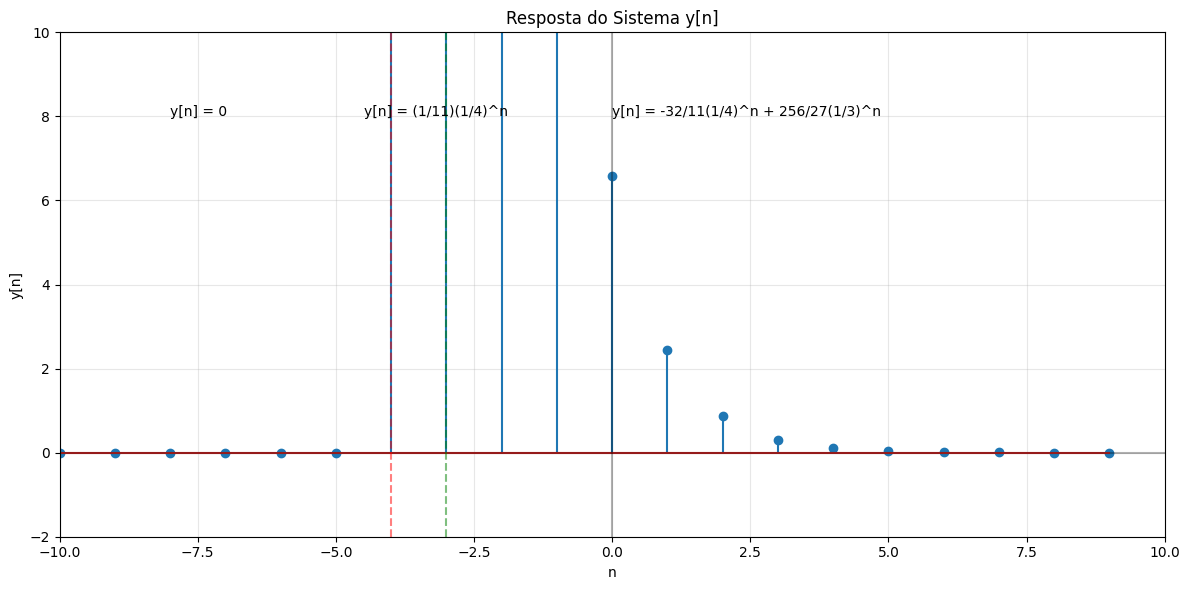

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_y(n):
    """Calcula y[n] para um determinado valor de n"""
    if n < -4:
        return 0
    elif n < -3:
        return (1/11) * (1/4)**n
    else:
        return -32/11 * (1/4)**n + 256/27 * (1/3)**n

# Gerar valores de n para plotagem
n_values = np.arange(-10, 10)

# Calcular y[n] para cada valor de n
y_values = np.array([calculate_y(n) for n in n_values])

# Criar gráfico
plt.figure(figsize=(12, 6))
plt.stem(n_values, y_values)  # Removido o argumento use_line_collection
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Resposta do Sistema y[n]')

# Definir limites para melhor visualização
plt.xlim(-10, 10)
plt.ylim(-2, 10)

# Adicionar marcadores para as regiões
plt.axvline(x=-4, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=-3, color='g', linestyle='--', alpha=0.5)
plt.text(-8, 8, "y[n] = 0", fontsize=10)
plt.text(-4.5, 8, "y[n] = (1/11)(1/4)^n", fontsize=10)
plt.text(0, 8, "y[n] = -32/11(1/4)^n + 256/27(1/3)^n", fontsize=10)

plt.tight_layout()
plt.show()